In [1]:
import pandas as pd 
import numpy as np

import cognitive_GLVQ as cglvq
import GLVQ as glvq
import optimizer as opt

import matplotlib.pyplot as plt

import random
import copy

In [2]:
random.seed(6)

In [3]:
num_prototypes = 3
colors = ["#5171fF", "#fF7151", "#519951"]
img_folder = "images/figs/"
data_name = "breast_cancer"

In [4]:
def save_figs(model, experiment, model_name, lr):
    fig1 = model.lr_graph(f"{model_name} Learning Rate")
    fig2 = model.acc_graph(f"{model_name} Accuracy")
    fig3 = model.f1_graph(f"{model_name} F1 Score")
    figs = [fig1, fig2, fig3]
    fig_type = ["lr", "acc", "f1"]
    for i, fig in enumerate(figs):
        fig.savefig(f"{img_folder}/{experiment}/{data_name}/{model_name}_{lr}_{fig_type[i]}.png", dpi = 300)

# Data prep

In [5]:
# Load the data
df = pd.read_csv("dataset/breast_cancer_wisconsin_dataset/data.csv")

# Clear indexing
df = df.reset_index(drop=True)

In [6]:
feature = df[df.columns[2:32]]
label = df[df.columns[1]]

feature = feature.to_numpy()
label = label.to_numpy()
label = label.reshape(-1, 1)

In [7]:
unique, count = np.unique(label, return_counts=True)
sample_number = dict(zip(unique, count))
sample_number

{'B': 357, 'M': 212}

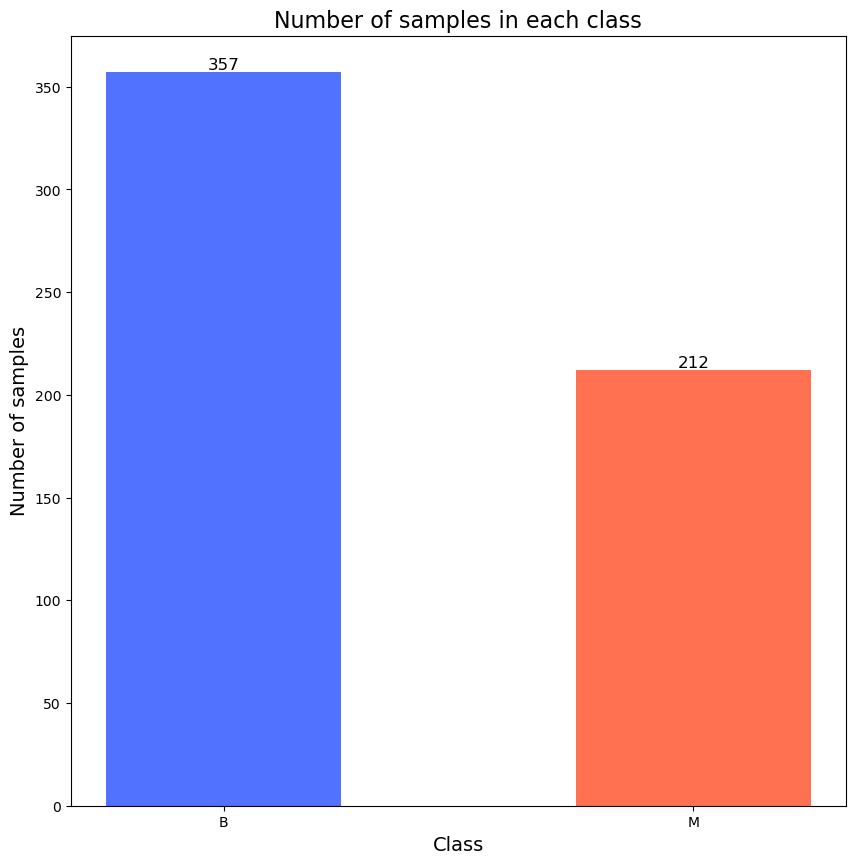

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
for i, (k, v) in enumerate(sample_number.items()):
    ax.bar(k, v, width=0.5, color=colors[i])
    plt.text(k, v+0.1, str(v), ha='center', va='bottom', fontsize=12)
plt.title('Number of samples in each class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.show()
fig.savefig(img_folder + "sample/" + data_name, dpi=300)

## Select prototypes

In [9]:
prototypes_index = []
for class_name in sample_number:
    index_i = np.where(label == class_name)
    index_i = list(index_i[0])
    prototype_index_i = random.sample(index_i, num_prototypes)
    prototypes_index += prototype_index_i
prototypes_index.sort(reverse=True)
prototypes = [(feature[i],label[i]) for i in prototypes_index]
## Remove prototypes from dataset
feature = np.delete(feature, prototypes_index, axis=0)
label = np.delete(label, prototypes_index, axis=0)    


### Accuracy

In [10]:
experiment = "experiment_1"

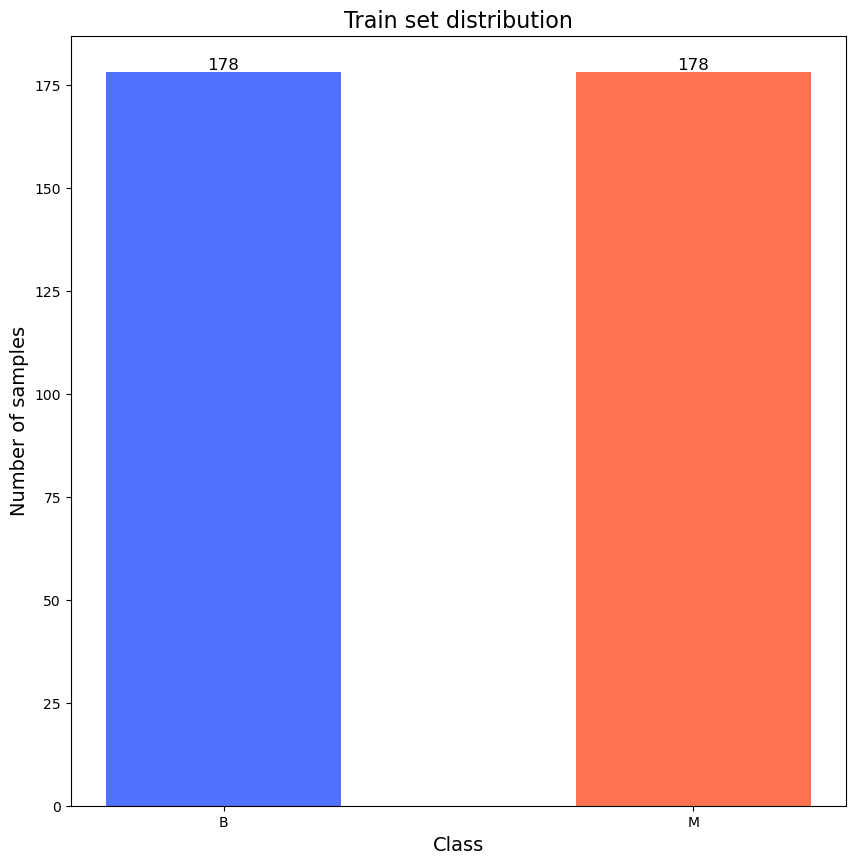

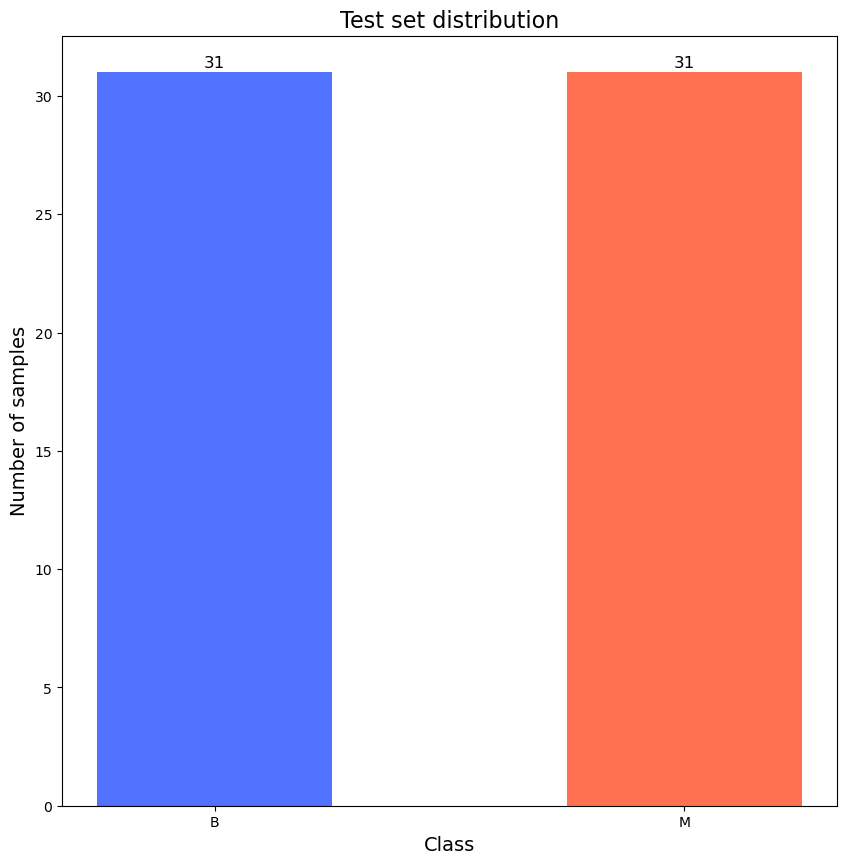

In [11]:
# Select equal amount of normal and abnormal data
data_per_class = min(count) - num_prototypes
test_percentage = 0.15
test_size = int(test_percentage * data_per_class)
train_size = data_per_class - test_size
feature_acc = copy.deepcopy(feature)
label_acc = copy.deepcopy(label)

## Select test set
test_index = []
for class_name in sample_number:
    index_i = np.where(label_acc == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, test_size)
    test_index += index_i_sample
test_index.sort(reverse=True)
test_set_acc = [(feature_acc[i],label_acc[i]) for i in test_index]
random.shuffle(test_set_acc)
unique, counts = np.unique(label_acc[test_index], return_counts=True)
test_dist = dict(zip(unique, counts))
feature_acc = np.delete(feature_acc, test_index, axis=0)
label_acc = np.delete(label_acc, test_index, axis=0)

## Select train set
train_index = []
for class_name in sample_number:
    index_i = np.where(label_acc == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, train_size)
    train_index += index_i_sample
train_index.sort(reverse=True)
unique, counts = np.unique(label_acc[train_index], return_counts=True)
train_dist = dict(zip(unique, counts))
train_set_acc = [(feature_acc[i],label_acc[i]) for i in train_index]
random.shuffle(train_set_acc)

fig, ax = plt.subplots(figsize=(10, 10))
for i, (k, v) in enumerate(train_dist.items()):
    ax.bar(k, v, width=0.5, color=colors[i])
    plt.text(k, v+0.1, str(v), ha='center', va='bottom', fontsize=12)
plt.title('Train set distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.show()
fig.savefig(img_folder + experiment + "/" + data_name + "/train_dist.png", dpi=300)


fig, ax = plt.subplots(figsize=(10, 10))
for i, (k, v) in enumerate(test_dist.items()):
    ax.bar(k, v, width=0.5, color=colors[i])
    plt.text(k, v+0.1, str(v), ha='center', va='bottom', fontsize=12)
plt.title('Test set distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.show()
fig.savefig(img_folder + experiment + "/" + data_name + "/test_dist.png", dpi=300)


#### Train the Models

In [12]:
num_epochs = 100

##### GLVQ

##### 1-step lr =0.1

In [13]:
learning_rate = 0.1
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc, sample_number=train_dist)

Epoch: 1, Loss: 149.5906, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 11, Loss: 149.5691, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 21, Loss: 149.5476, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 31, Loss: 149.5262, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 41, Loss: 149.5048, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 51, Loss: 149.4835, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 61, Loss: 149.4623, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 71, Loss: 149.4411, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 81, Loss: 149.4199, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 91, Loss: 149.3988, Accuracy: 96.77 %, F_1.0_score: 96.77 %


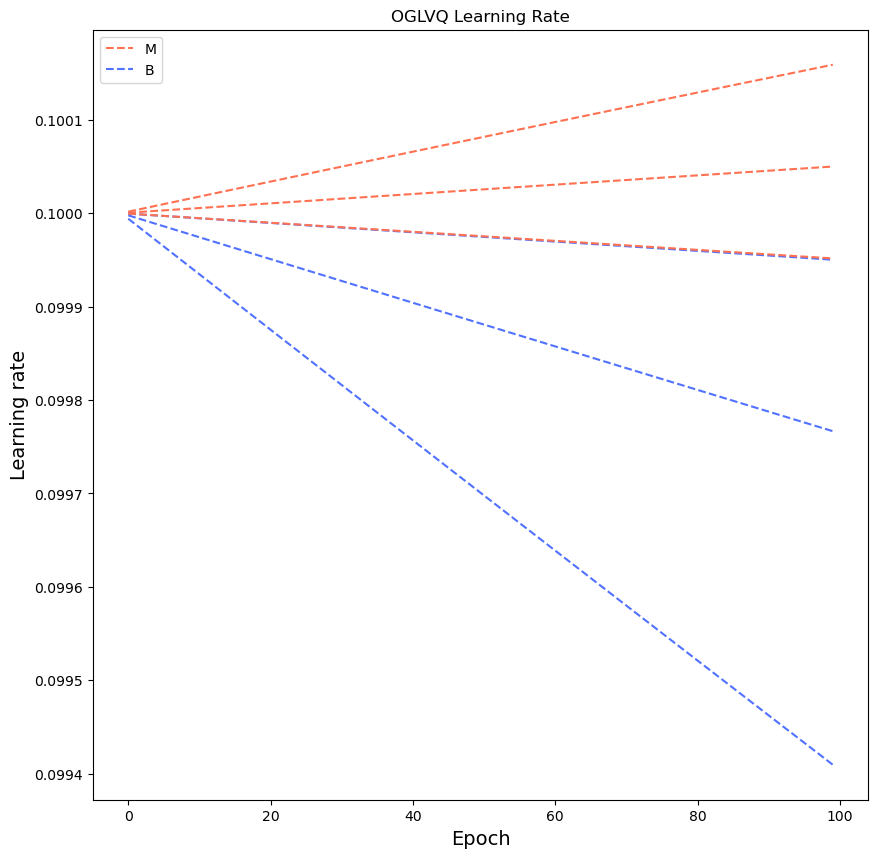

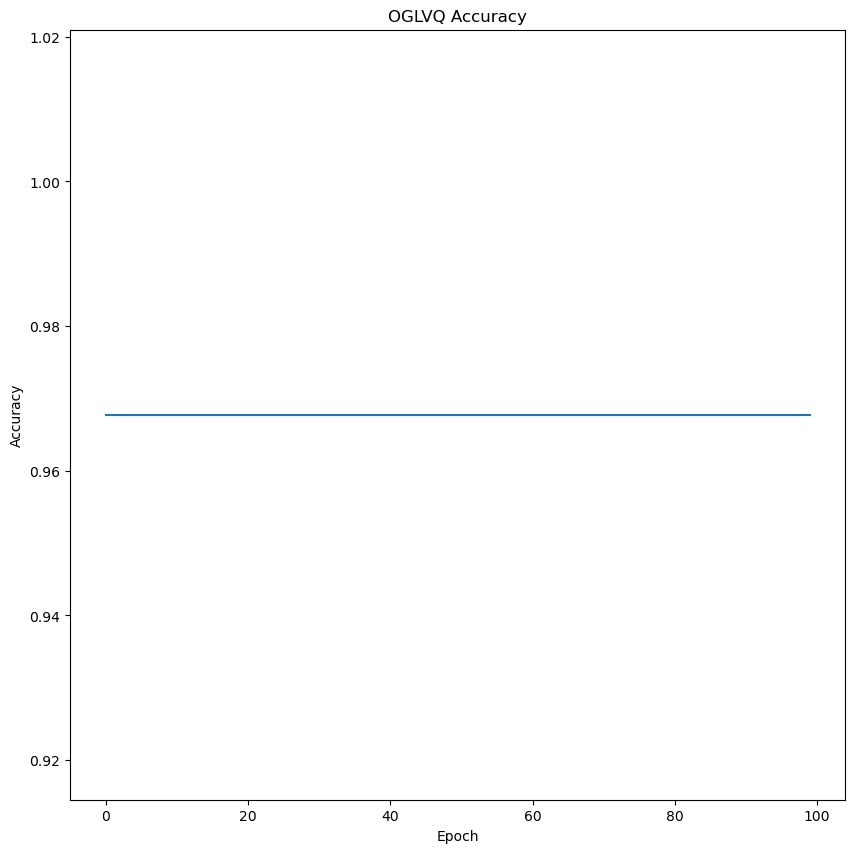

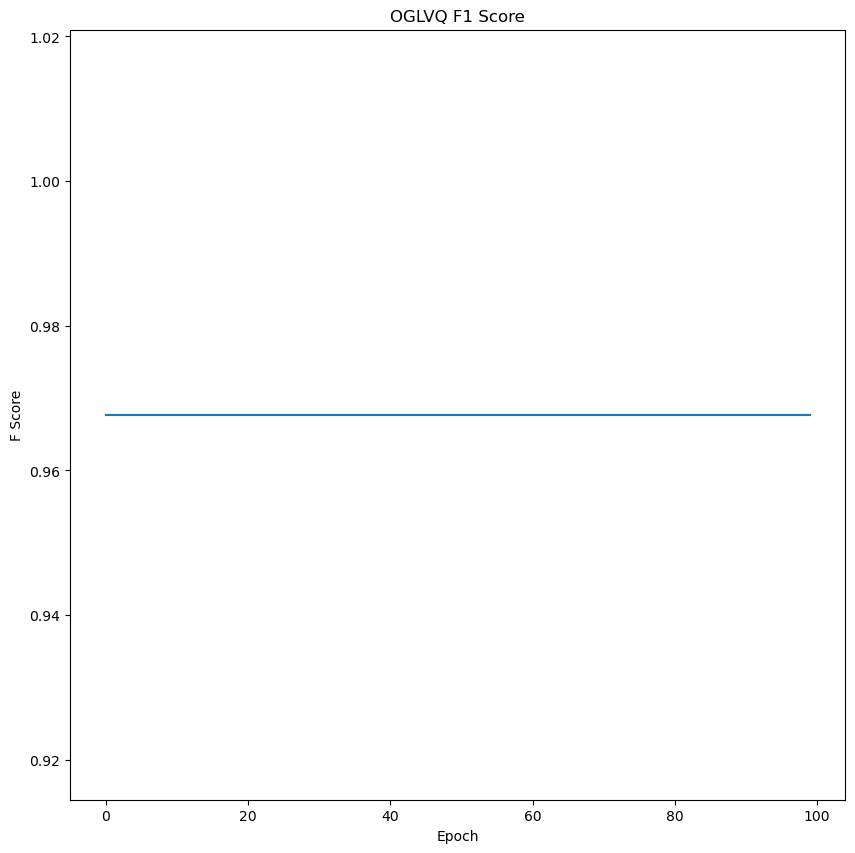

In [14]:
save_figs(glvq_acc, experiment, "OGLVQ", learning_rate)

##### 2-step lr = 0.03

In [15]:
learning_rate = 0.03
glvq_acc = glvq.GLVQ(prototypes,learning_rate,)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc,sample_number=train_dist)

Epoch: 1, Loss: 149.5913, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 11, Loss: 149.5848, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 21, Loss: 149.5784, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 31, Loss: 149.5719, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 41, Loss: 149.5655, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 51, Loss: 149.5590, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 61, Loss: 149.5526, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 71, Loss: 149.5462, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 81, Loss: 149.5397, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 91, Loss: 149.5333, Accuracy: 96.77 %, F_1.0_score: 96.77 %


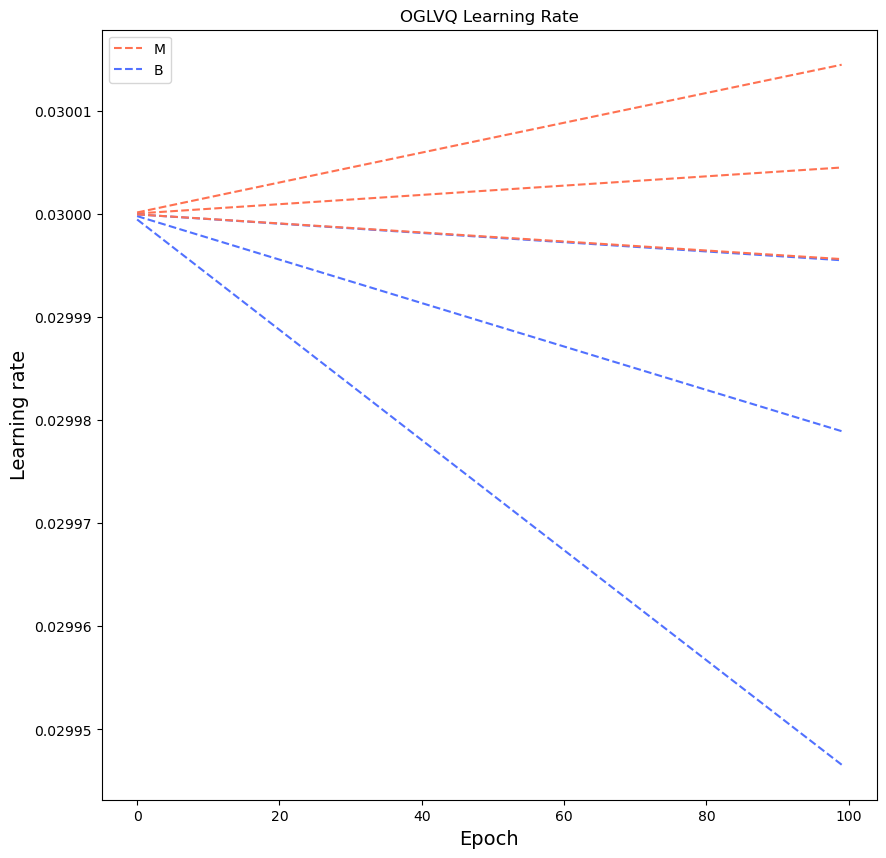

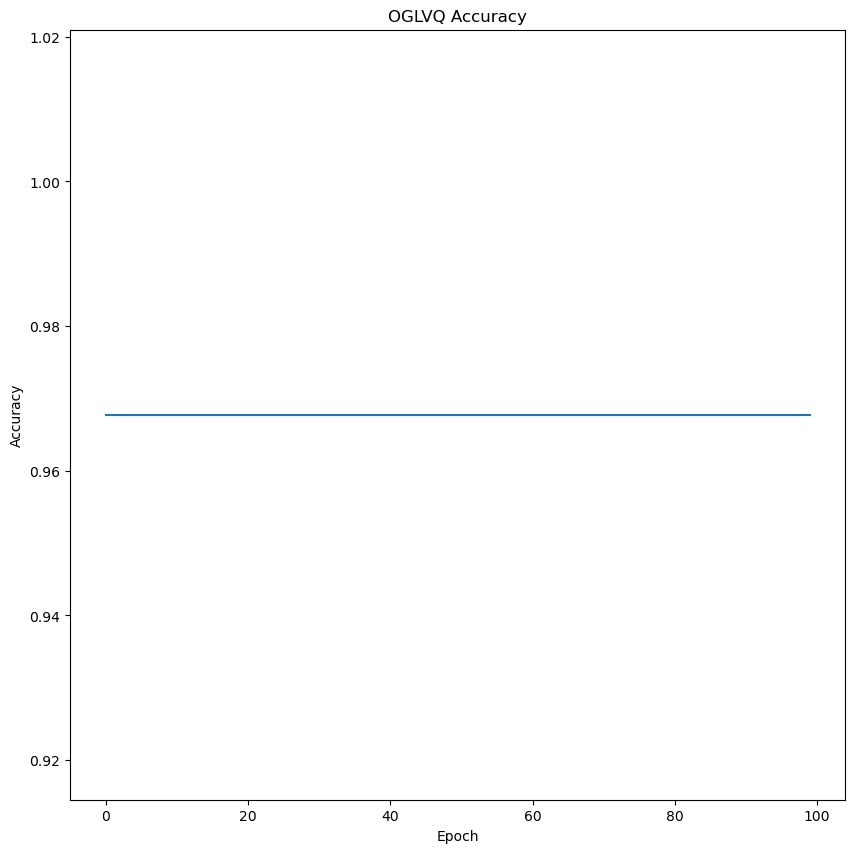

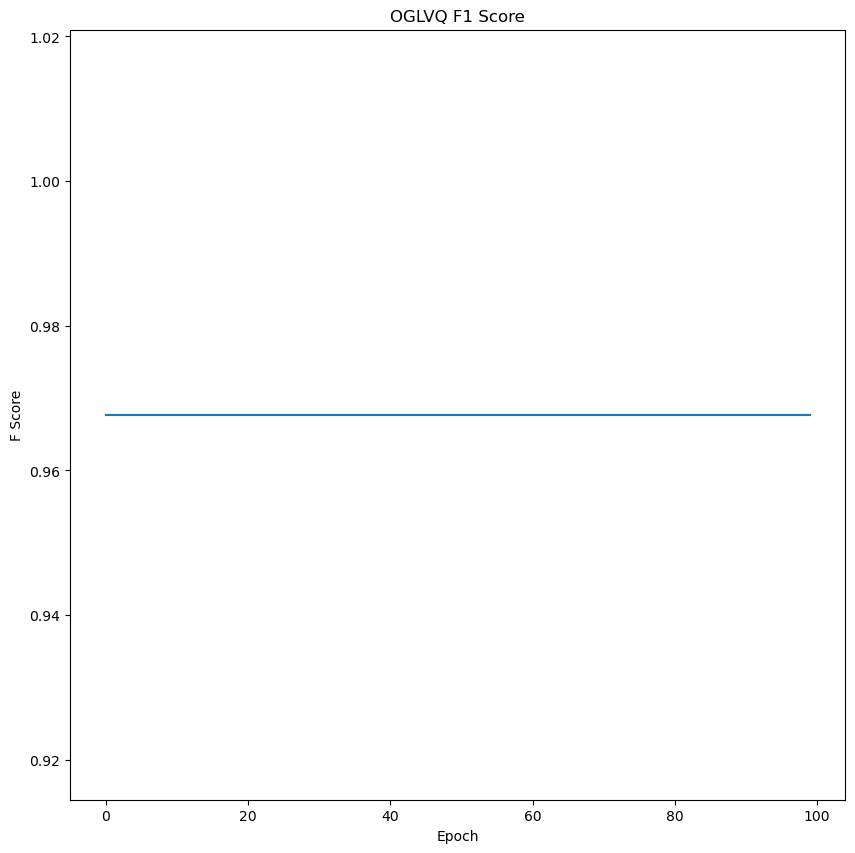

In [16]:
save_figs(glvq_acc, experiment, "OGLVQ", learning_rate)

##### 3-step lr = 0.01

In [17]:
learning_rate = 0.01
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc, sample_number = train_dist)

Epoch: 1, Loss: 149.5915, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 11, Loss: 149.5894, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 21, Loss: 149.5872, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 31, Loss: 149.5850, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 41, Loss: 149.5829, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 51, Loss: 149.5807, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 61, Loss: 149.5786, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 71, Loss: 149.5764, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 81, Loss: 149.5743, Accuracy: 96.77 %, F_1.0_score: 96.77 %
Epoch: 91, Loss: 149.5721, Accuracy: 96.77 %, F_1.0_score: 96.77 %


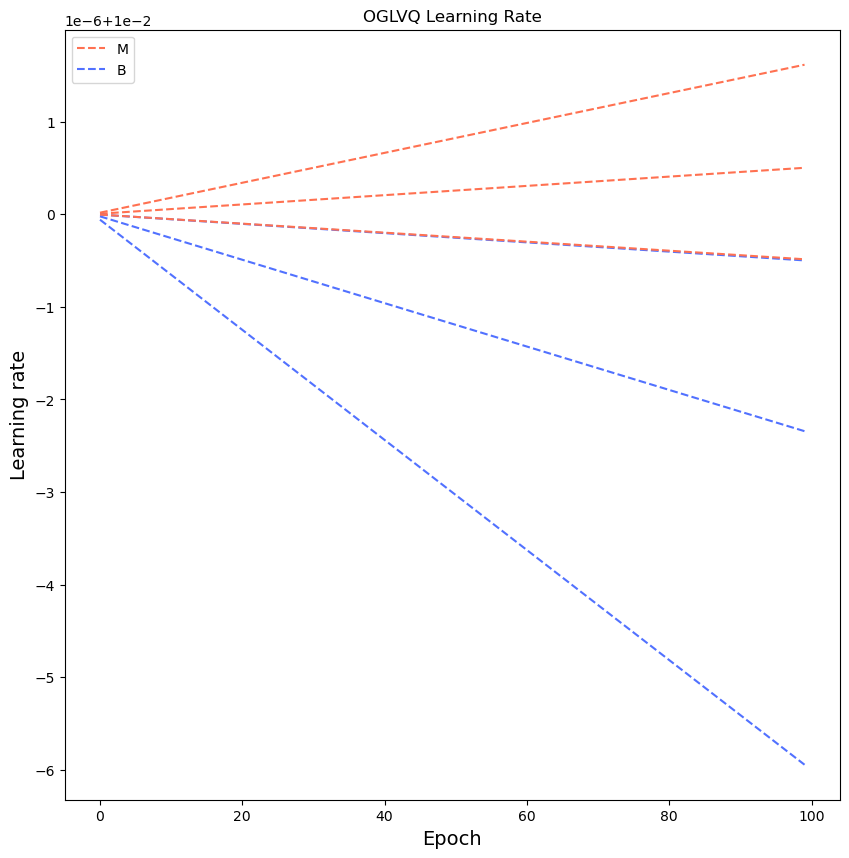

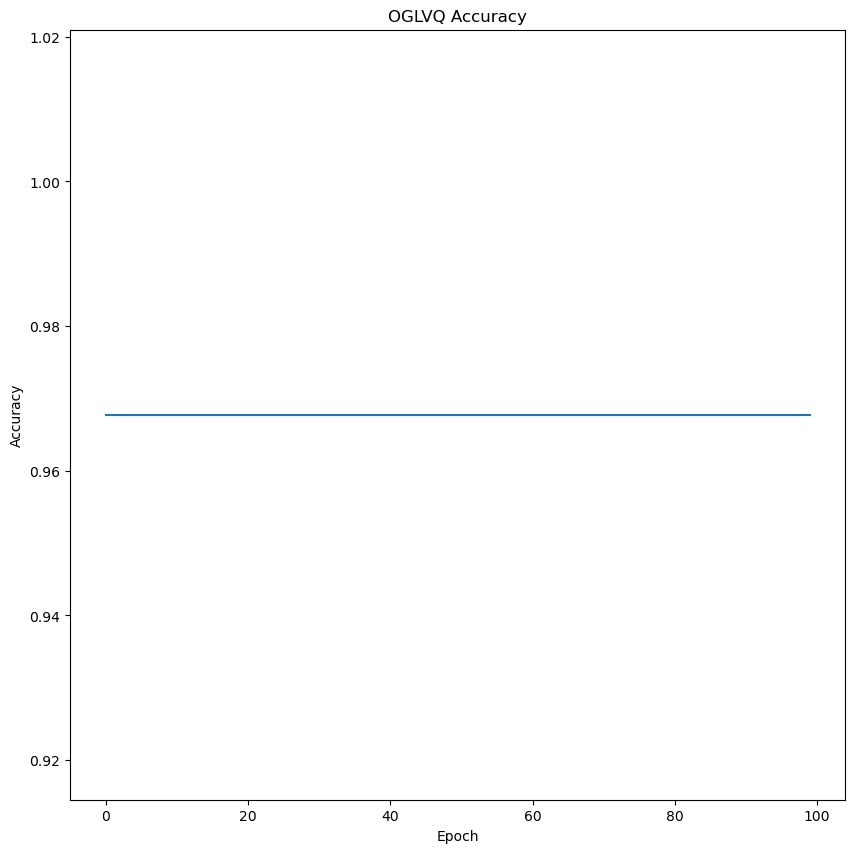

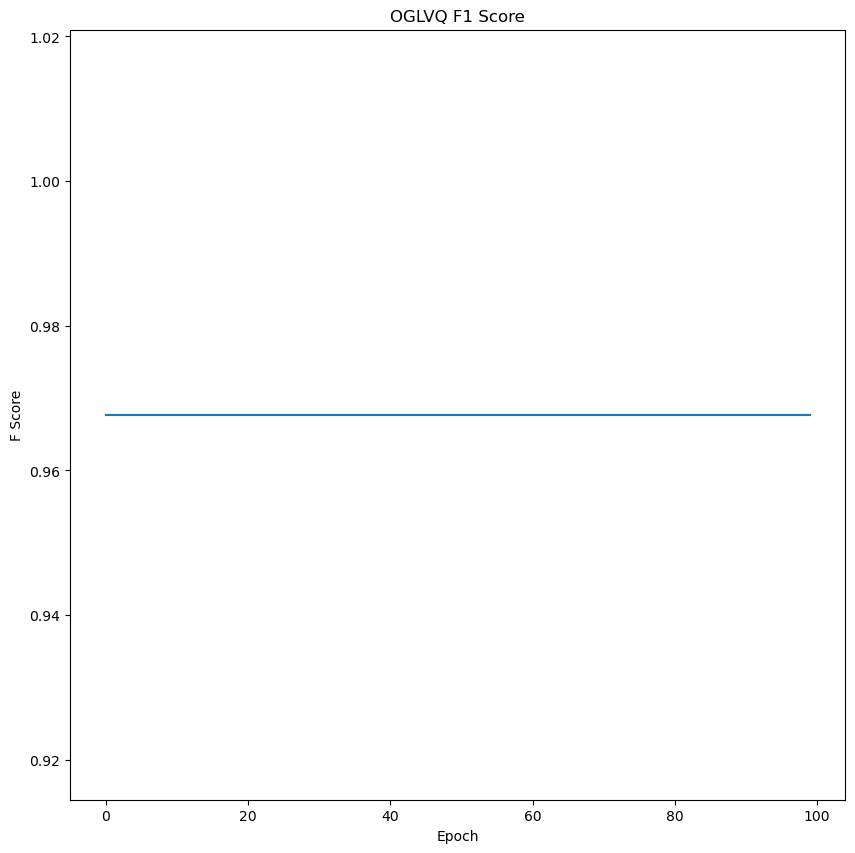

In [18]:
save_figs(glvq_acc, experiment, "OGLVQ", learning_rate)

##### CP

##### 1-step lr = 0.1

In [19]:
learning_rate = 0.1
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


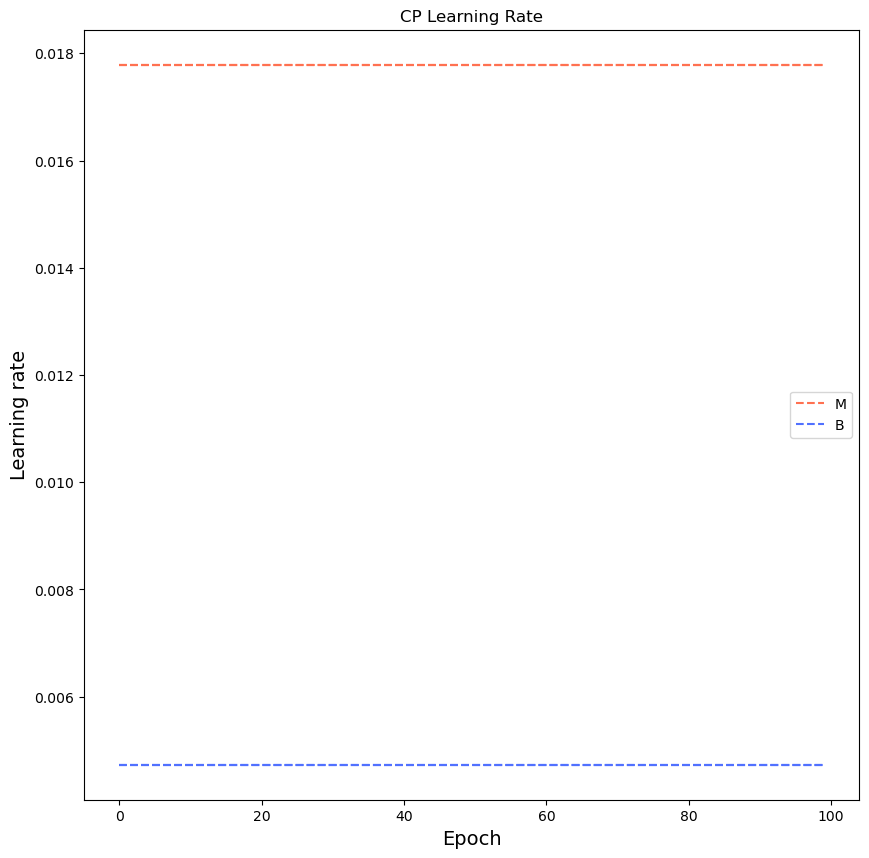

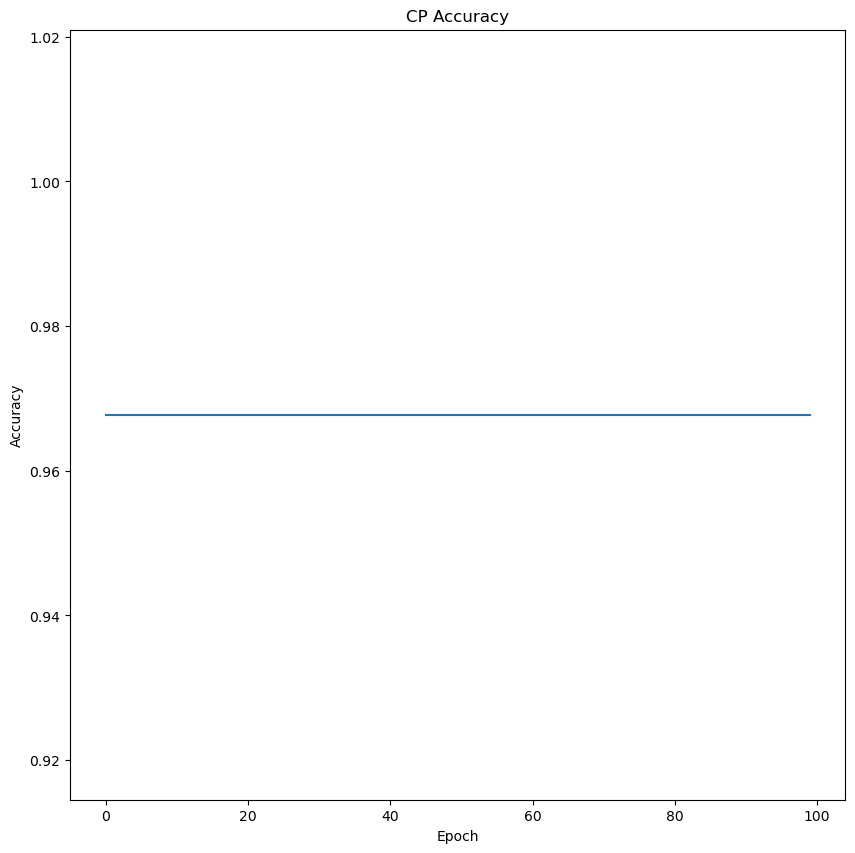

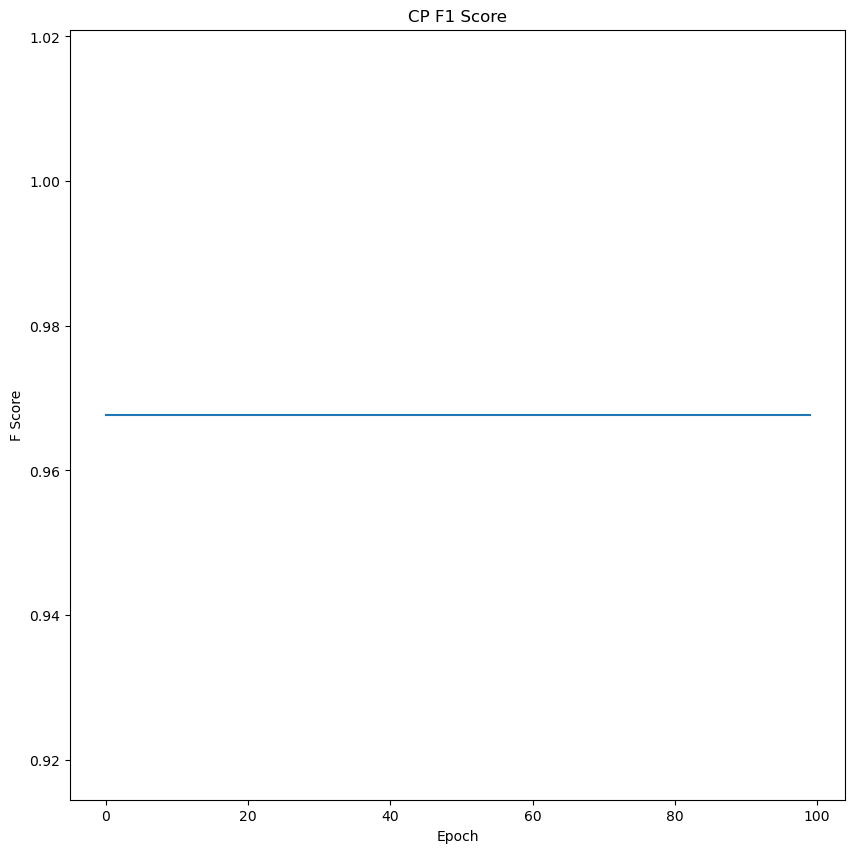

In [20]:
save_figs(cp_glvq_acc, experiment, "CP", learning_rate)

##### 2-step lr = 0.03

In [21]:
learning_rate = 0.03
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


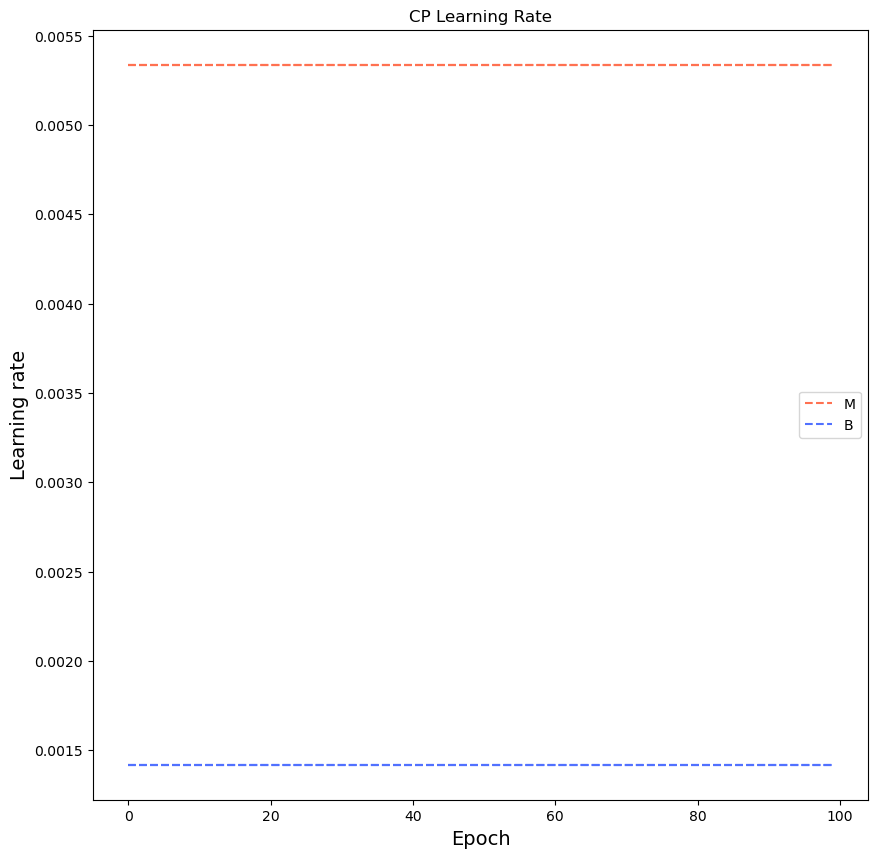

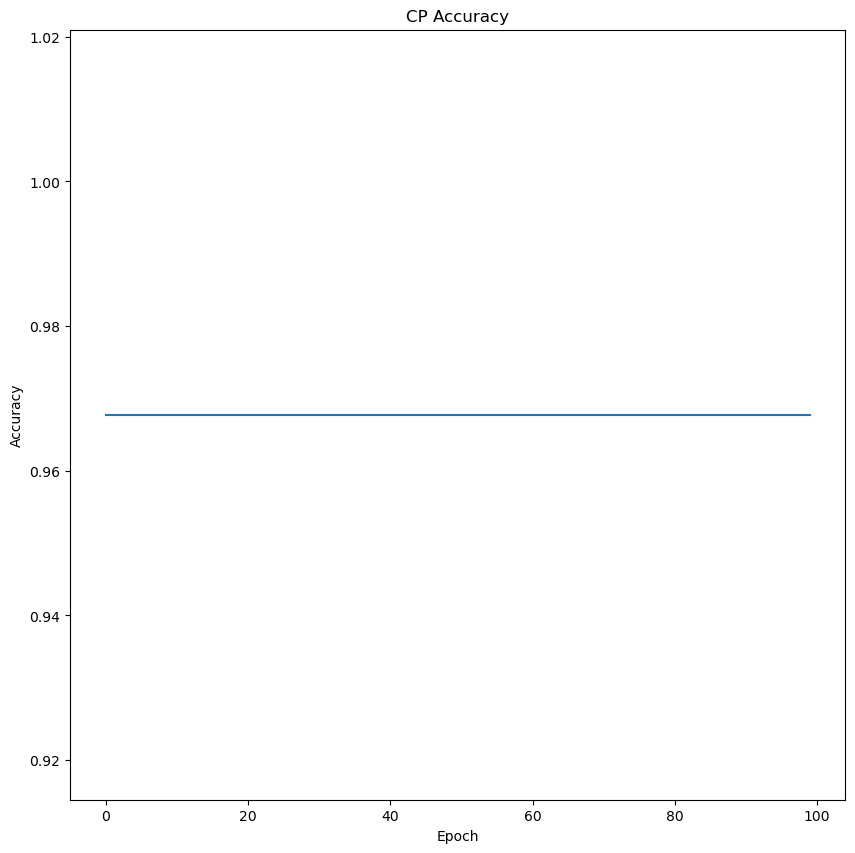

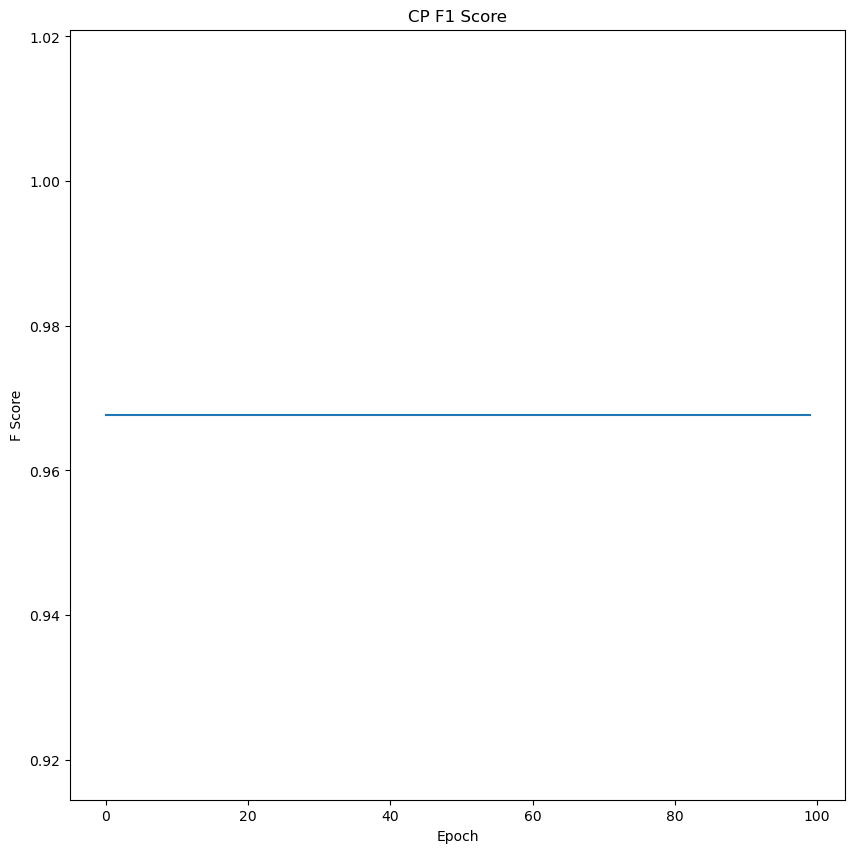

In [22]:
save_figs(cp_glvq_acc, experiment, "CP", learning_rate)

##### 3-step lr = 0.01

In [23]:
learning_rate = 0.01
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


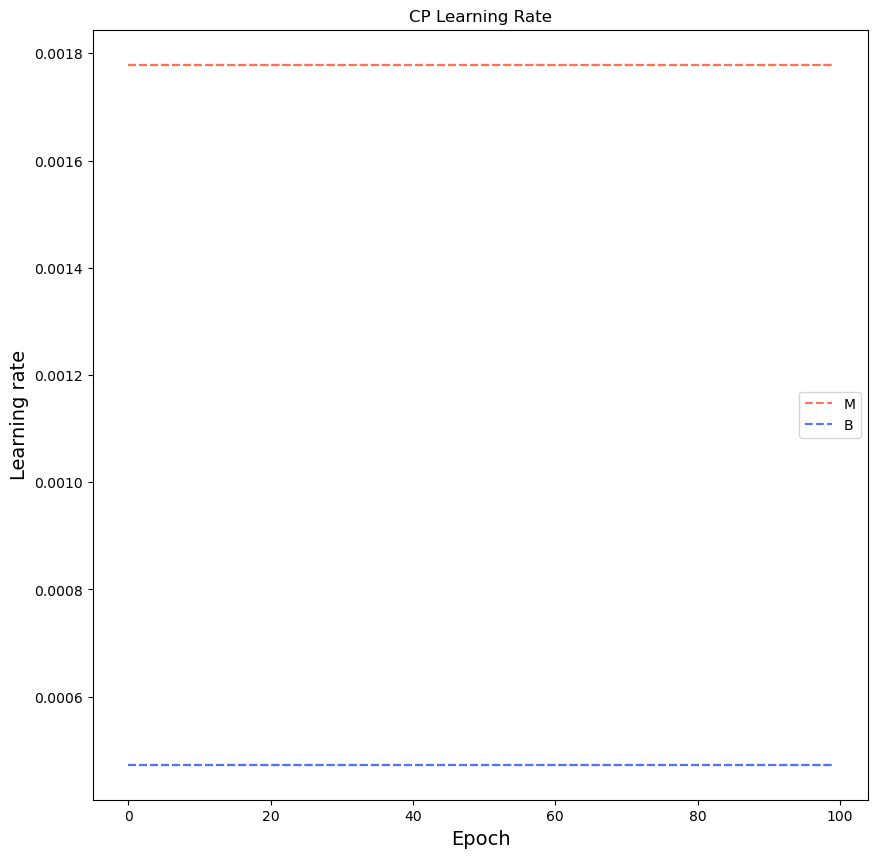

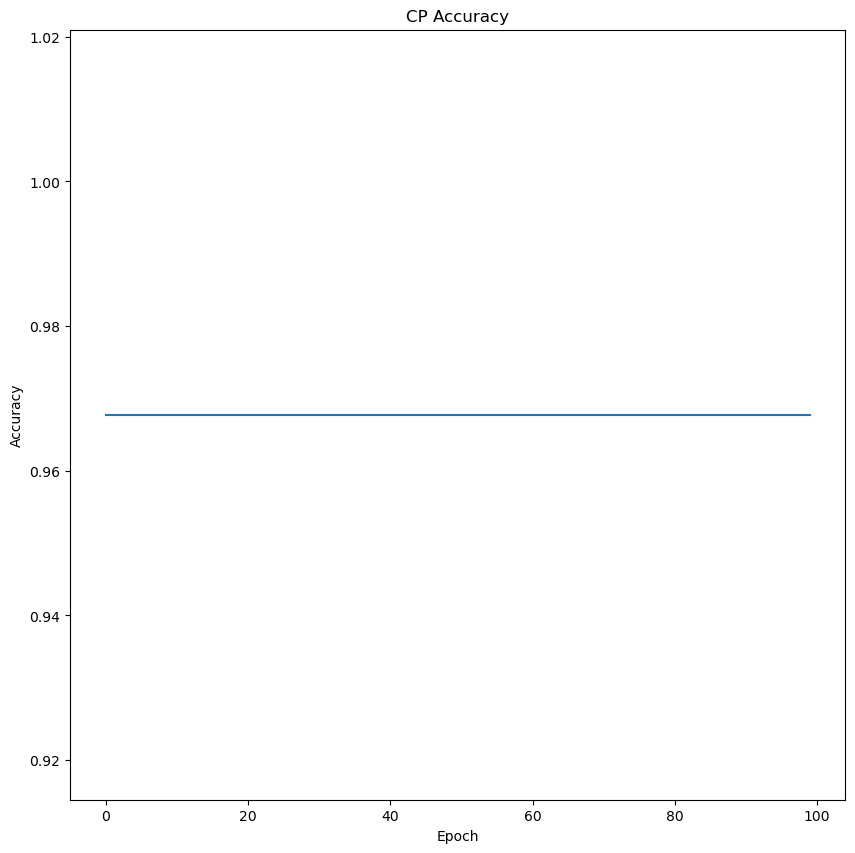

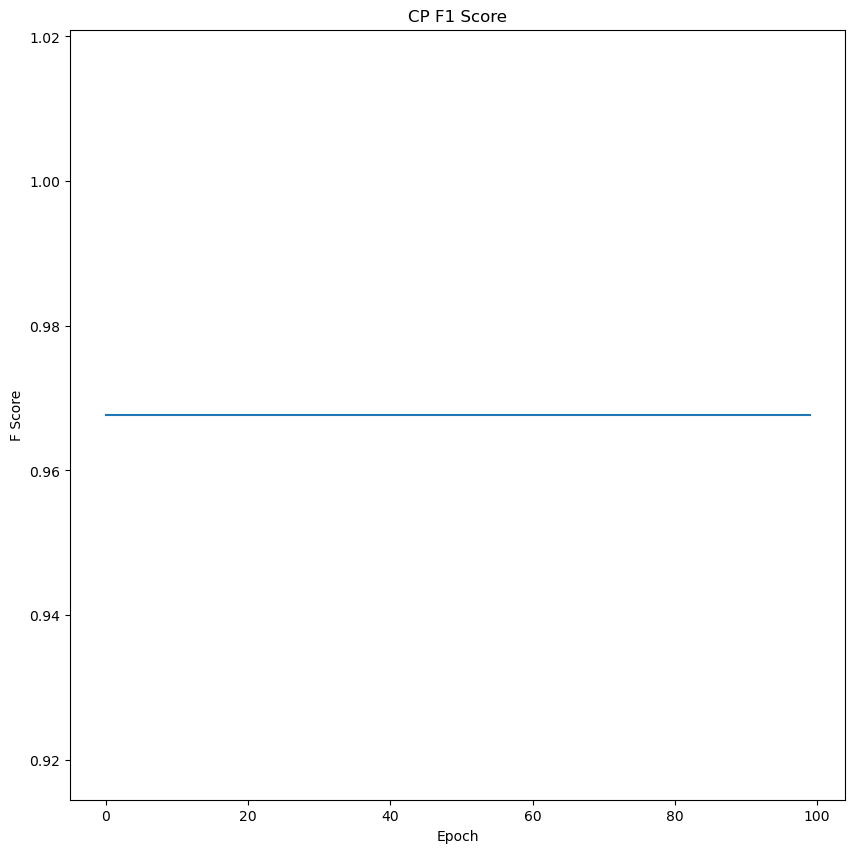

In [24]:
save_figs(cp_glvq_acc, experiment, "CP", learning_rate)

##### DFH

##### 1-step lr = 0.1

In [25]:
learning_rate = 0.1
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic, sample_number= train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %


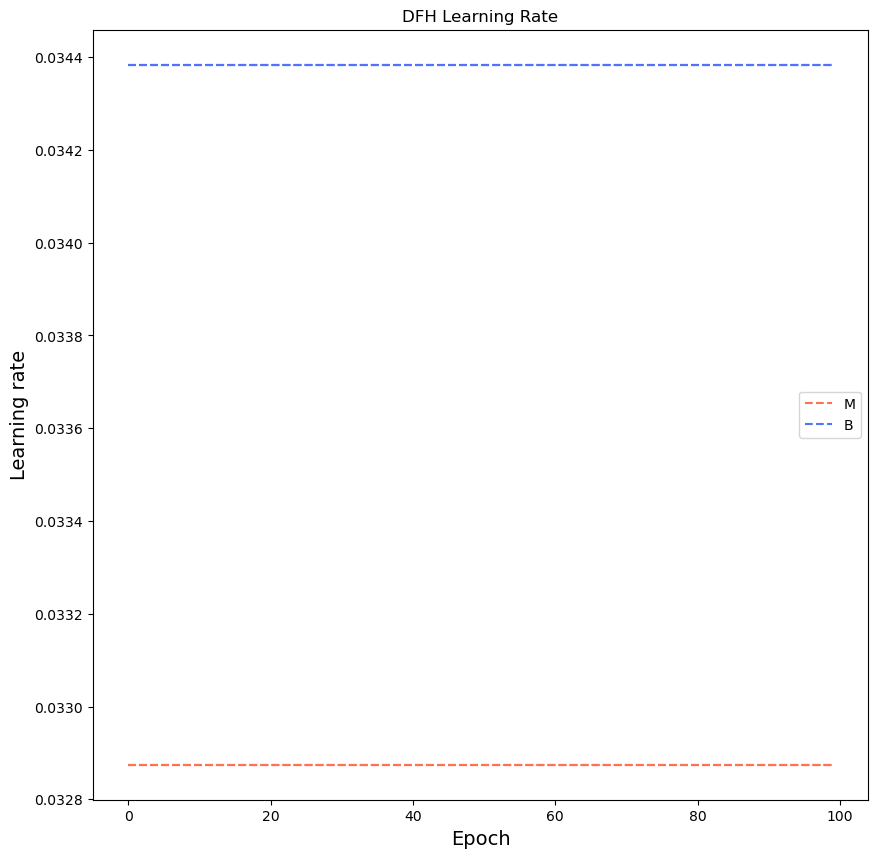

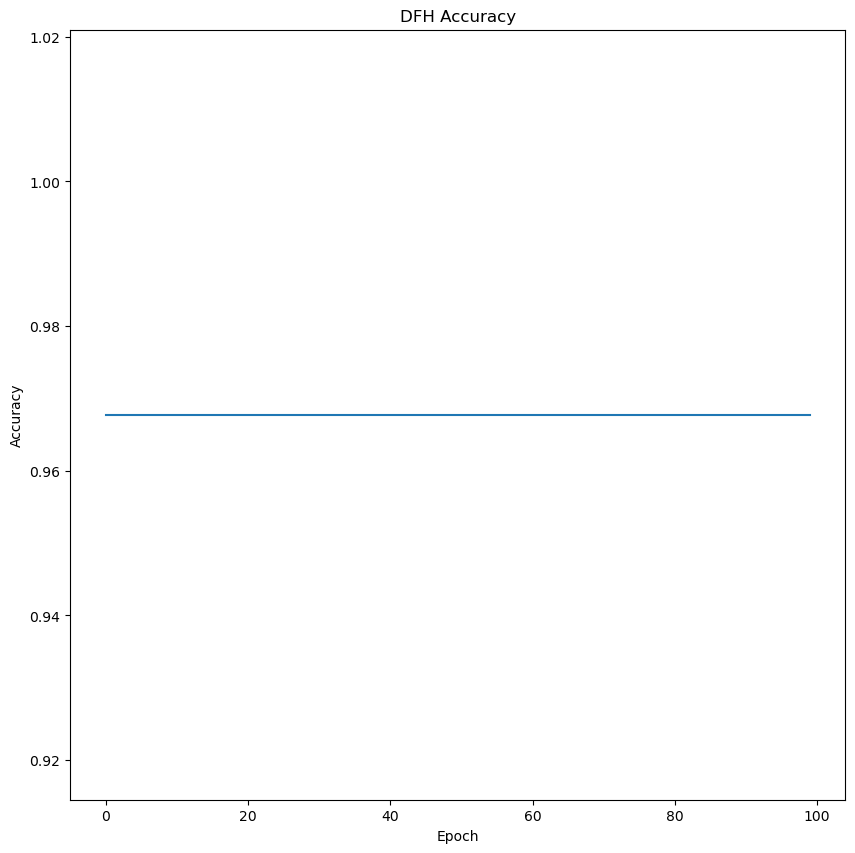

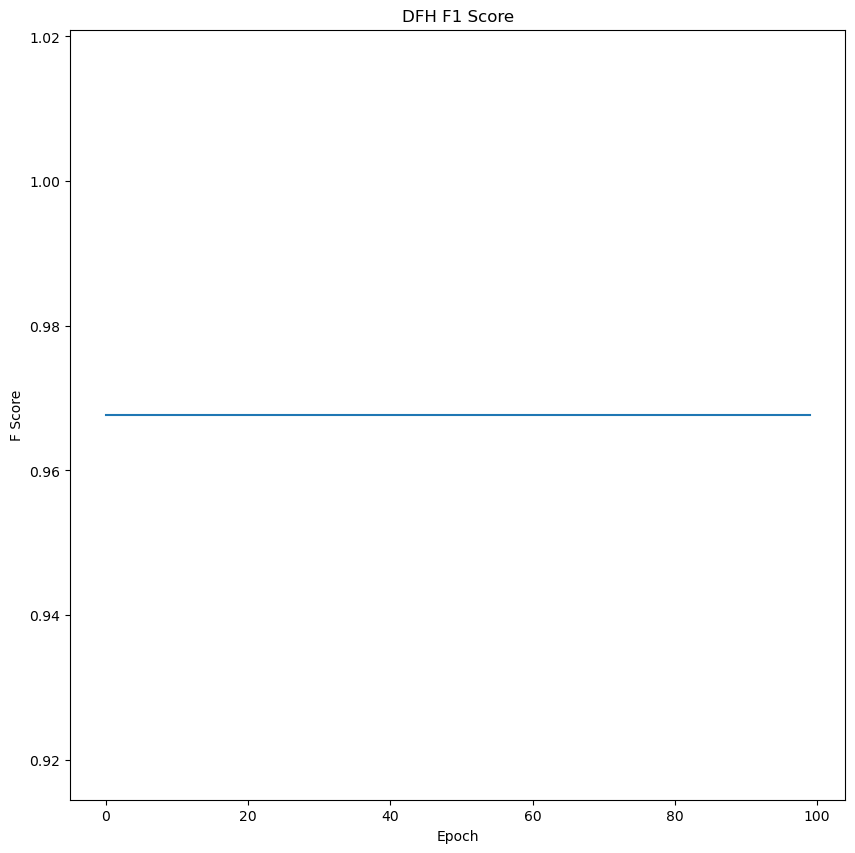

In [26]:
save_figs(dfh_glvq_acc, experiment, "DFH", learning_rate)

##### 2-step lr = 0.03

In [27]:
learning_rate = 0.03
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %


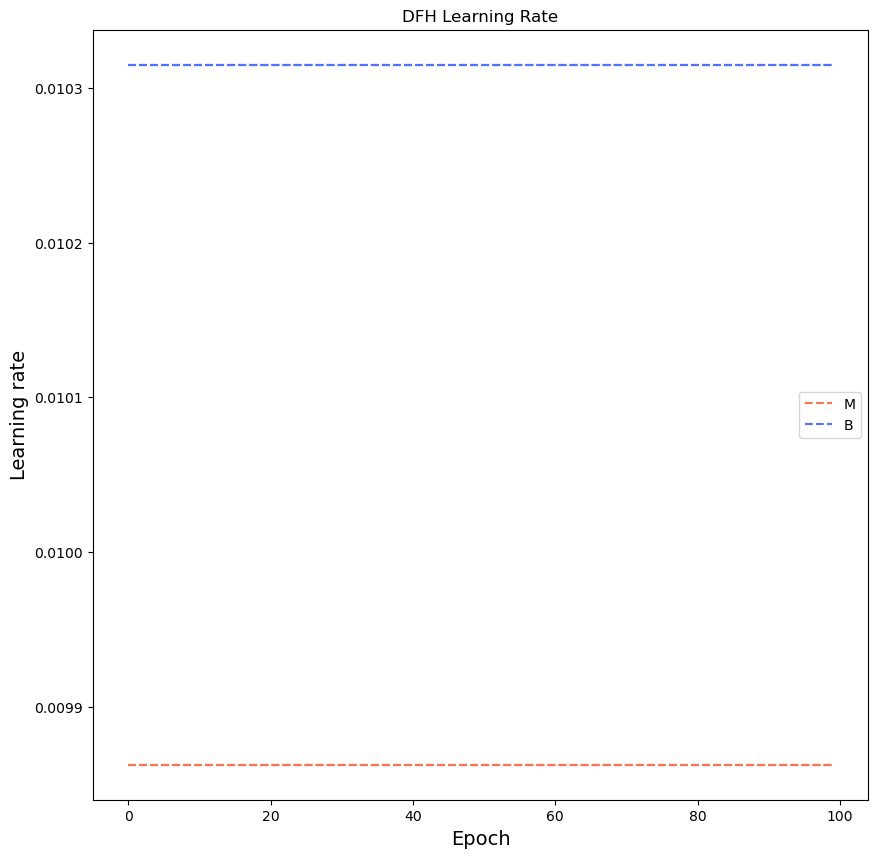

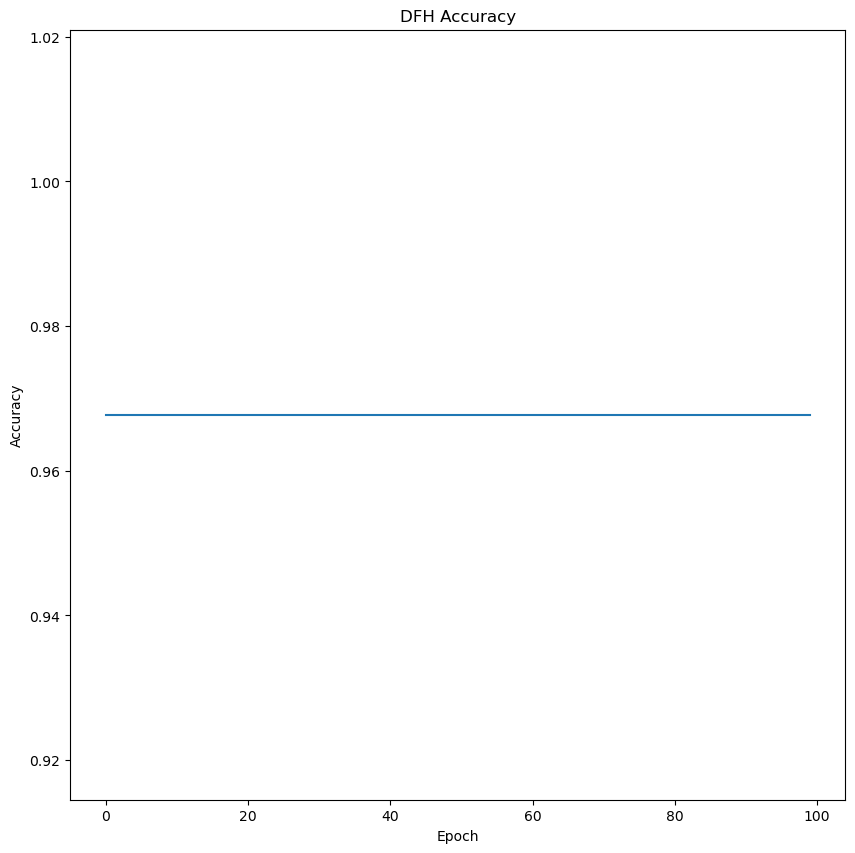

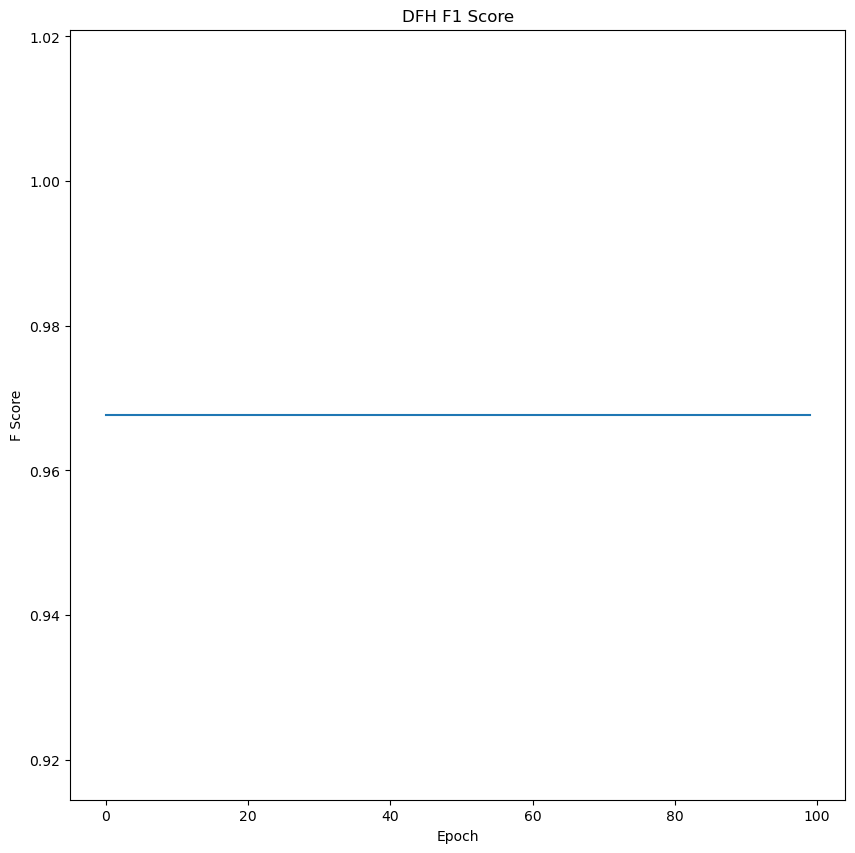

In [28]:
save_figs(dfh_glvq_acc, experiment, "DFH", learning_rate)

##### 3-step lr = 0.01

In [29]:
learning_rate = 0.01
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


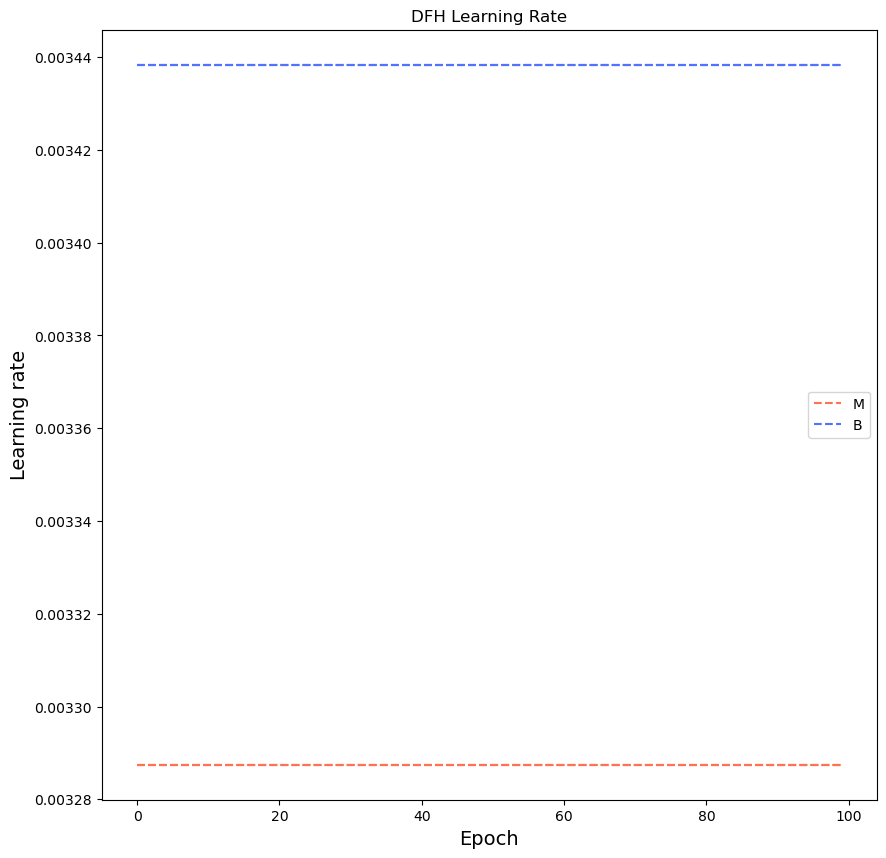

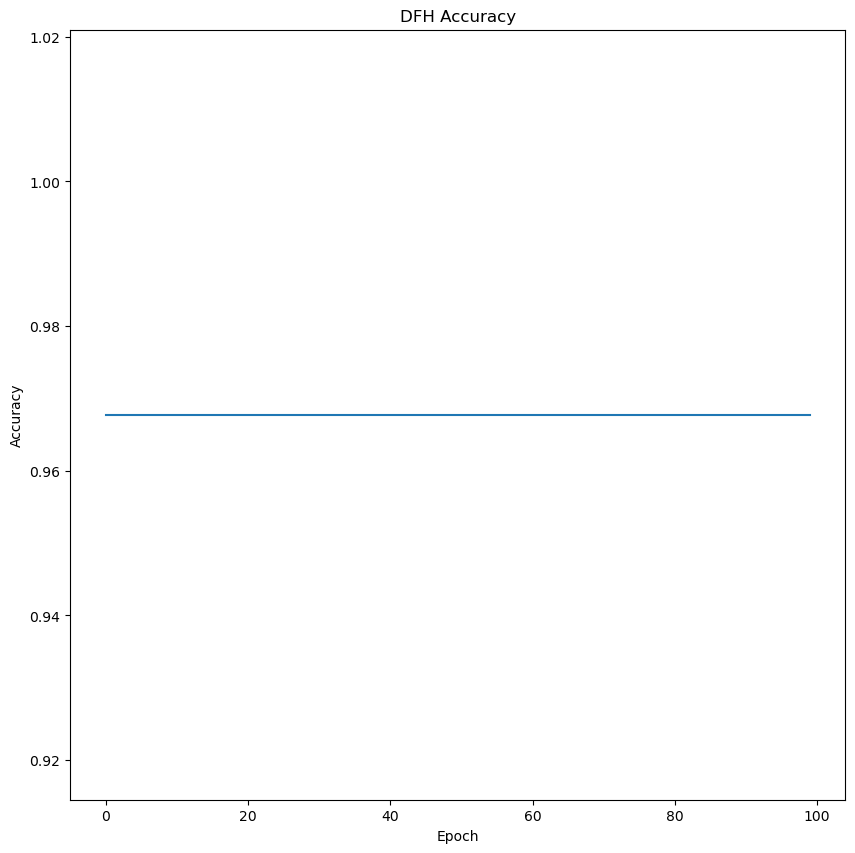

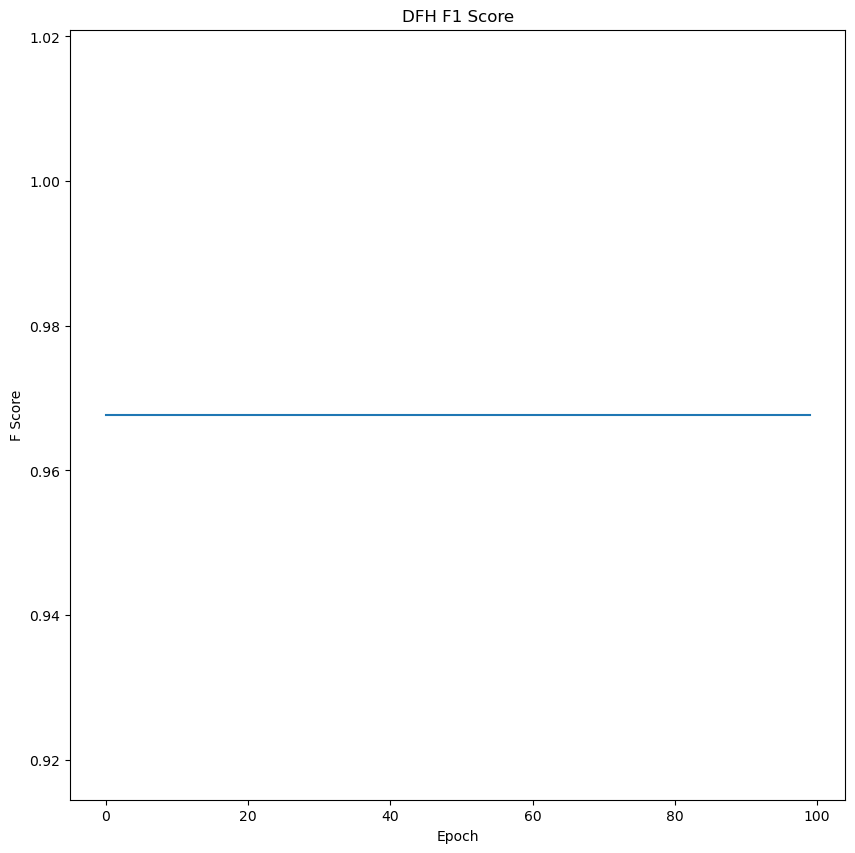

In [30]:
save_figs(dfh_glvq_acc, experiment, "DFH", learning_rate)

##### MS

##### 1-step lr = 0.1

In [31]:
learning_rate = 0.1
ms_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.middle_symmetry, sample_number=train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4199, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4199, Accuracy: 96.77 %, F_1_score: 96.77 %


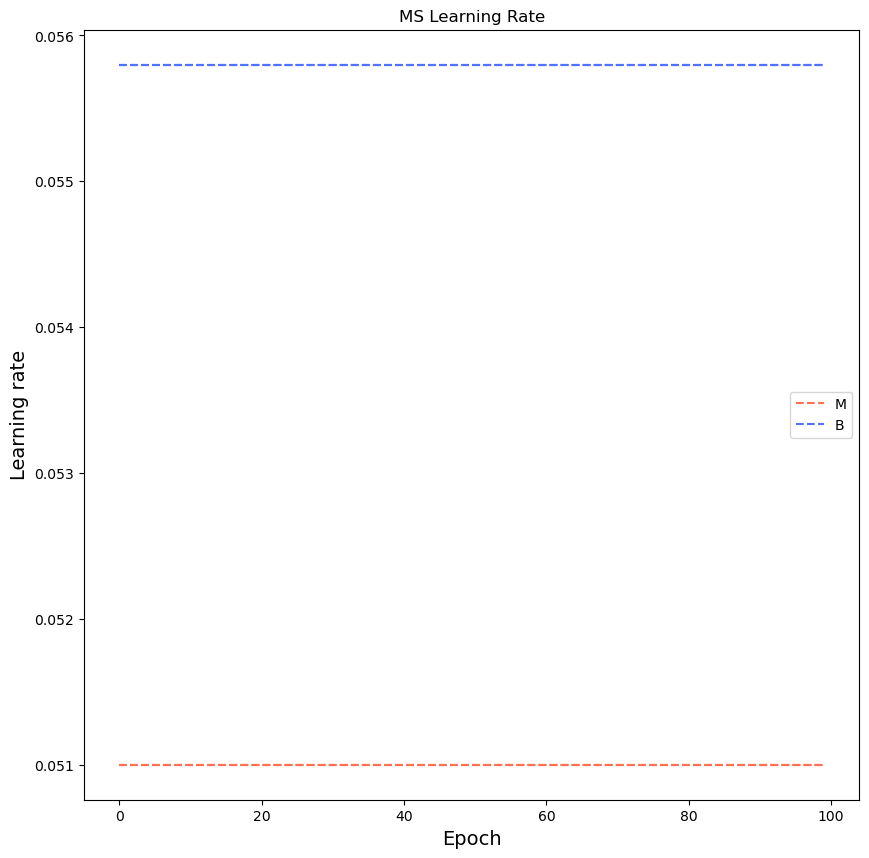

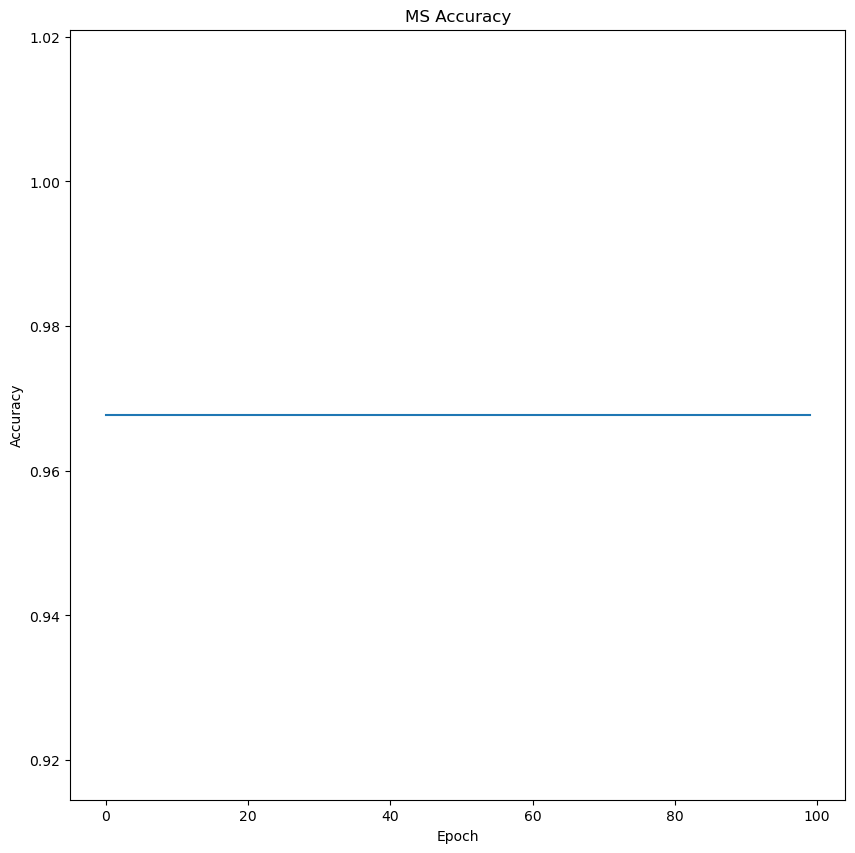

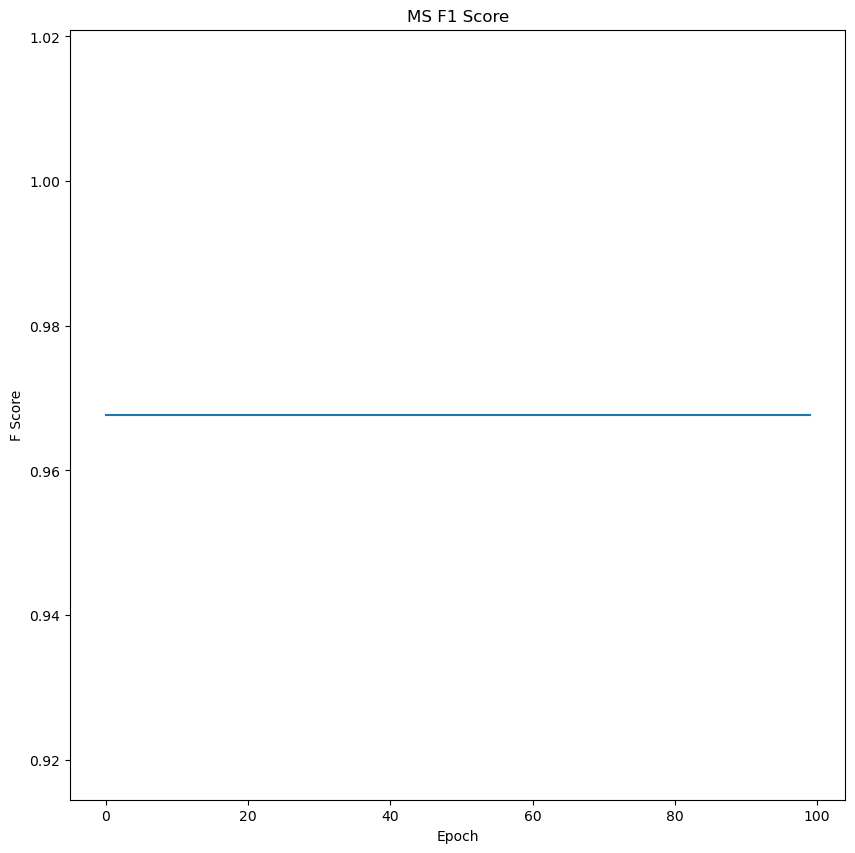

In [32]:
save_figs(ms_glvq_acc, experiment, "MS", learning_rate)

##### 2-step lr = 0.03

In [33]:
learning_rate = 0.03
ms_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.middle_symmetry, sample_number=train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %


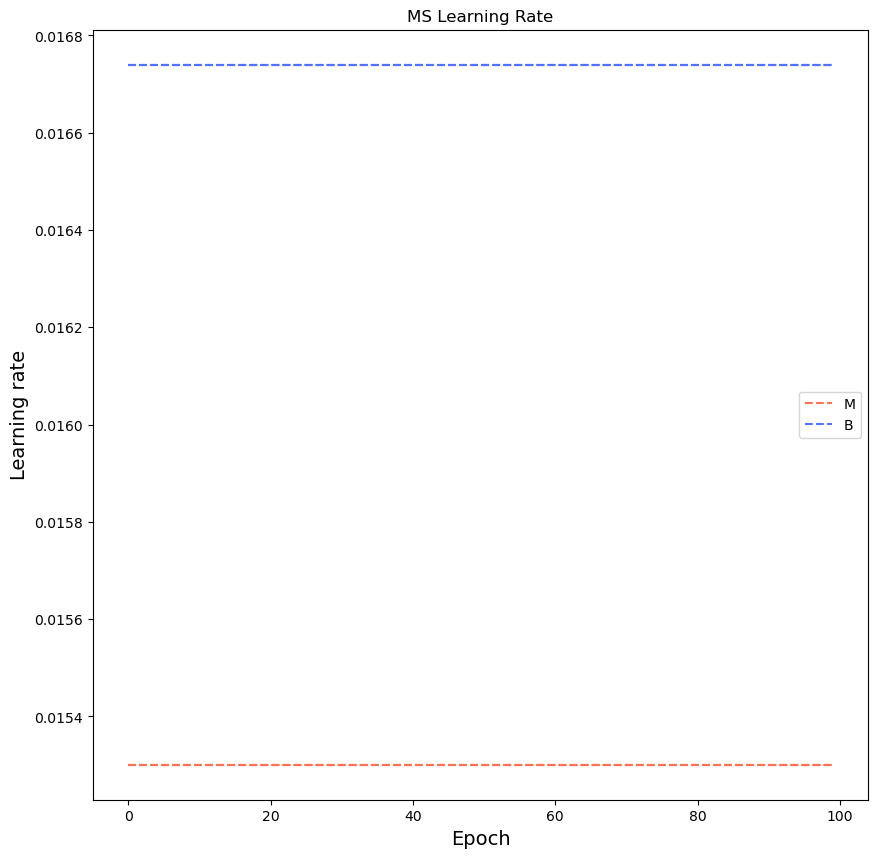

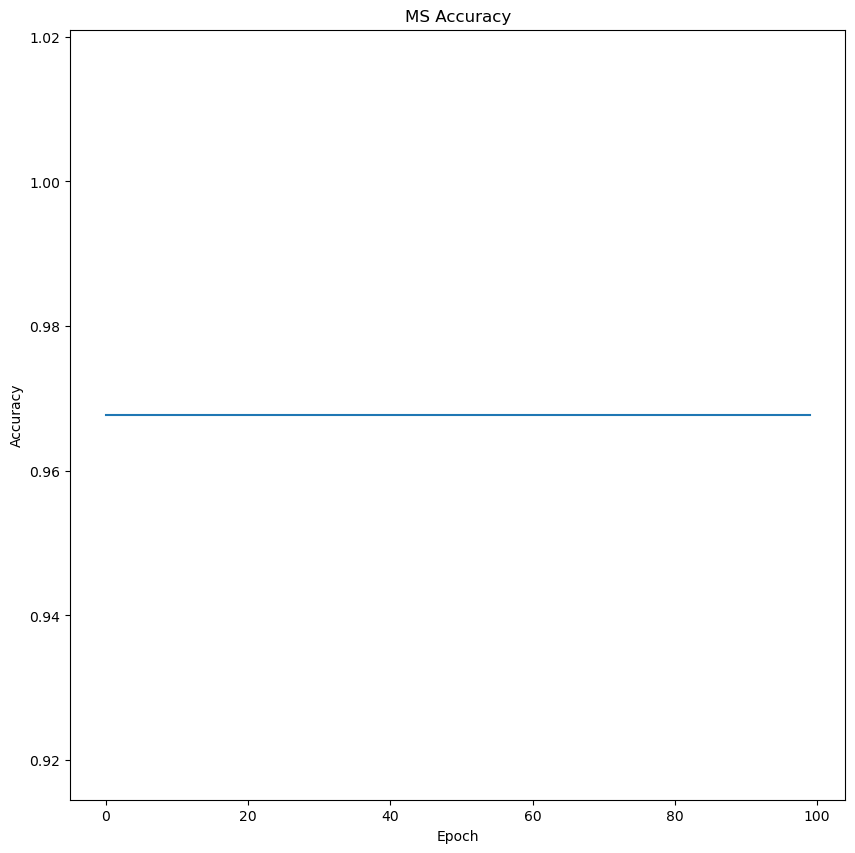

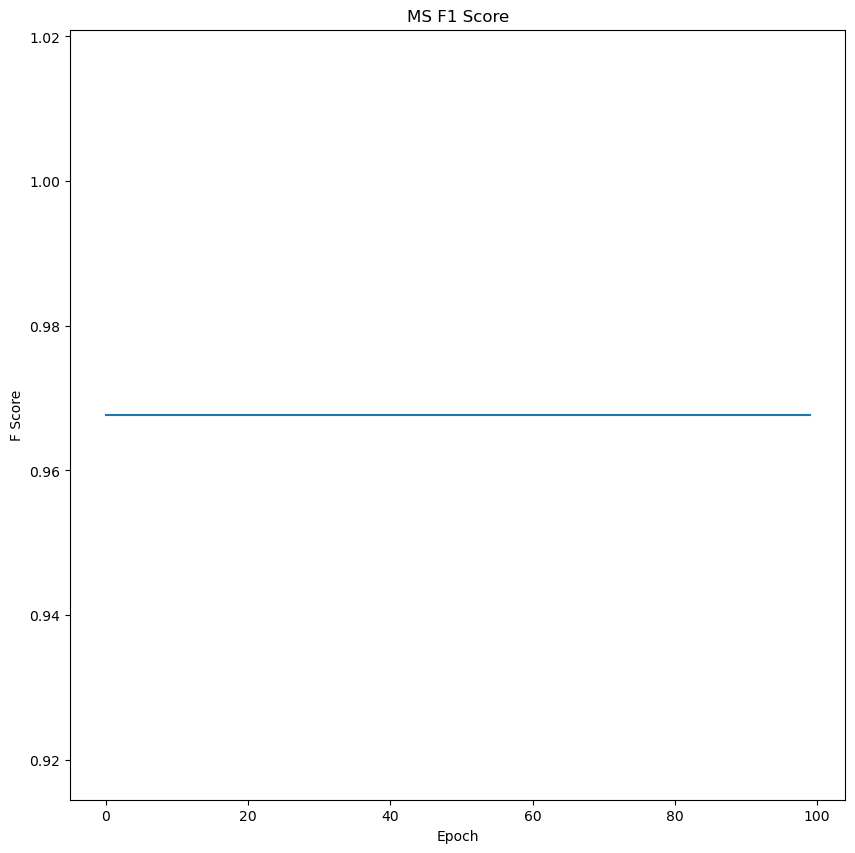

In [34]:
save_figs(ms_glvq_acc, experiment, "MS", learning_rate)

##### 3-step lr = 0.01

In [35]:
learning_rate = 0.01
ms_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.middle_symmetry, sample_number=train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


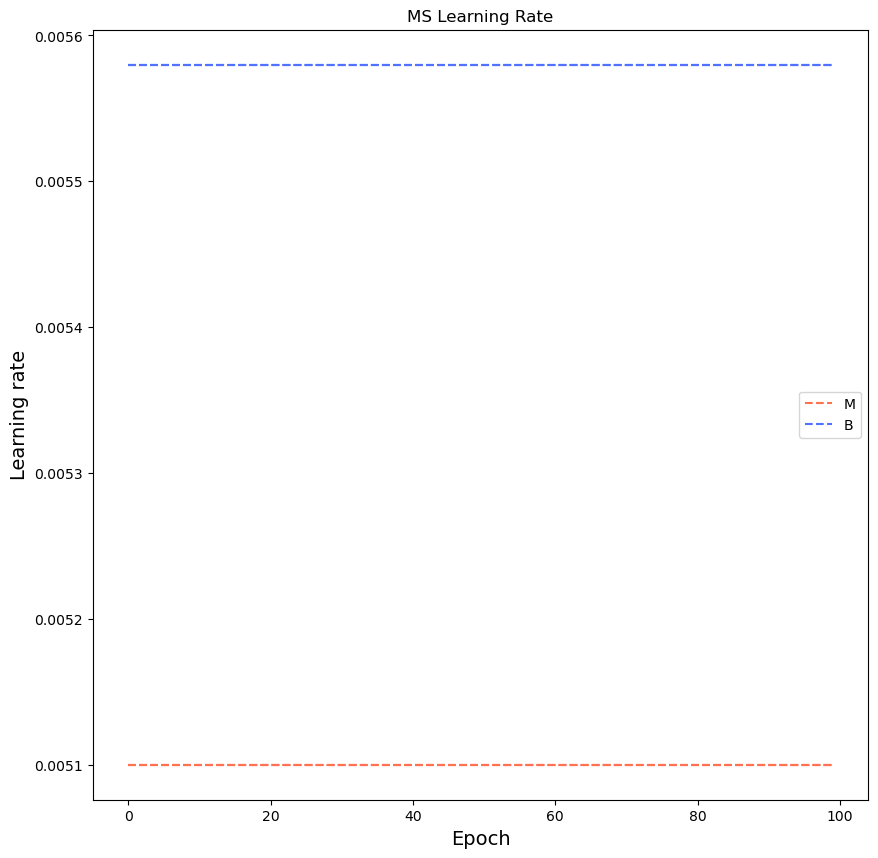

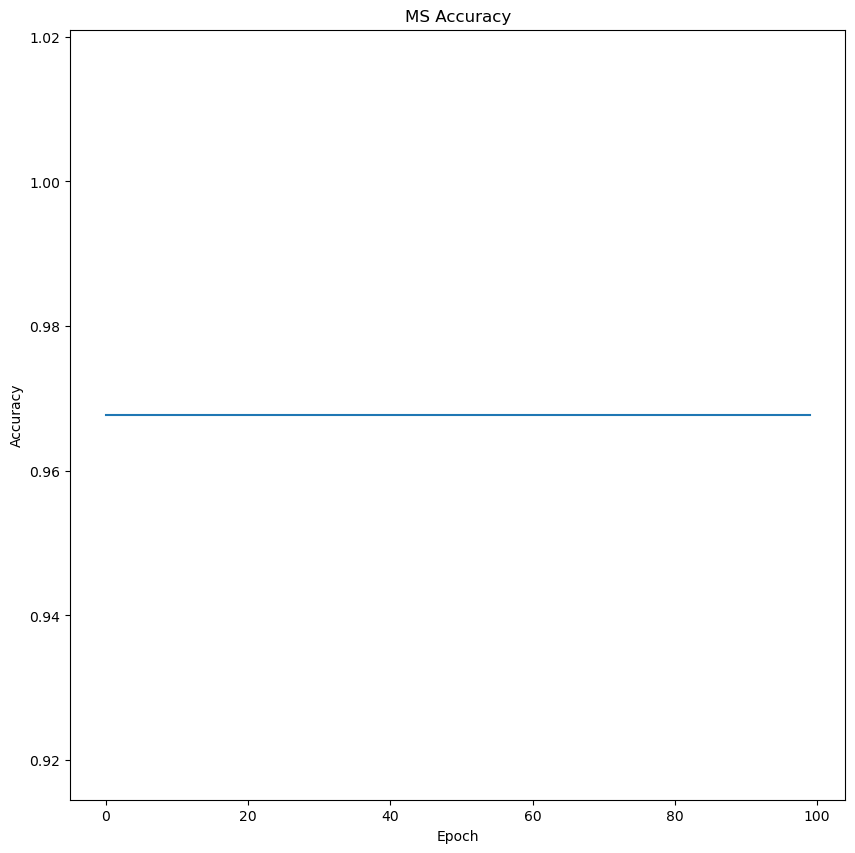

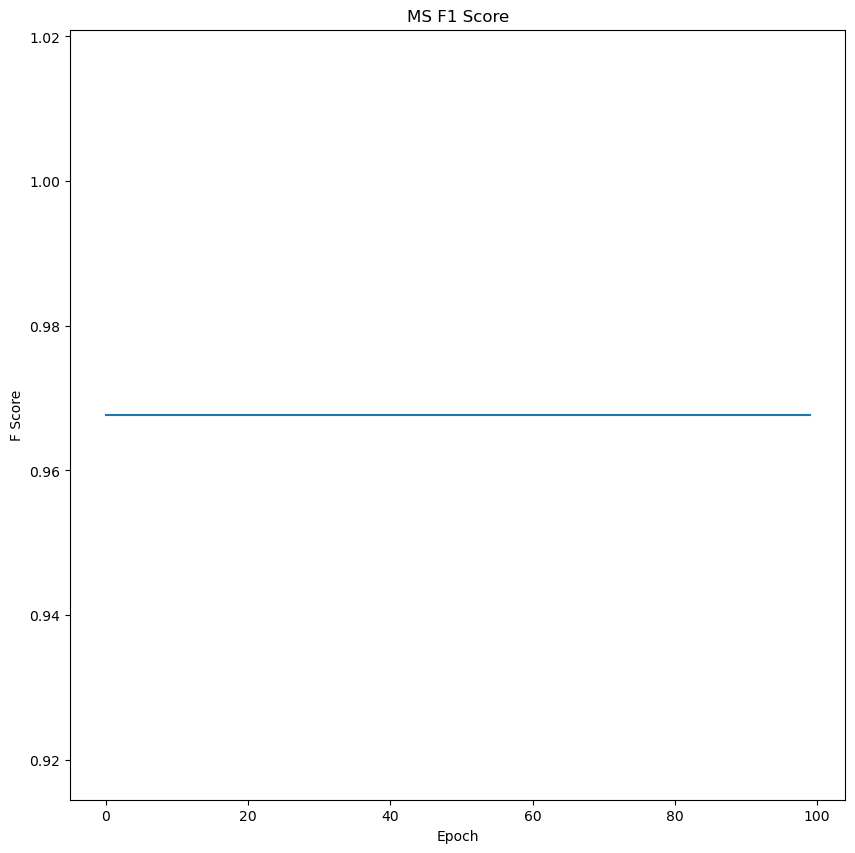

In [36]:
save_figs(ms_glvq_acc, experiment, "MS", learning_rate)

##### LS

##### 1-step lr = 0.1

In [37]:
learning_rate = 0.1
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry, sample_number= train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %


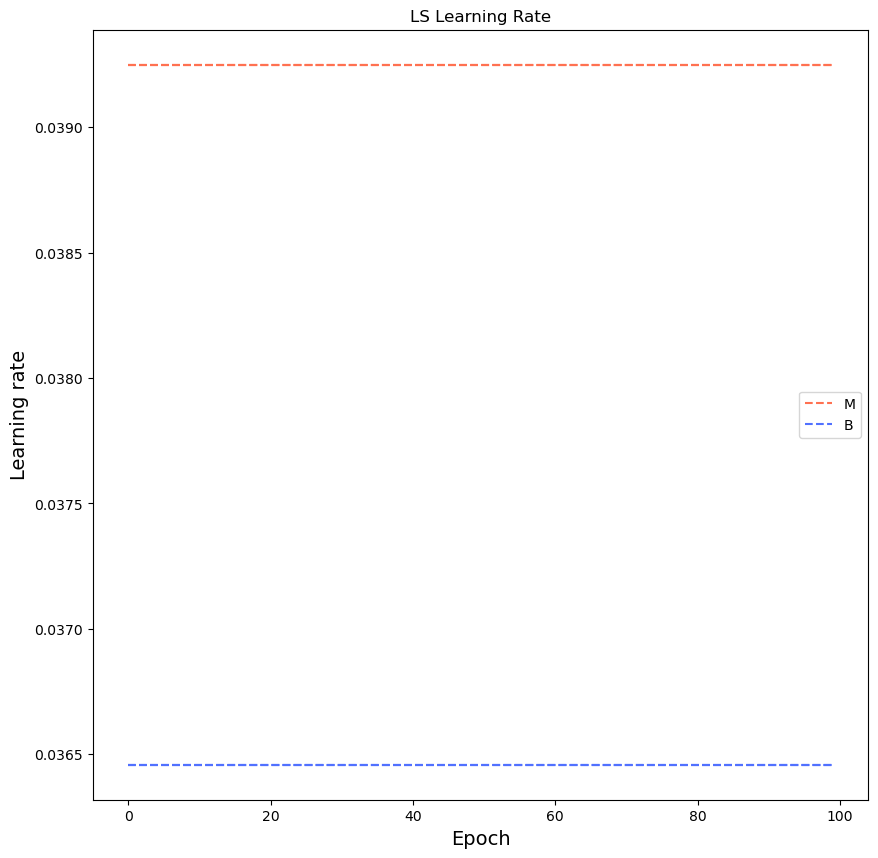

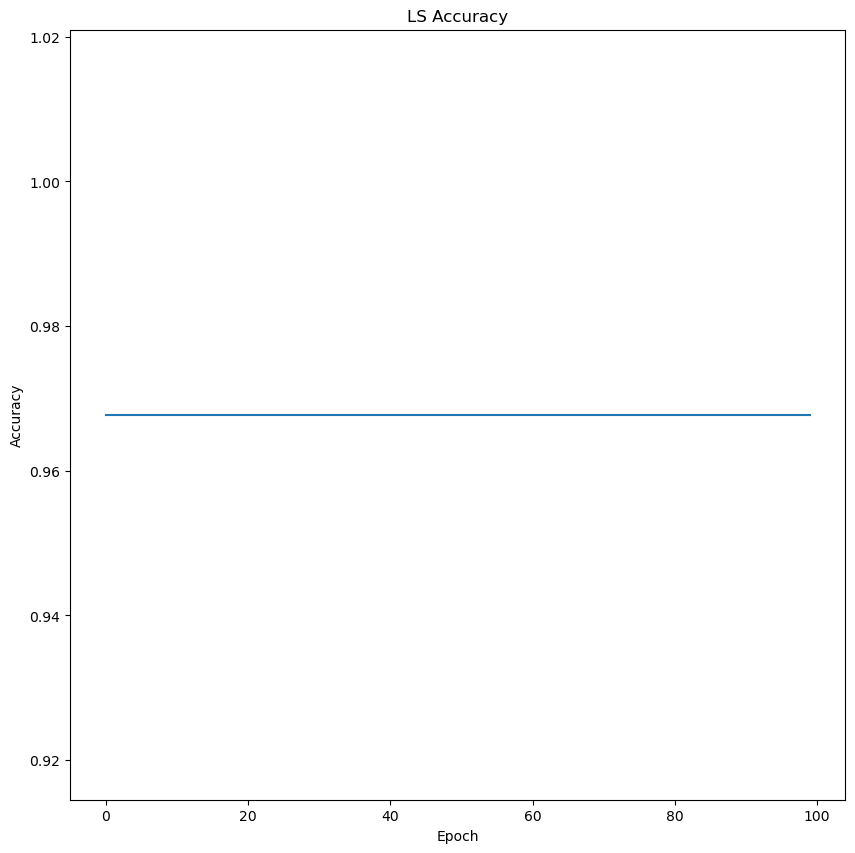

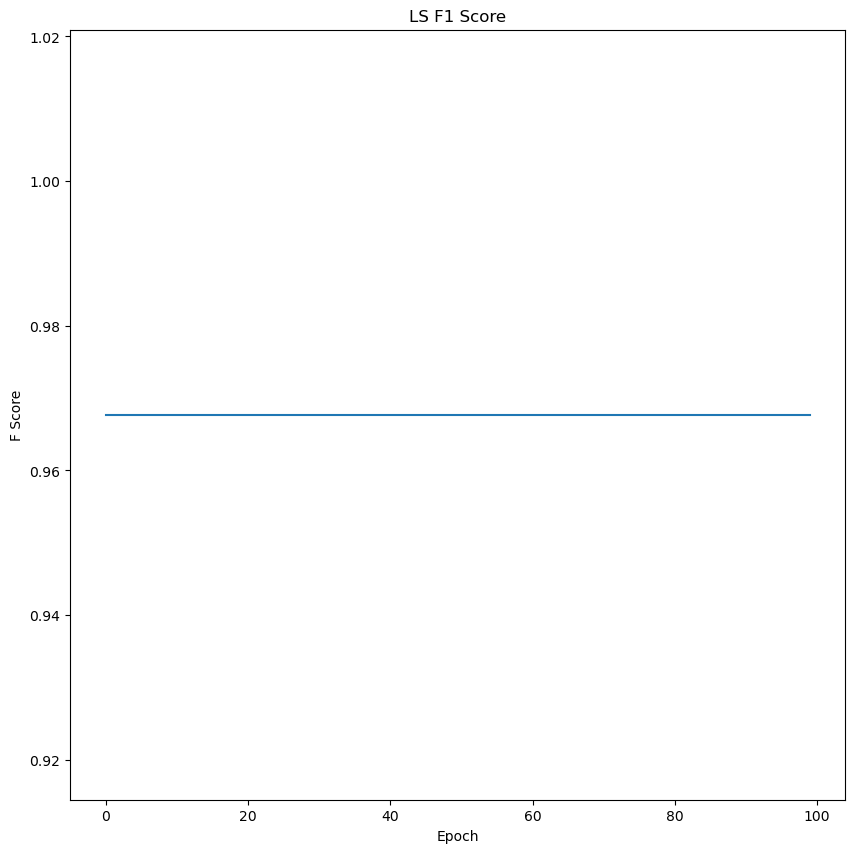

In [38]:
save_figs(ls_glvq_acc, experiment, "LS", learning_rate)

##### 2-step lr = 0.03

In [39]:
learning_rate = 0.03
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry, sample_number= train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %


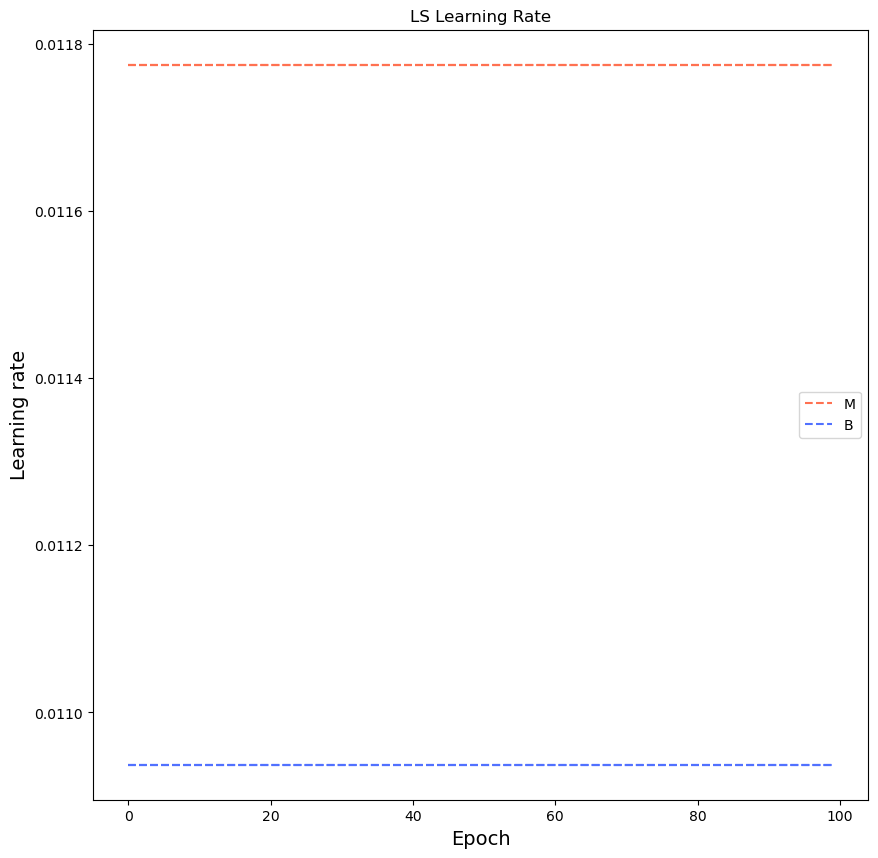

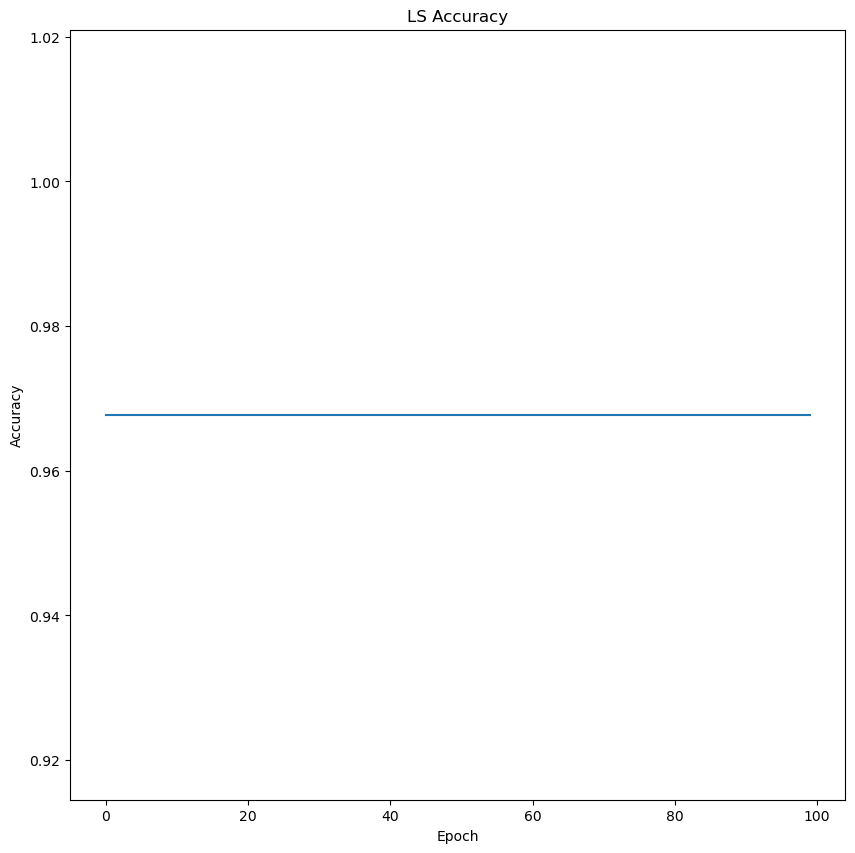

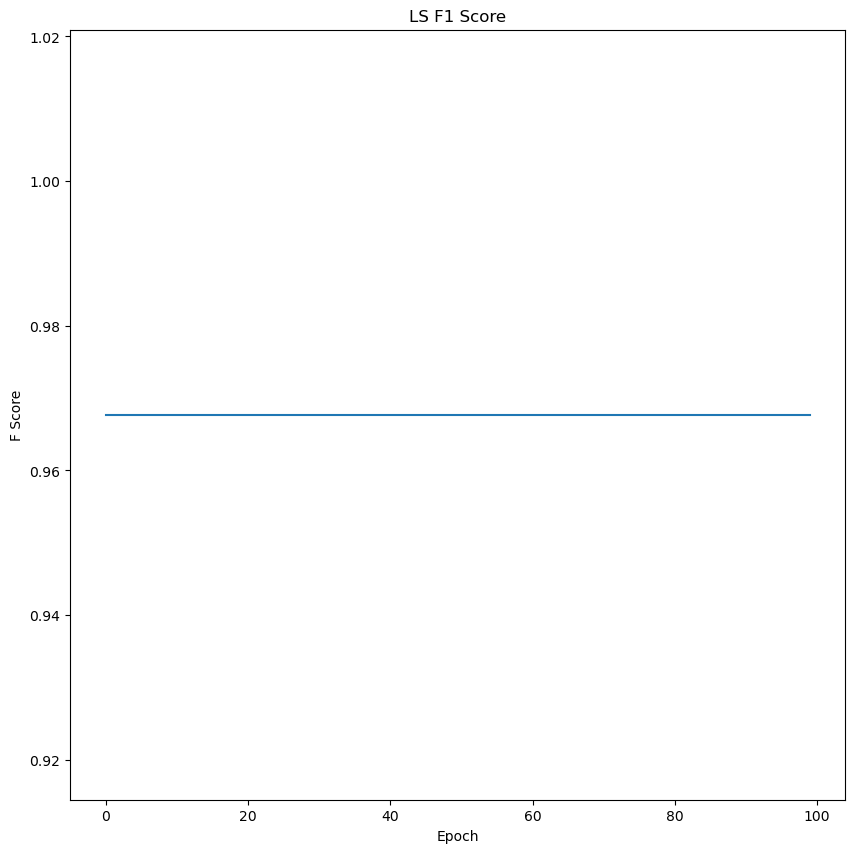

In [40]:
save_figs(ls_glvq_acc, experiment, "LS", learning_rate)

##### 3-step lr = 0.01

In [41]:
learning_rate = 0.01
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry,sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


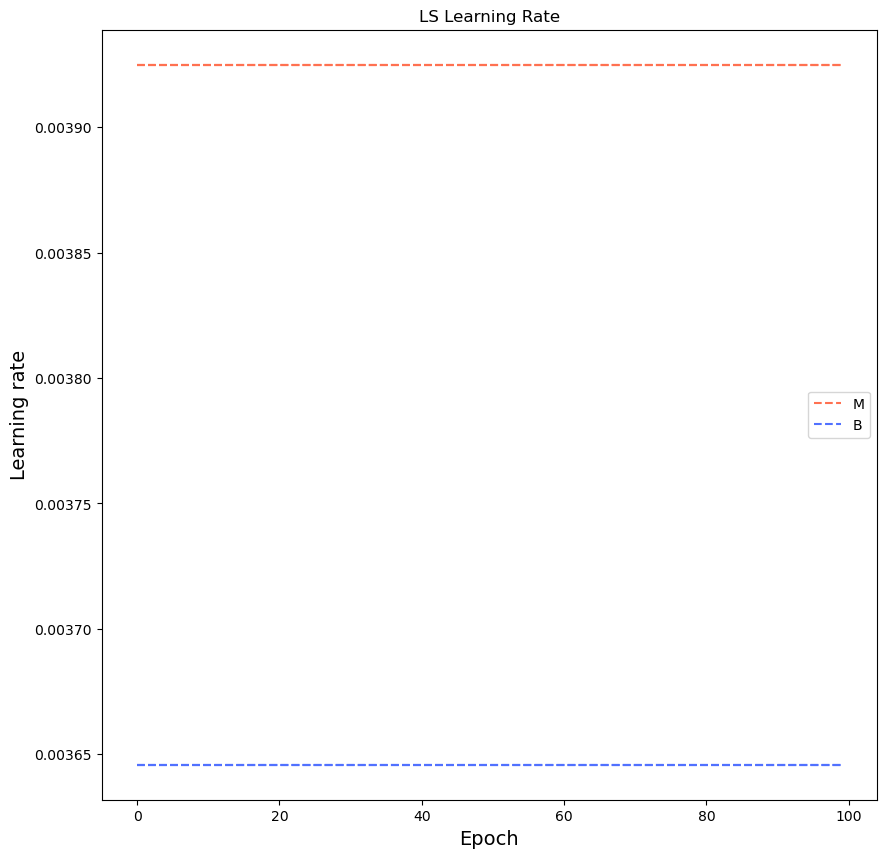

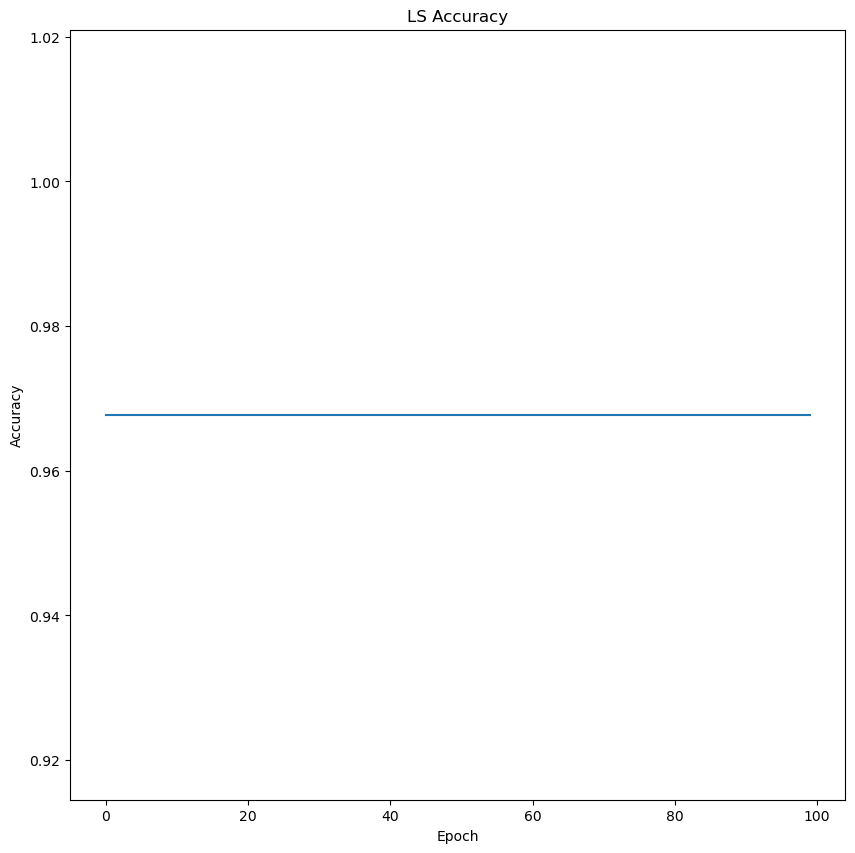

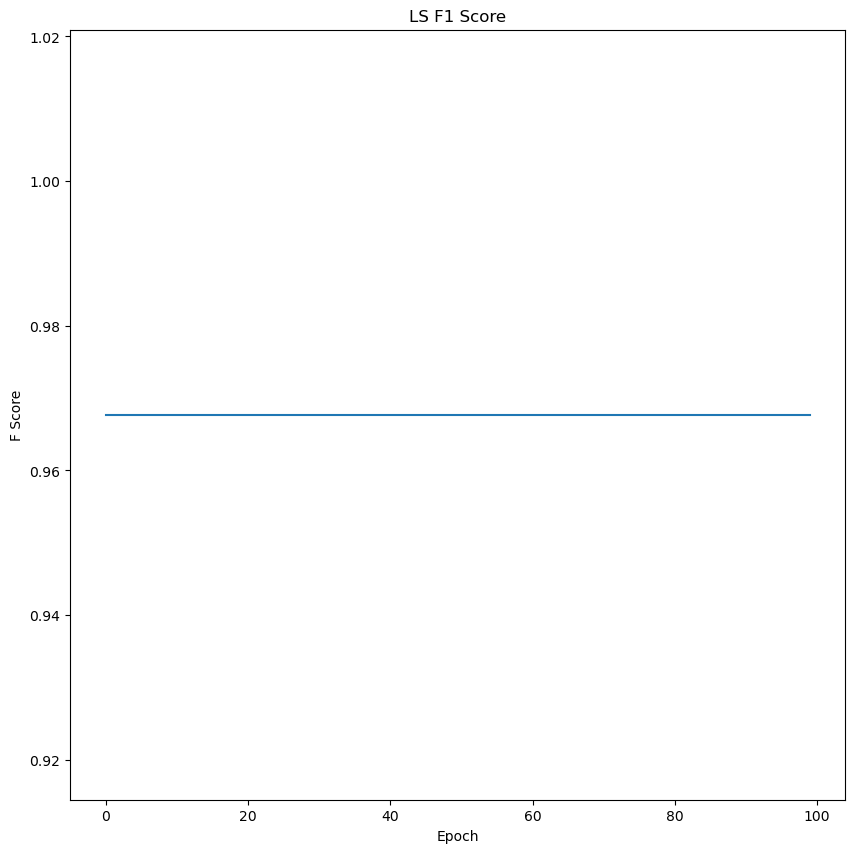

In [42]:
save_figs(ls_glvq_acc, experiment, "LS", learning_rate)

##### LSR

##### 1-step lr = 0.1

In [43]:
learning_rate = 0.1
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4200, Accuracy: 96.77 %, F_1_score: 96.77 %


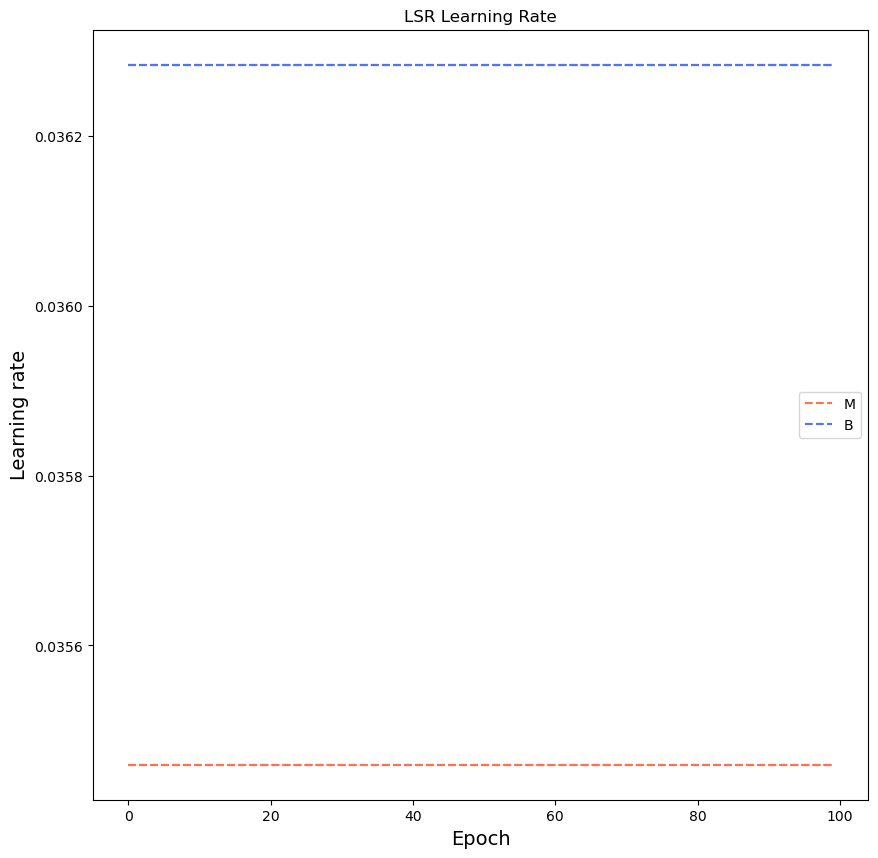

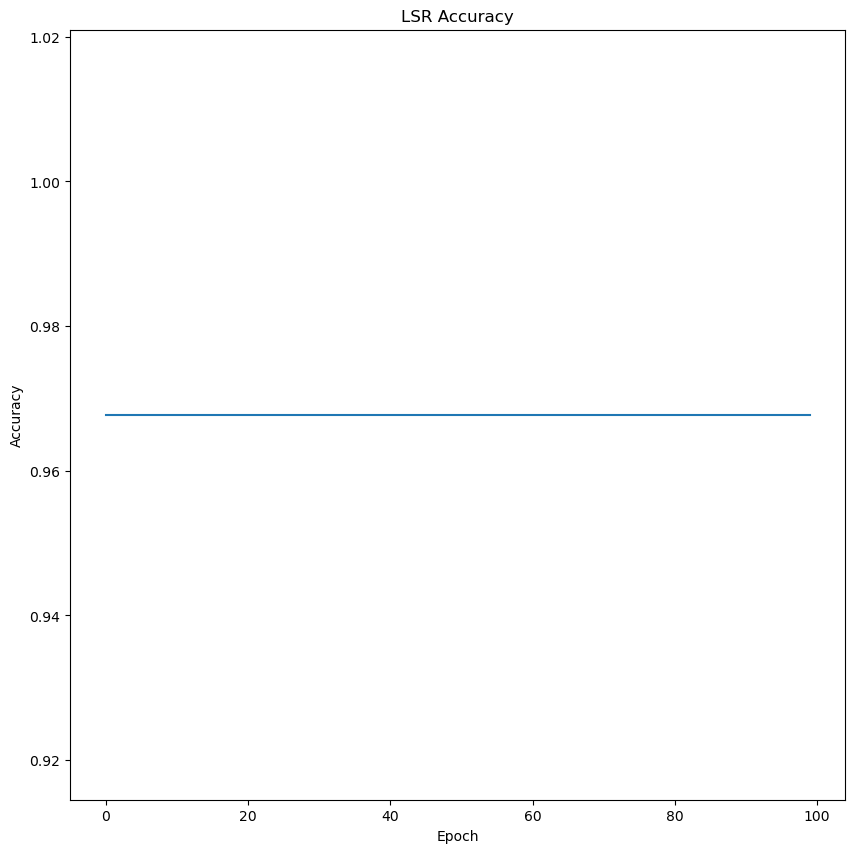

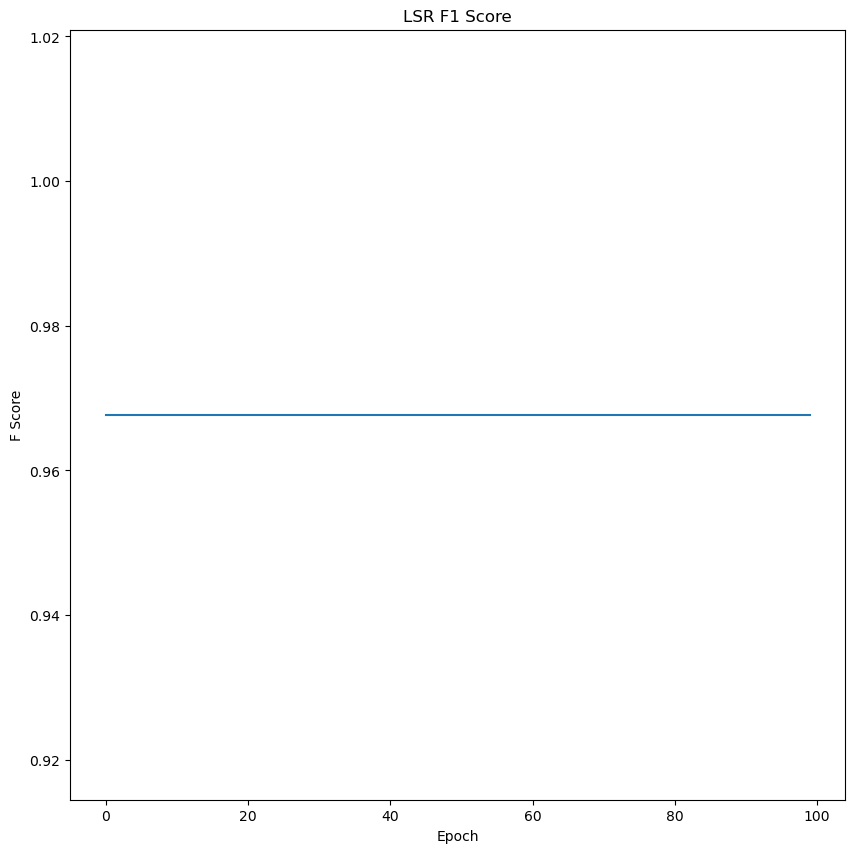

In [44]:
save_figs(lsr_glvq_acc, experiment, "LSR", learning_rate)

##### 2-step lr = 0.03

In [45]:
learning_rate = 0.03
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity,sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4201, Accuracy: 96.77 %, F_1_score: 96.77 %


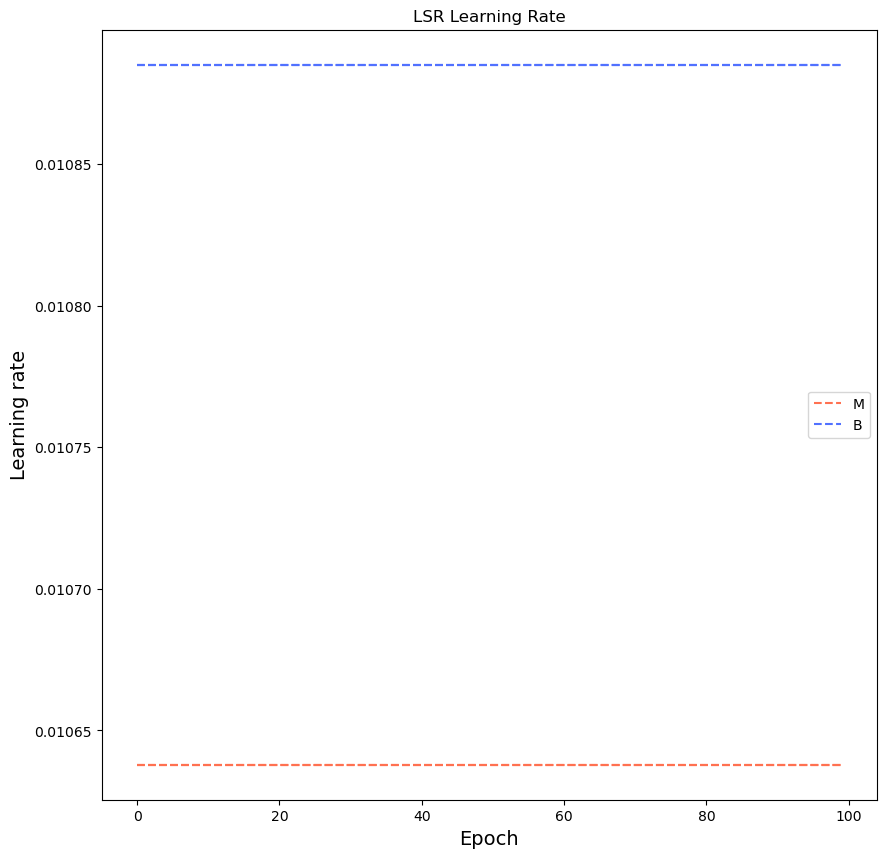

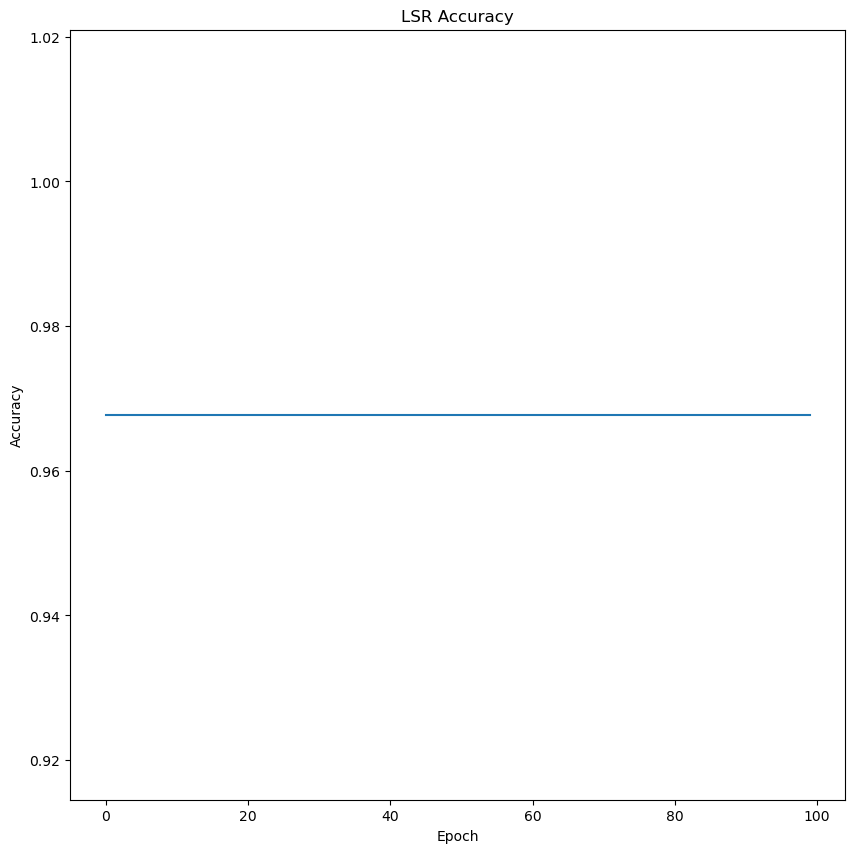

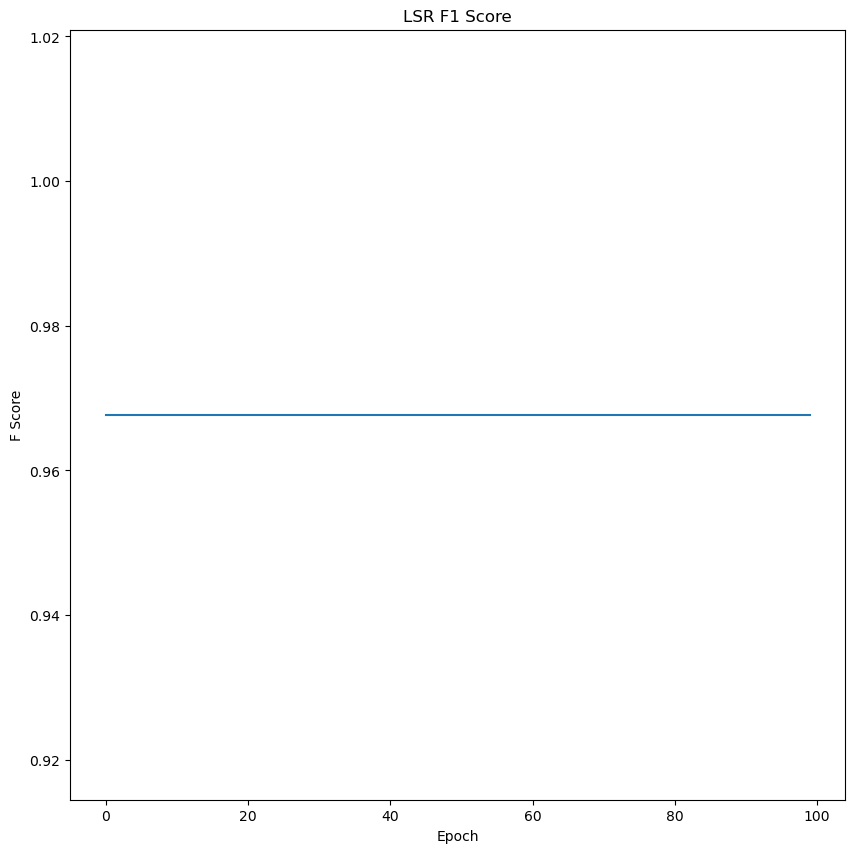

In [46]:
save_figs(lsr_glvq_acc, experiment, "LSR", learning_rate)

##### 3-step lr = 0.01

In [47]:
learning_rate = 0.01
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity, sample_number = train_dist)

Epoch: 1, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 11, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 21, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 31, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 41, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 51, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 61, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 71, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 81, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %
Epoch: 91, Loss: 0.4202, Accuracy: 96.77 %, F_1_score: 96.77 %


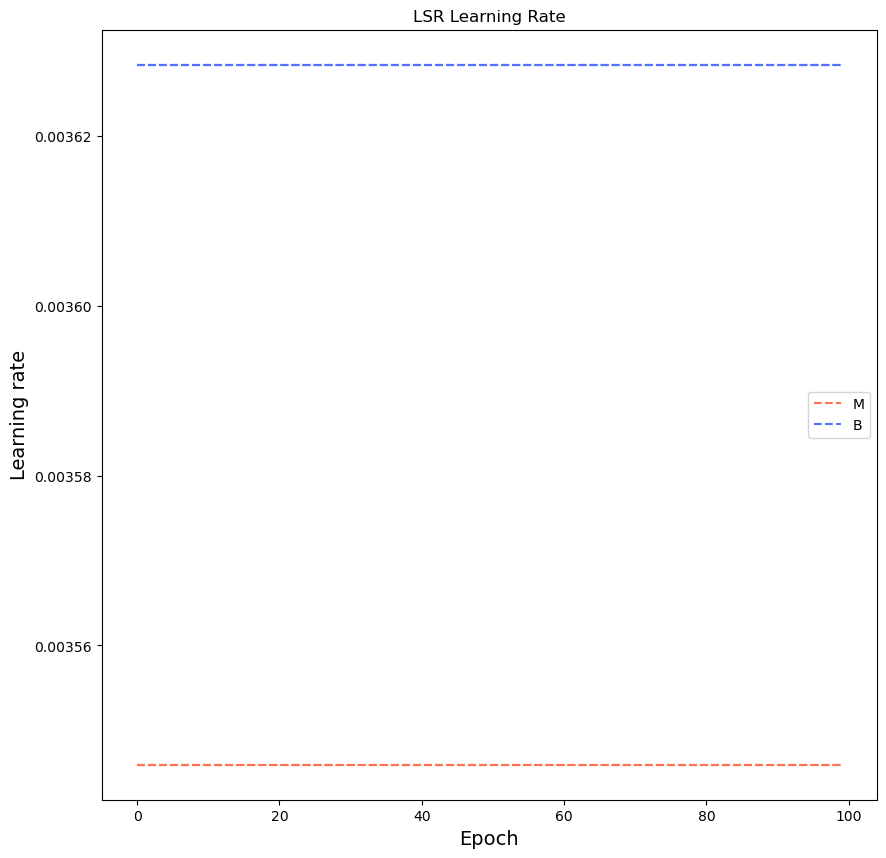

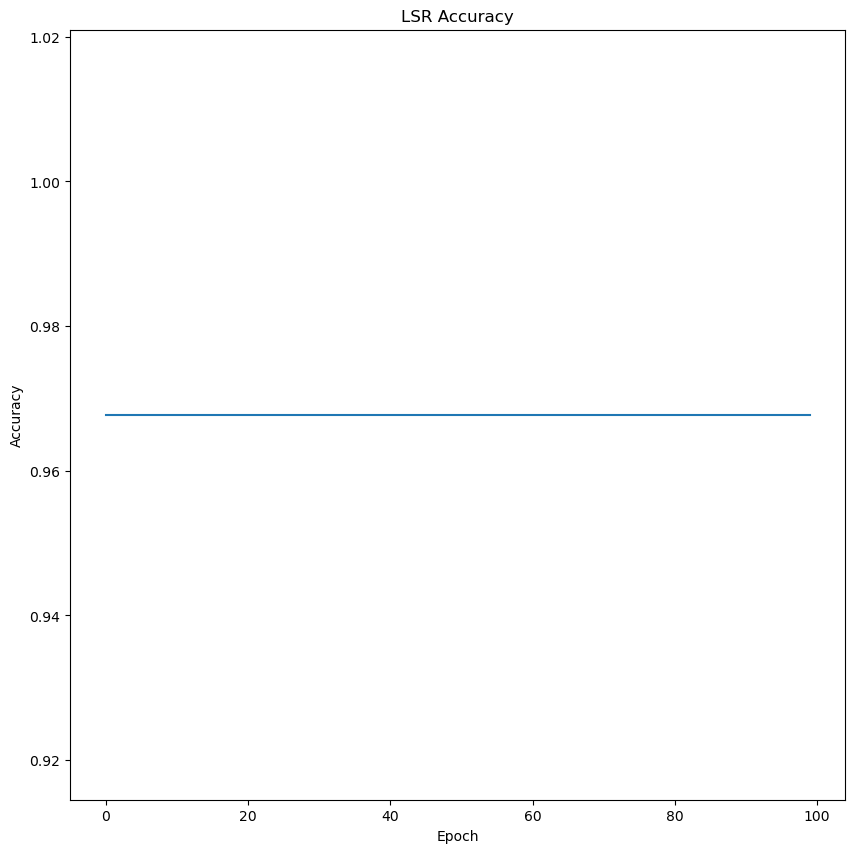

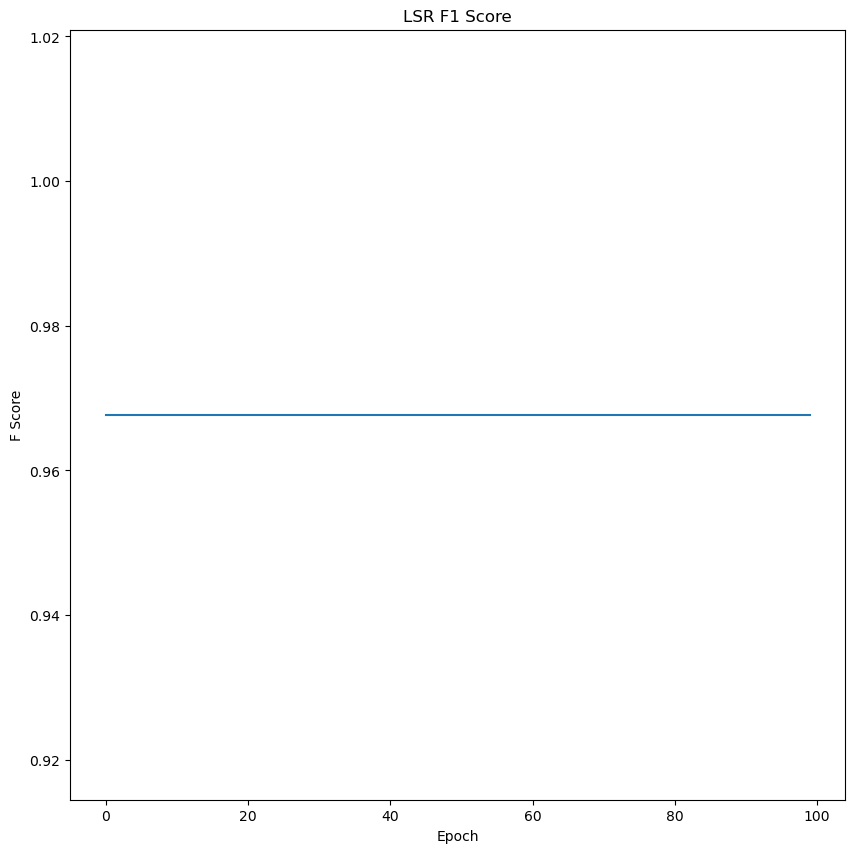

In [48]:
save_figs(lsr_glvq_acc, experiment, "LSR", learning_rate)

##### F1 Score

In [49]:
experiment = "experiment_2"

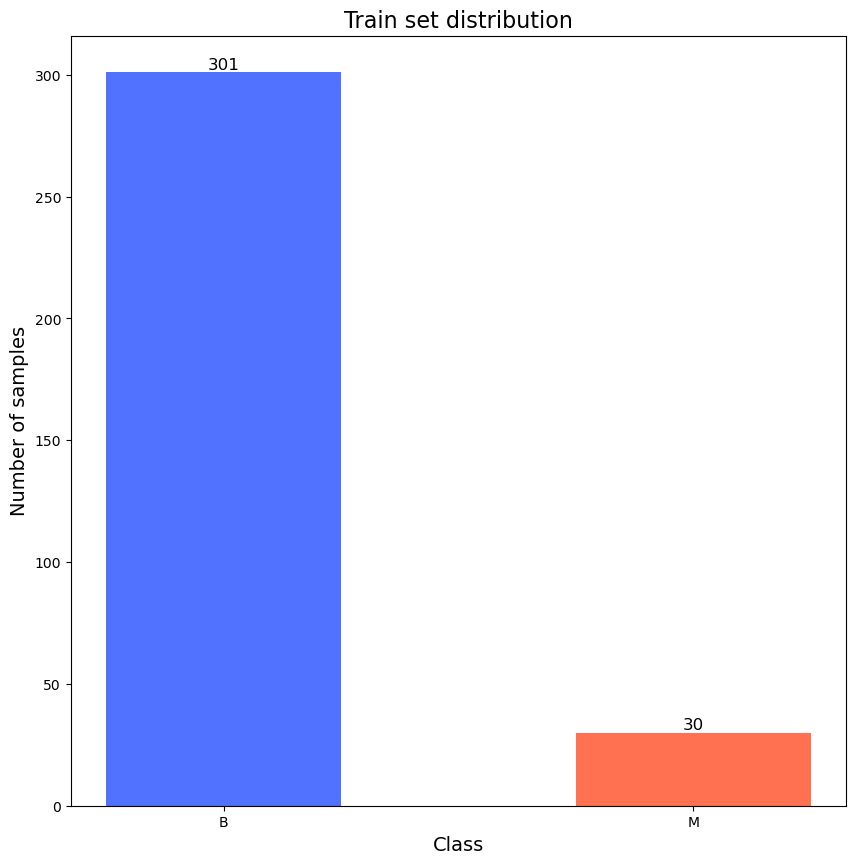

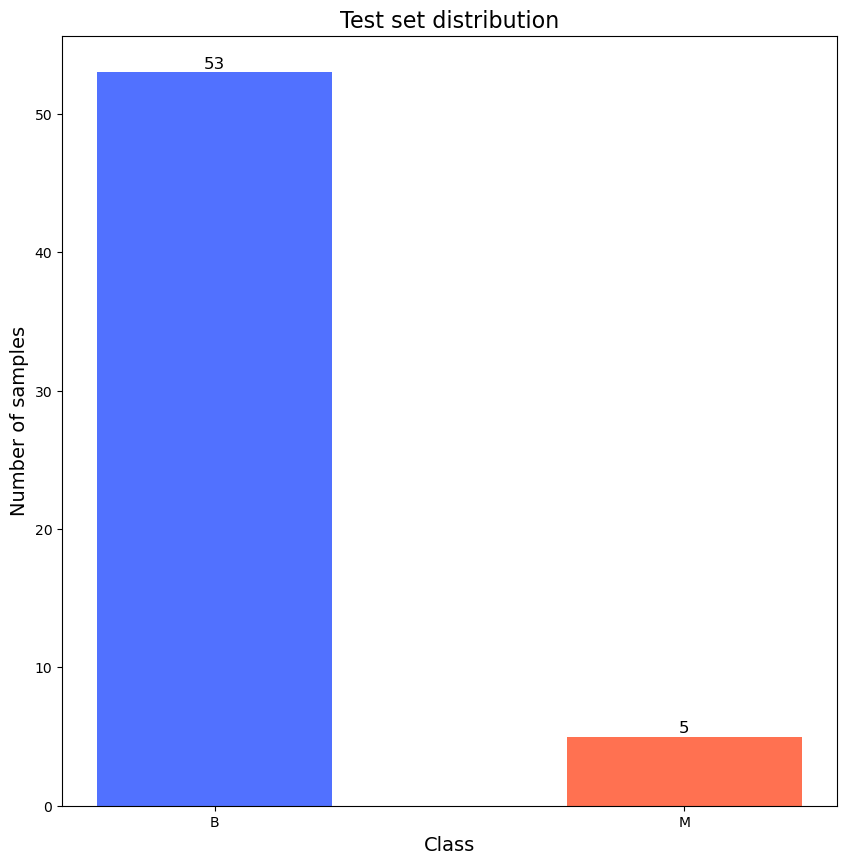

In [50]:
# Select 10% of #sample-1 as #sample-2
max_data = max(count) - num_prototypes
data_per_class = [max_data, int(max_data/10)]
test_percentage = 0.15
test_size = list(map(lambda data: int(data * test_percentage), data_per_class)) 
train_size = [data - test for data, test in zip(data_per_class, test_size)]
feature_f1 = copy.deepcopy(feature)
label_f1 = copy.deepcopy(label)

## Select test set
test_index = []
for j, class_name in enumerate(sample_number):
    index_i = np.where(label_f1 == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, test_size[j])
    test_index += index_i_sample
test_index.sort(reverse=True)
test_set_fscore = [(feature_f1[i],label_f1[i]) for i in test_index]
random.shuffle(test_set_fscore)
unique, counts = np.unique(label_f1[test_index], return_counts=True)
test_dist = dict(zip(unique, counts))
feature_f1 = np.delete(feature_f1, test_index, axis=0)
label_f1 = np.delete(label_f1, test_index, axis=0)

## Select train set
train_index = []
for j, class_name in enumerate(sample_number):
    index_i = np.where(label_f1 == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, train_size[j])
    train_index += index_i_sample
train_index.sort(reverse=True)
train_set_fscore = [(feature_f1[i],label_f1[i]) for i in train_index]
random.shuffle(train_set_fscore)
unique, counts = np.unique(label_f1[train_index], return_counts=True)
train_dist = dict(zip(unique, counts))

fig, ax = plt.subplots(figsize=(10, 10))
for i, (k, v) in enumerate(train_dist.items()):
    ax.bar(k, v, width=0.5, color=colors[i])
    plt.text(k, v+0.1, str(v), ha='center', va='bottom', fontsize=12)
plt.title('Train set distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
for i, (k, v) in enumerate(test_dist.items()):
    ax.bar(k, v, width=0.5, color=colors[i])
    plt.text(k, v+0.1, str(v), ha='center', va='bottom', fontsize=12)
plt.title('Test set distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.show()

#### Train the Models

In [51]:
num_epochs = 100

##### GLVQ

##### 1-step lr =0.1

In [52]:
learning_rate = 0.1
glvq_fscore = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_fscore.train(num_epochs,train_set_fscore,test_set_fscore, sample_number=train_dist)

Epoch: 1, Loss: 126.8763, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 11, Loss: 126.8387, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 21, Loss: 126.8013, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 31, Loss: 126.7640, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 41, Loss: 126.7269, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 51, Loss: 126.6899, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 61, Loss: 126.6530, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 71, Loss: 126.6163, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 81, Loss: 126.5796, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 91, Loss: 126.5432, Accuracy: 82.76 %, F_1.0_score: 86.00 %


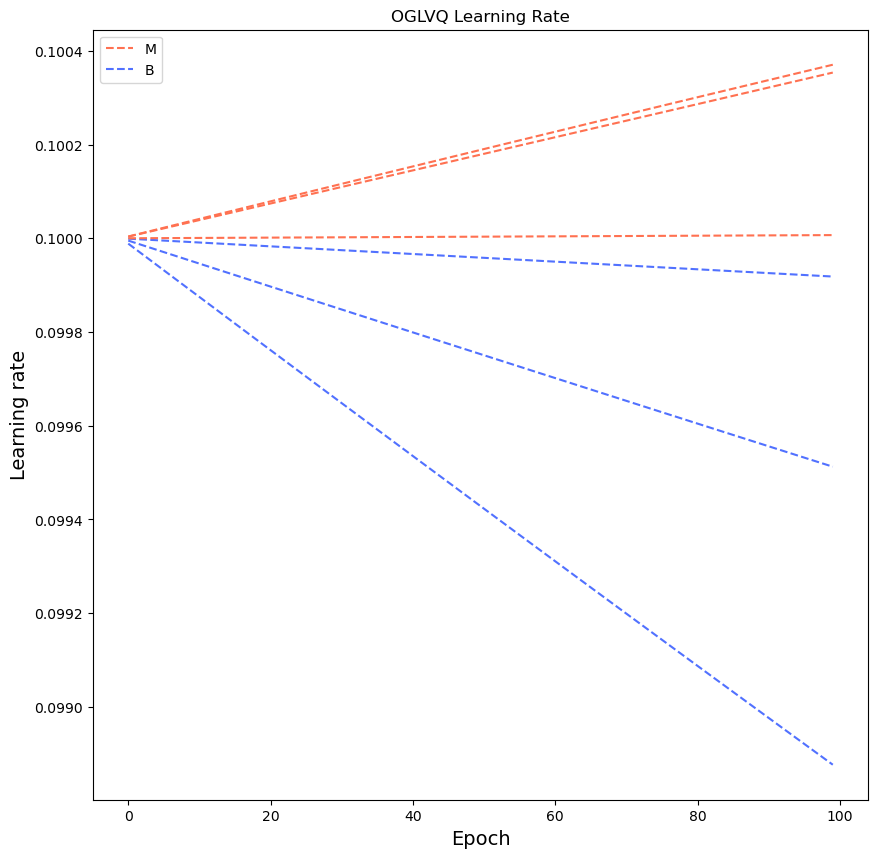

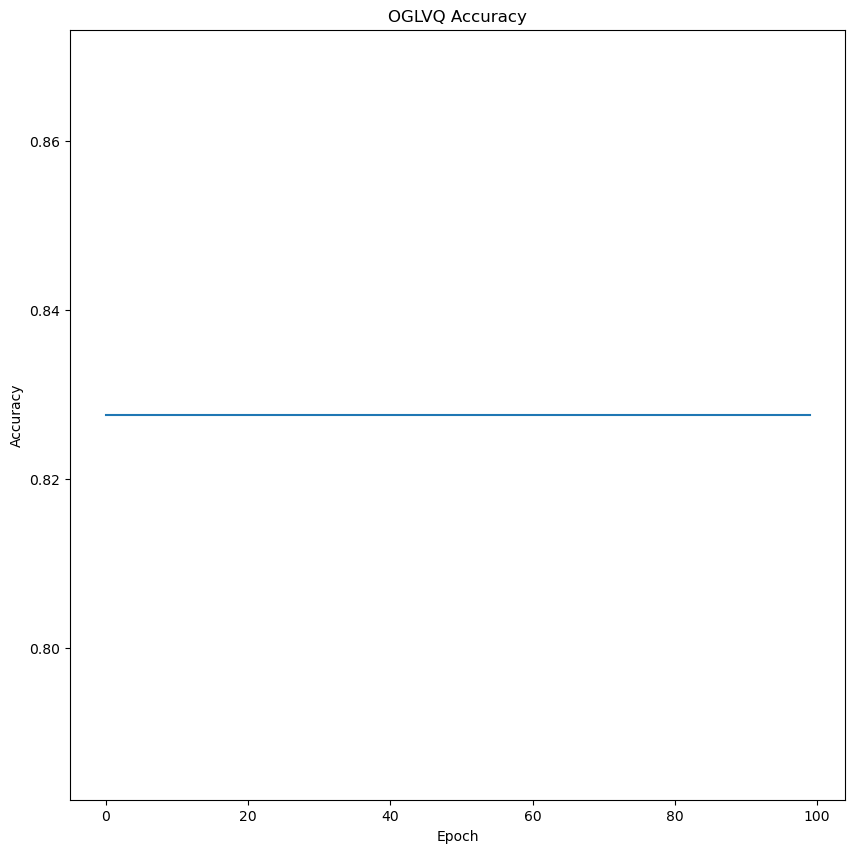

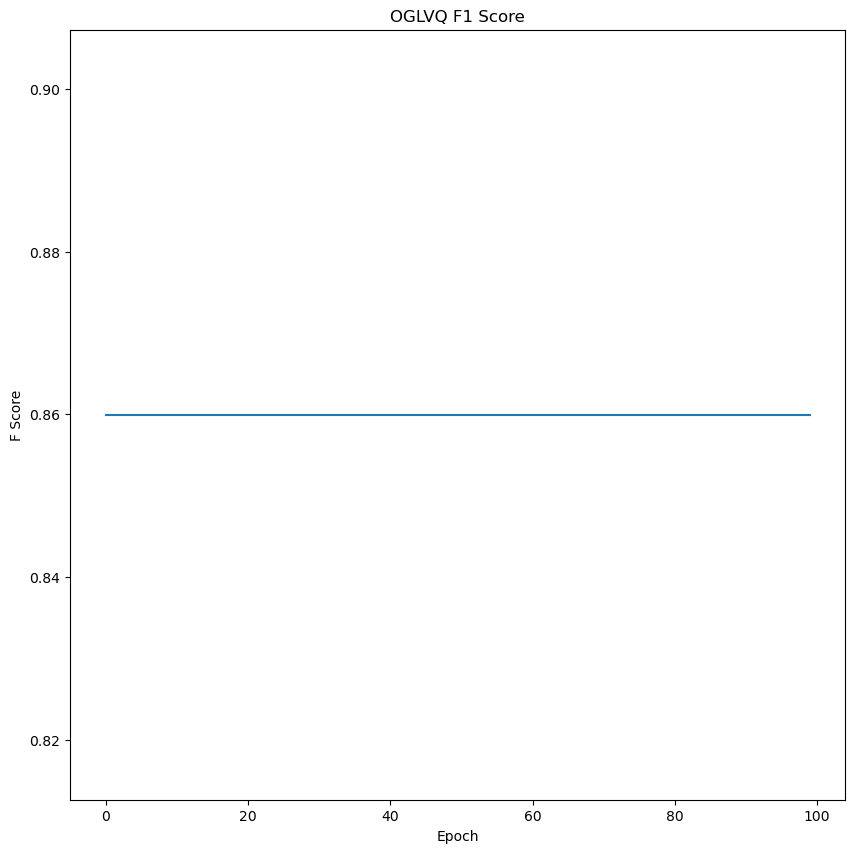

In [53]:
save_figs(glvq_fscore, experiment, "OGLVQ", learning_rate)

##### 2-step lr = 0.03

In [54]:
learning_rate = 0.03
glvq_fscore = glvq.GLVQ(prototypes,learning_rate,)
hist = glvq_fscore.train(num_epochs,train_set_fscore,test_set_fscore,sample_number=train_dist)

Epoch: 1, Loss: 126.8776, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 11, Loss: 126.8663, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 21, Loss: 126.8550, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 31, Loss: 126.8437, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 41, Loss: 126.8325, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 51, Loss: 126.8213, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 61, Loss: 126.8100, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 71, Loss: 126.7988, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 81, Loss: 126.7876, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 91, Loss: 126.7764, Accuracy: 82.76 %, F_1.0_score: 86.00 %


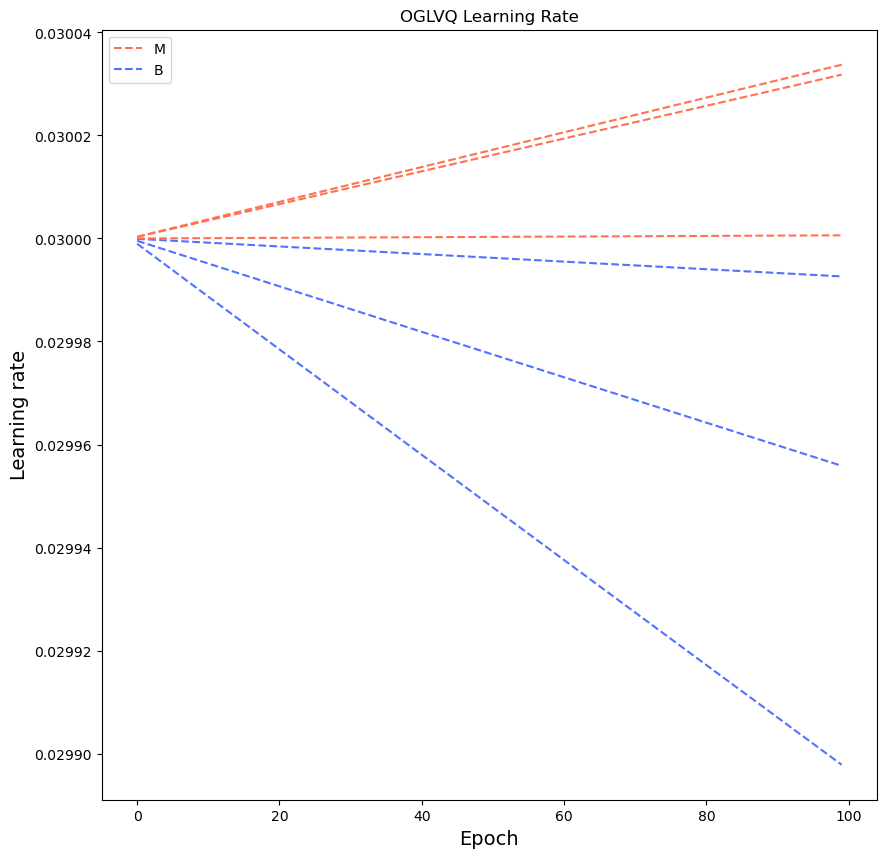

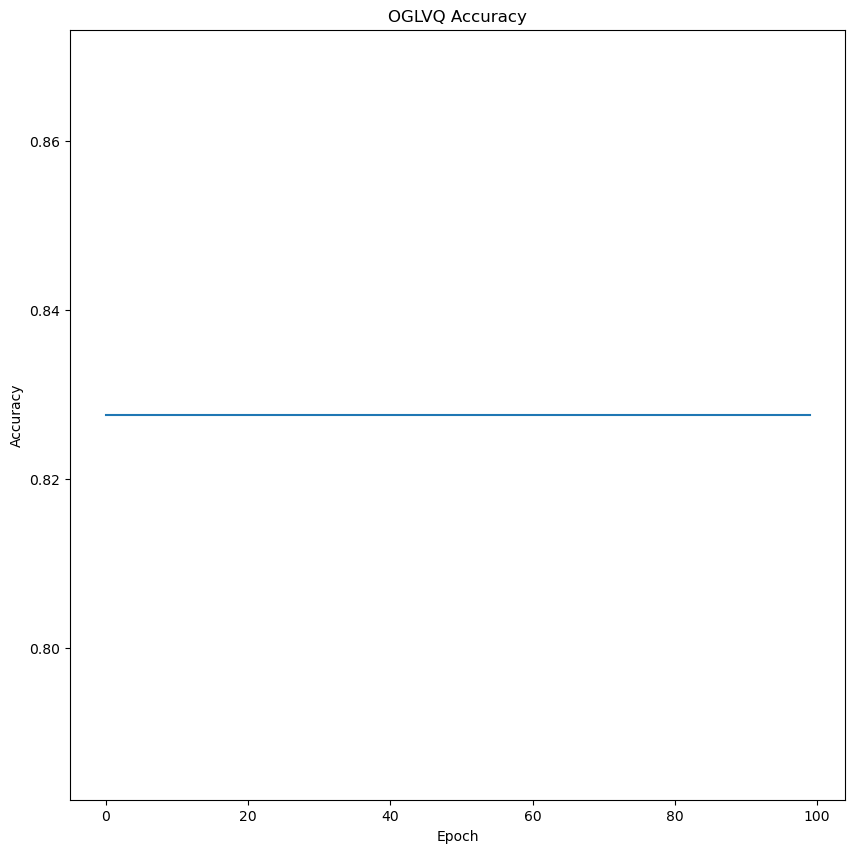

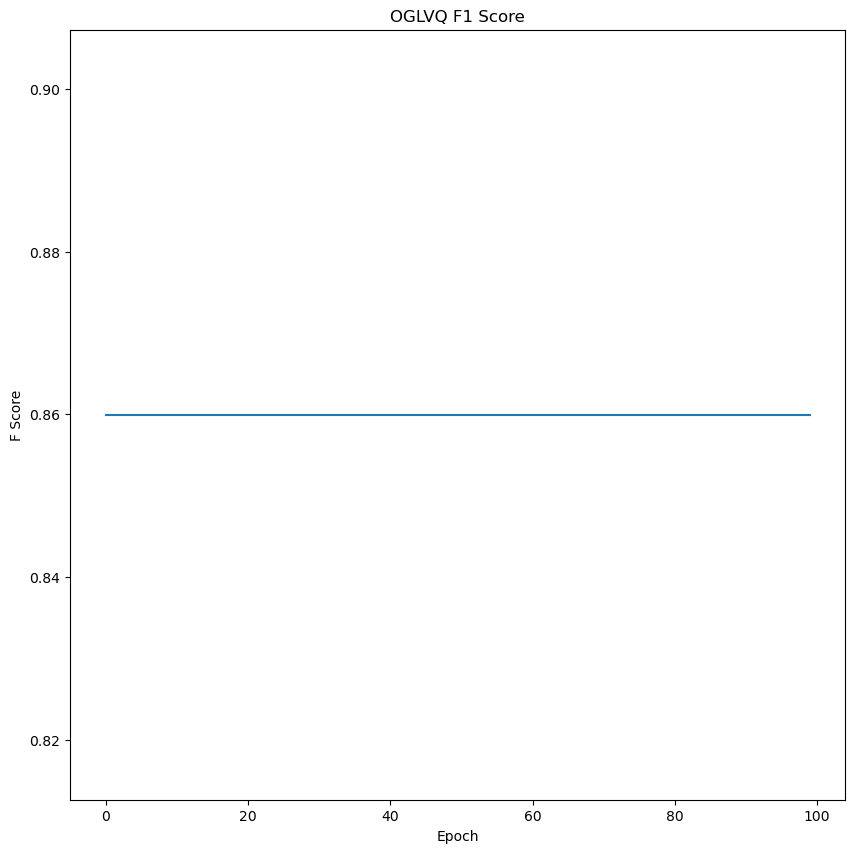

In [55]:
save_figs(glvq_fscore, experiment, "OGLVQ", learning_rate)

##### 3-step lr = 0.01

In [56]:
learning_rate = 0.01
glvq_fscore = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_fscore.train(num_epochs,train_set_fscore,test_set_fscore, sample_number = train_dist)

Epoch: 1, Loss: 126.8779, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 11, Loss: 126.8741, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 21, Loss: 126.8704, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 31, Loss: 126.8666, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 41, Loss: 126.8629, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 51, Loss: 126.8591, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 61, Loss: 126.8554, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 71, Loss: 126.8516, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 81, Loss: 126.8478, Accuracy: 82.76 %, F_1.0_score: 86.00 %
Epoch: 91, Loss: 126.8441, Accuracy: 82.76 %, F_1.0_score: 86.00 %


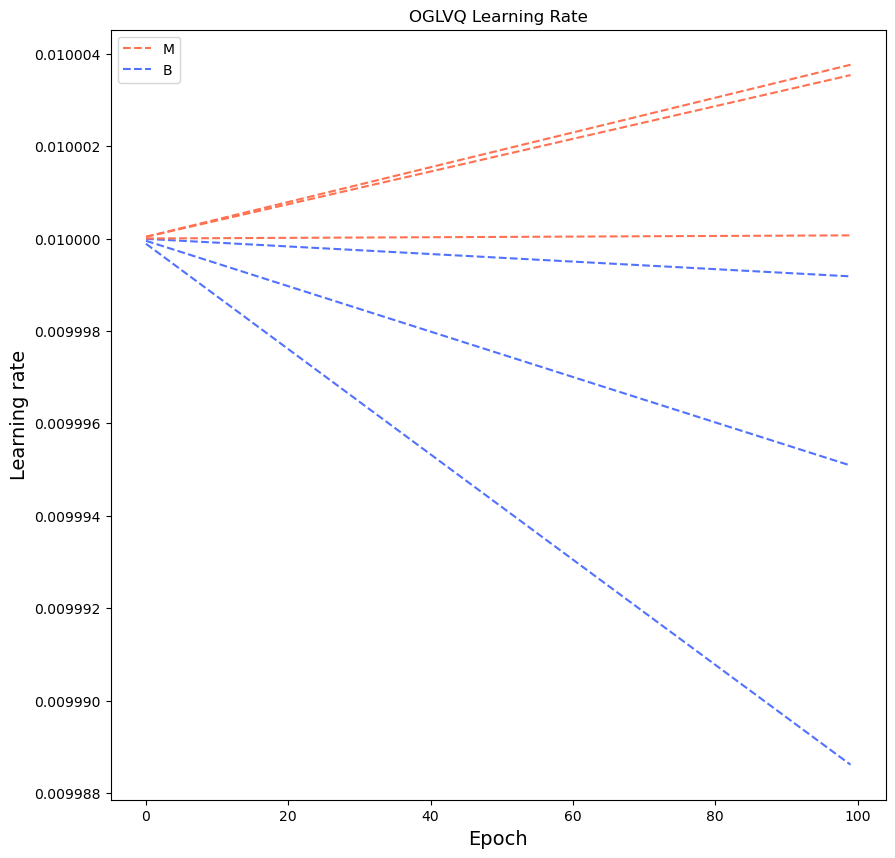

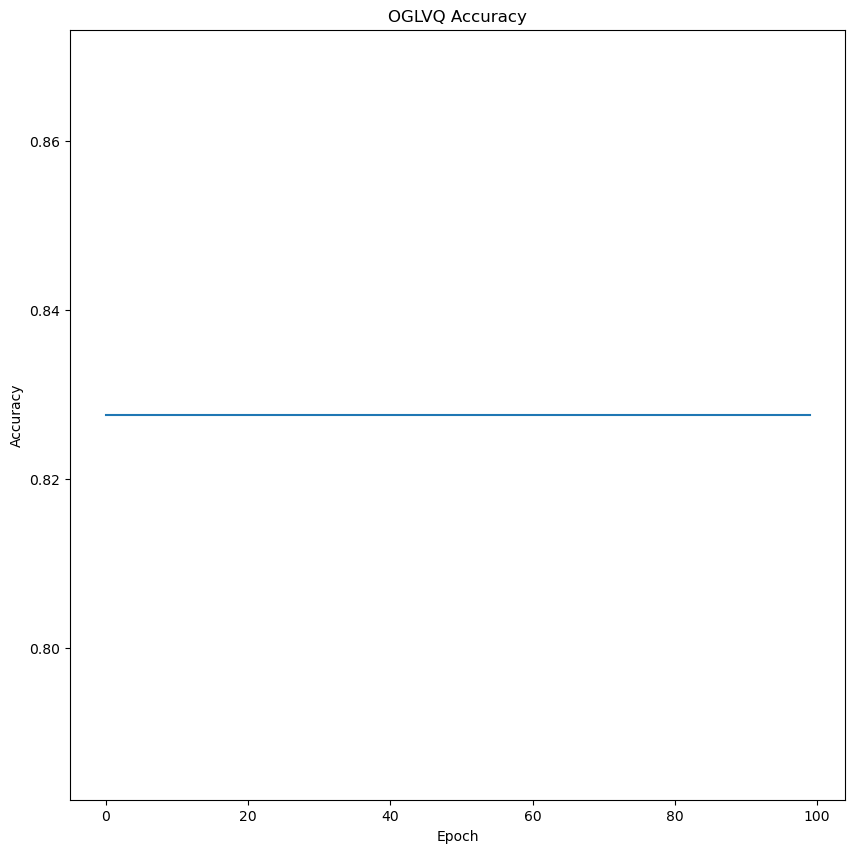

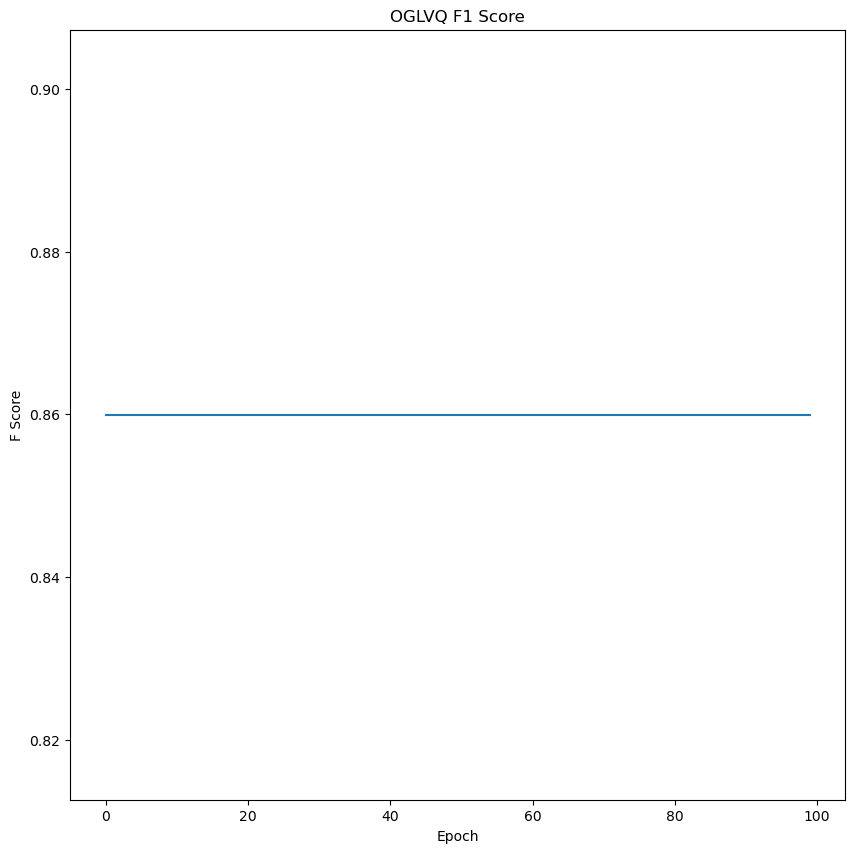

In [57]:
save_figs(glvq_fscore, experiment, "OGLVQ", learning_rate)

##### CP

##### 1-step lr = 0.1

In [58]:
learning_rate = 0.1
cp_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.conditional_probability, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


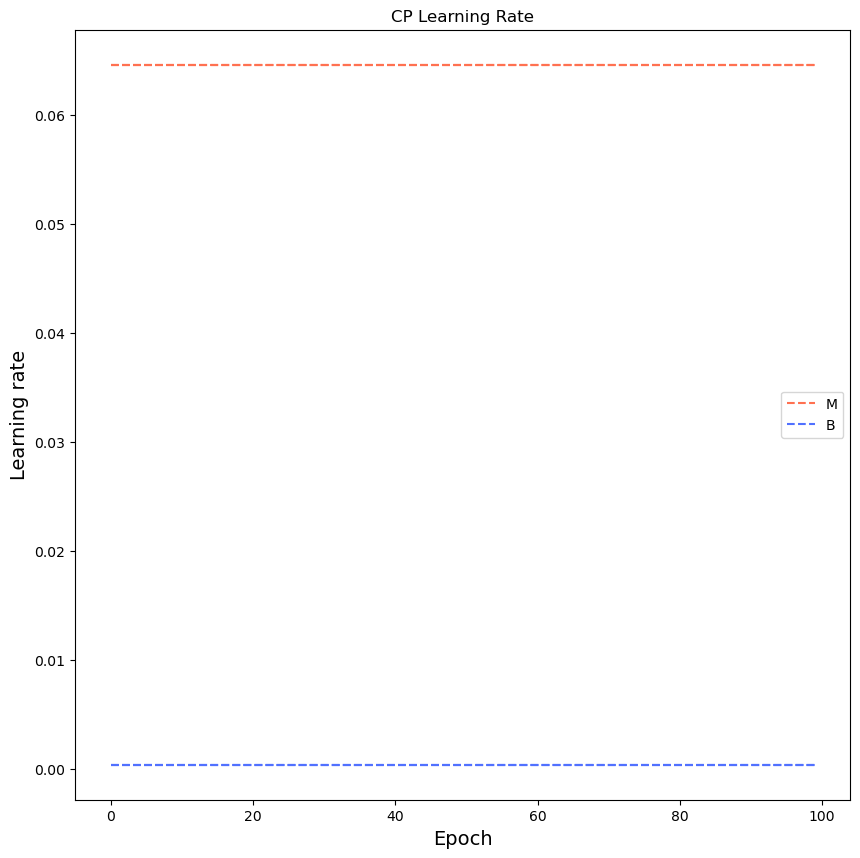

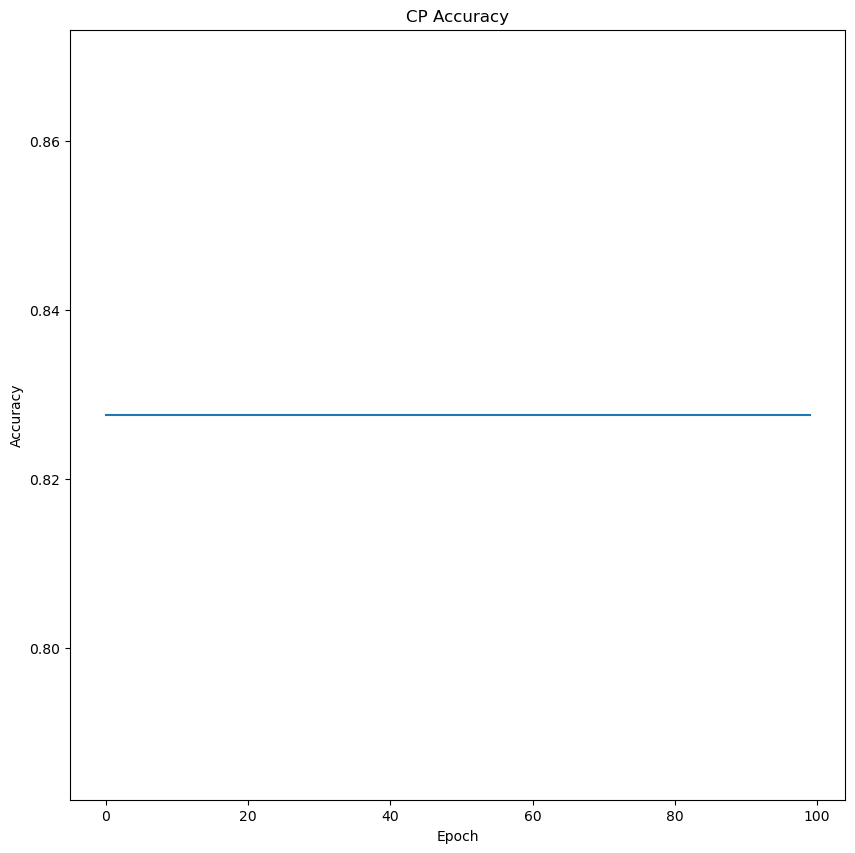

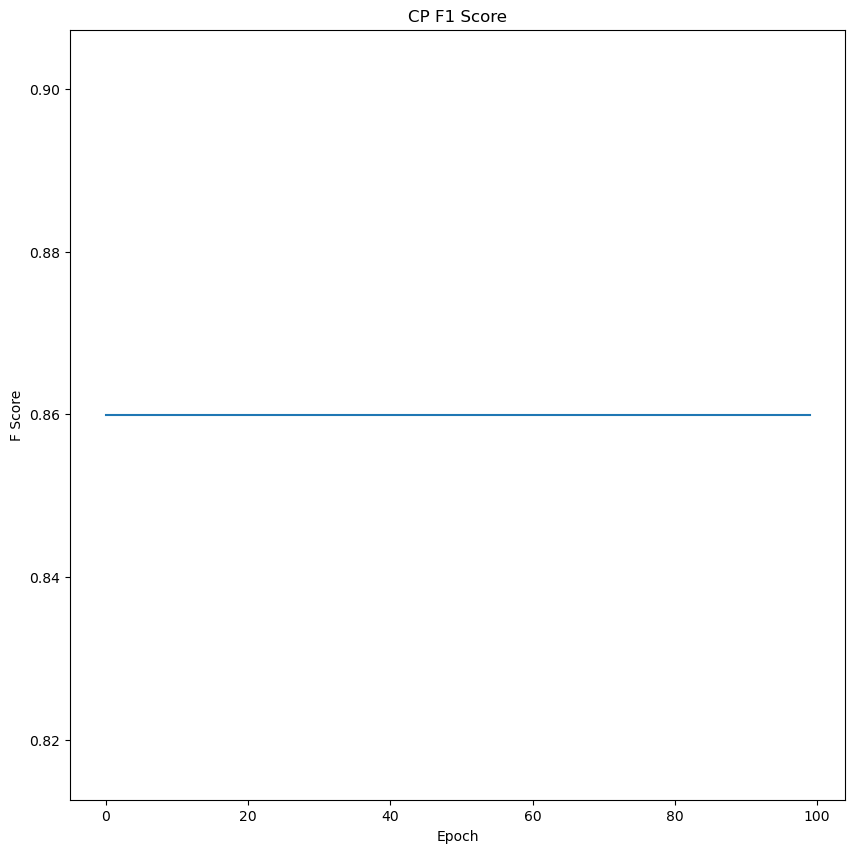

In [59]:
save_figs(cp_glvq_fscore, experiment, "CP", learning_rate)

##### 2-step lr = 0.03

In [60]:
learning_rate = 0.03
cp_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.conditional_probability, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


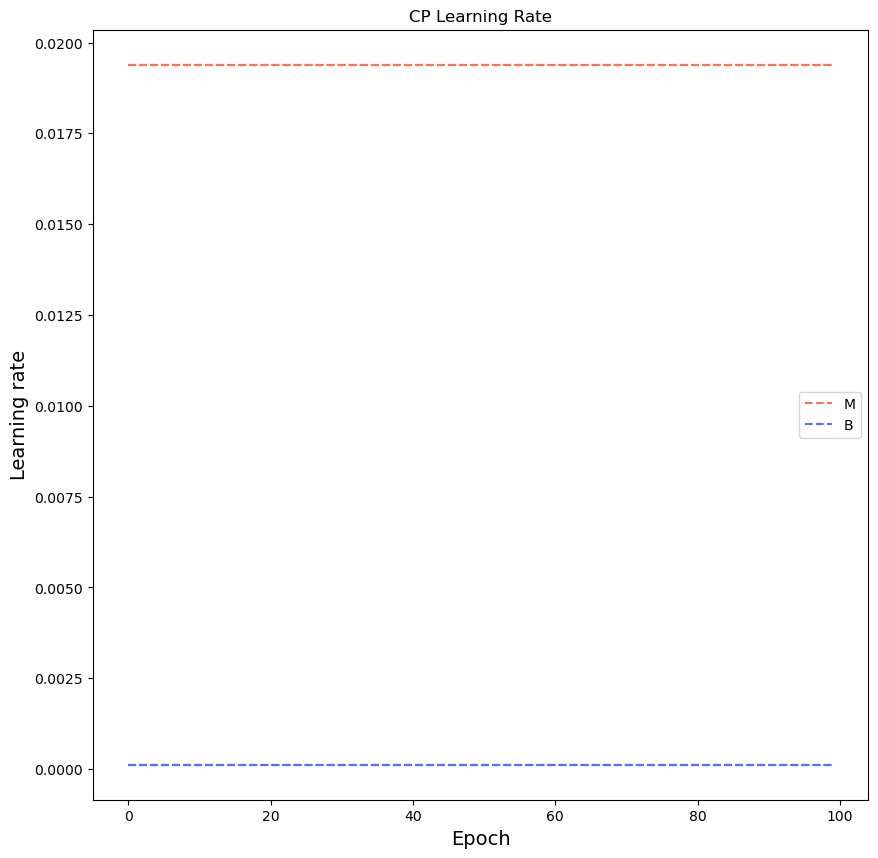

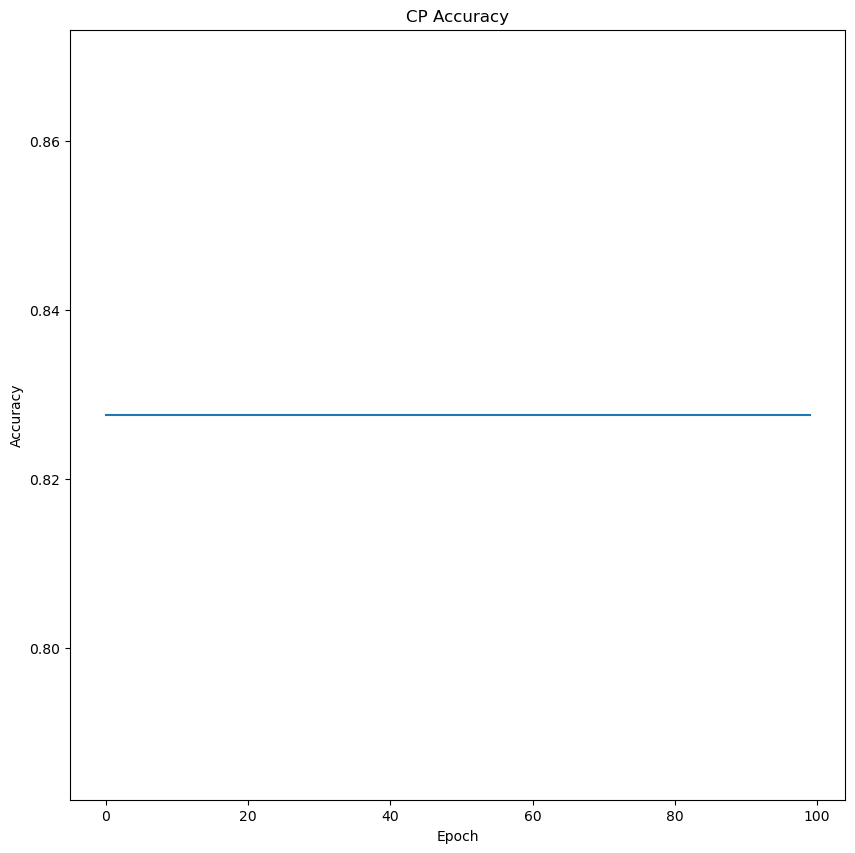

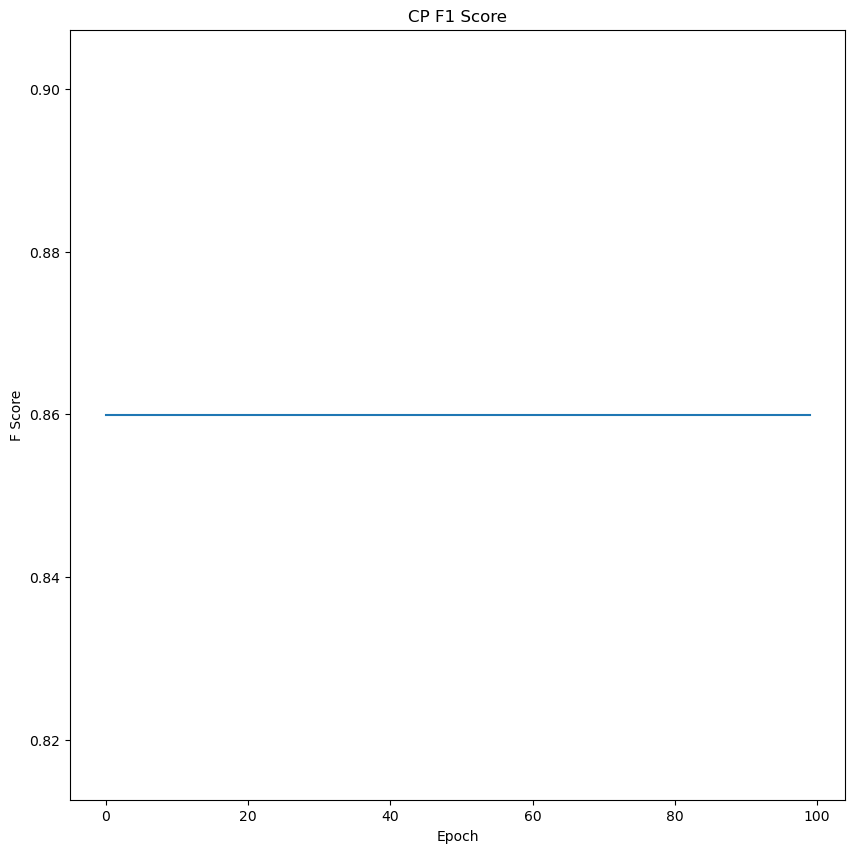

In [61]:
save_figs(cp_glvq_fscore, experiment, "CP", learning_rate)

##### 3-step lr = 0.01

In [62]:
learning_rate = 0.01
cp_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.conditional_probability, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


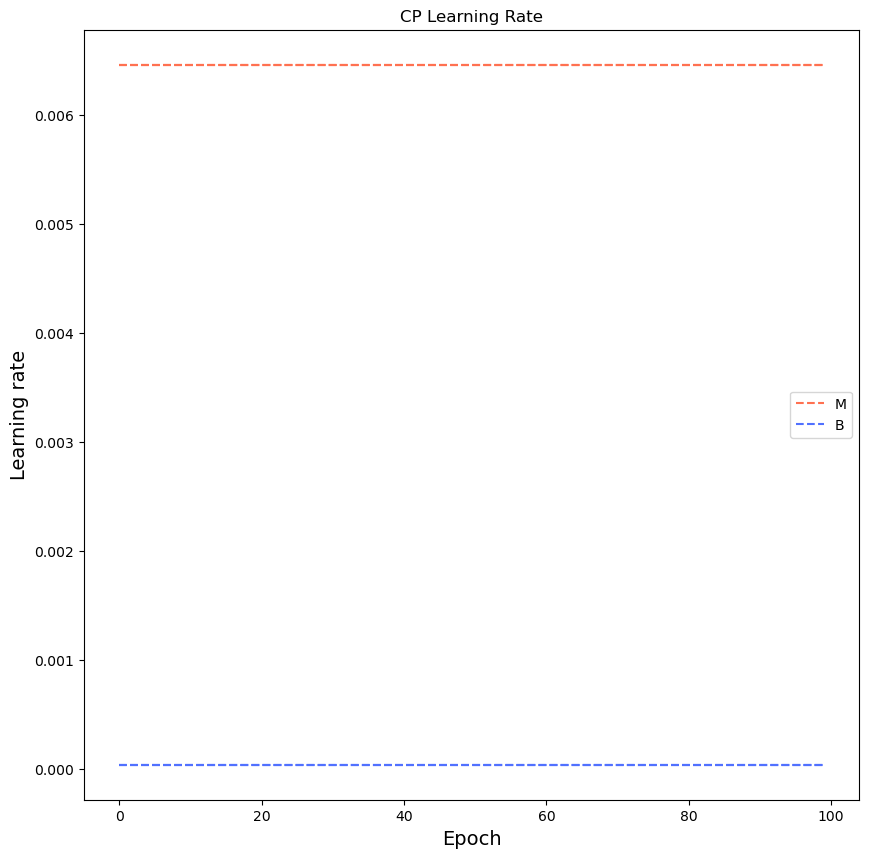

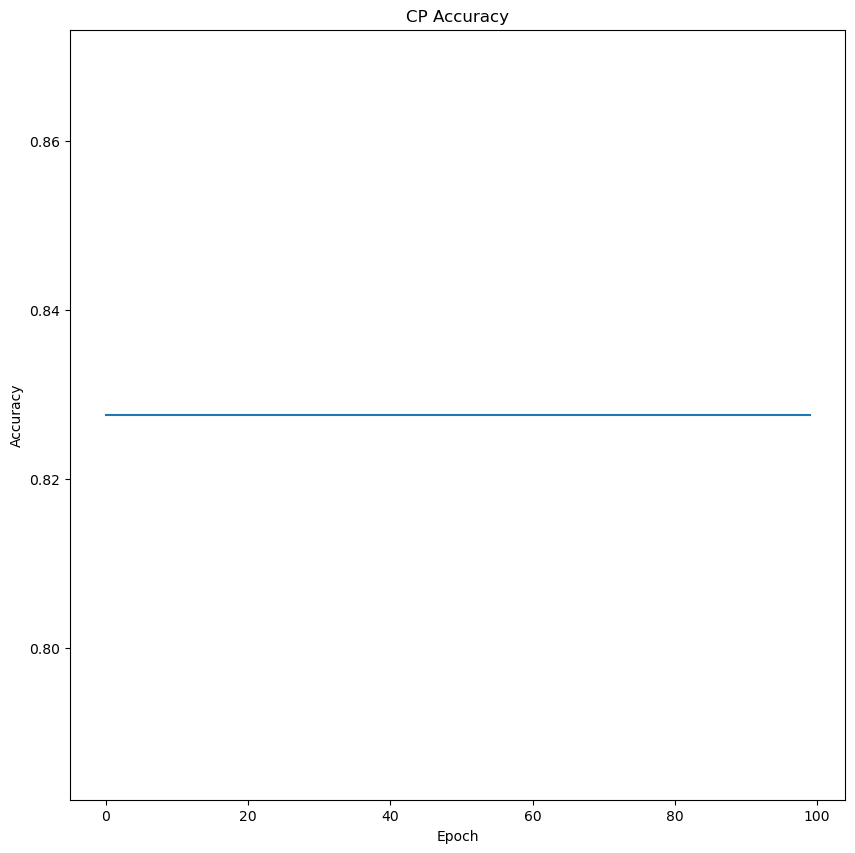

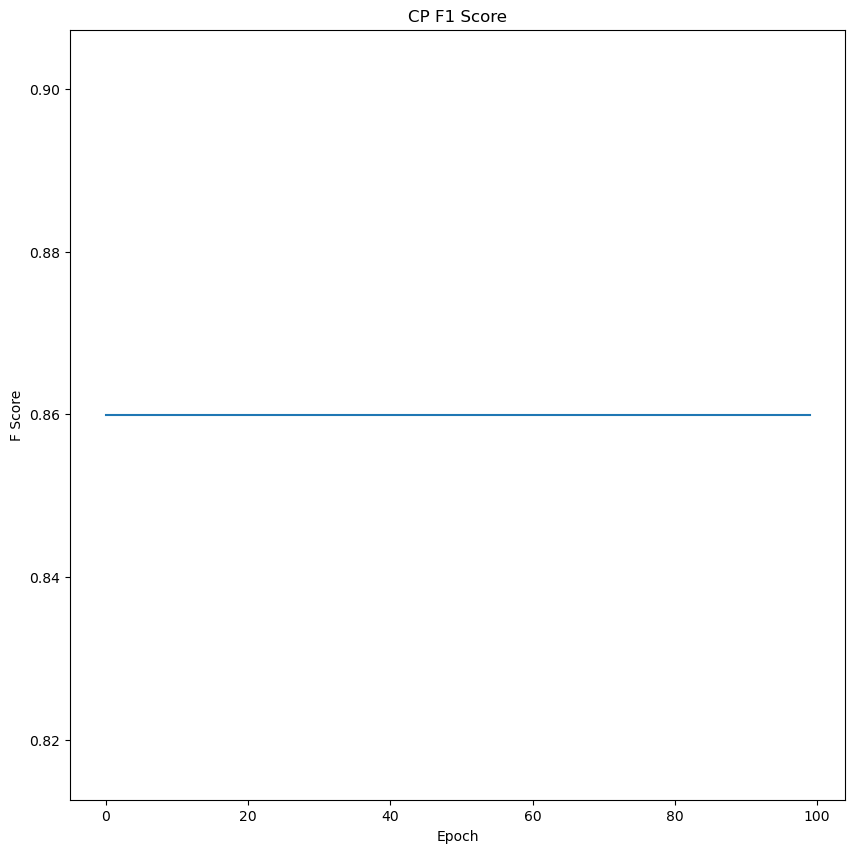

In [63]:
save_figs(cp_glvq_fscore, experiment, "CP", learning_rate)

##### DFH

##### 1-step lr = 0.1

In [64]:
learning_rate = 0.1
dfh_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.dual_factor_heuristic, sample_number= train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


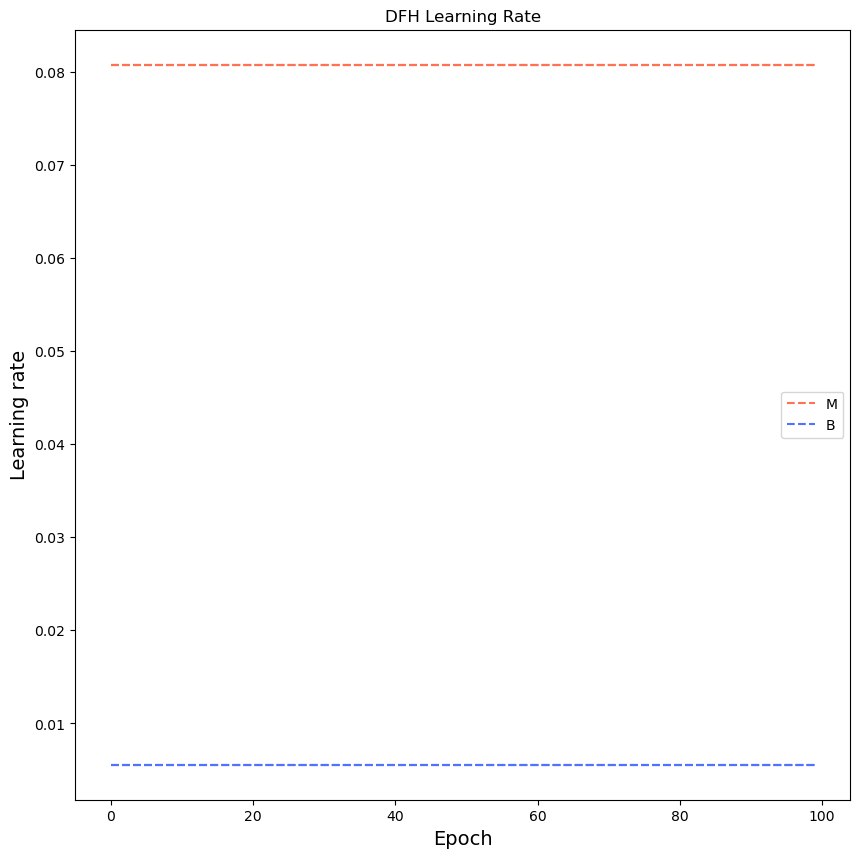

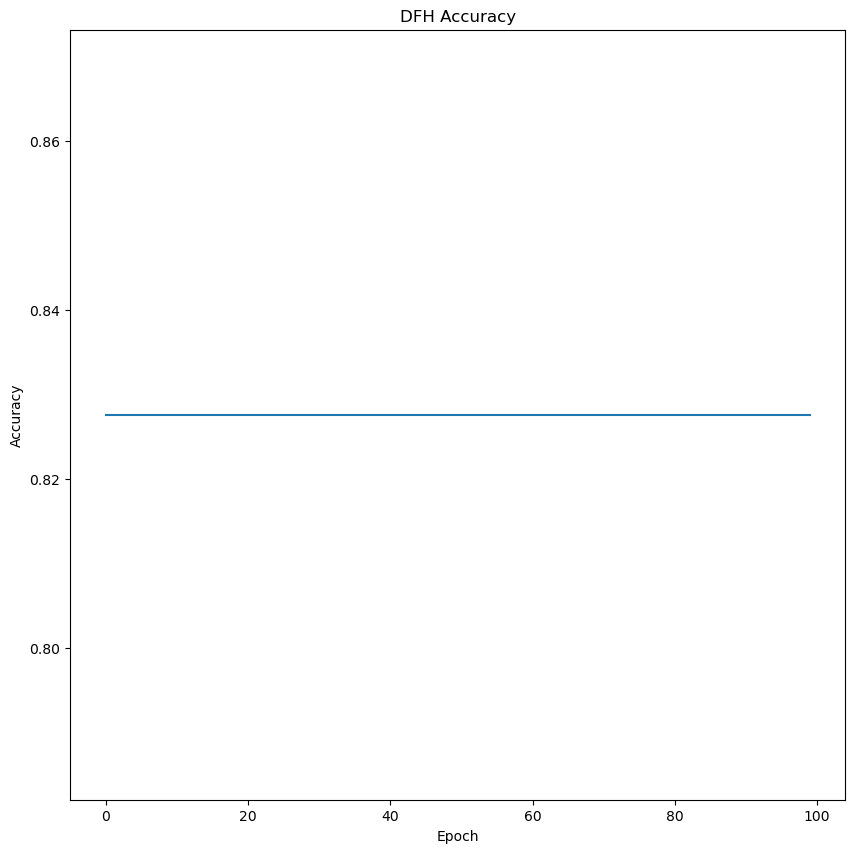

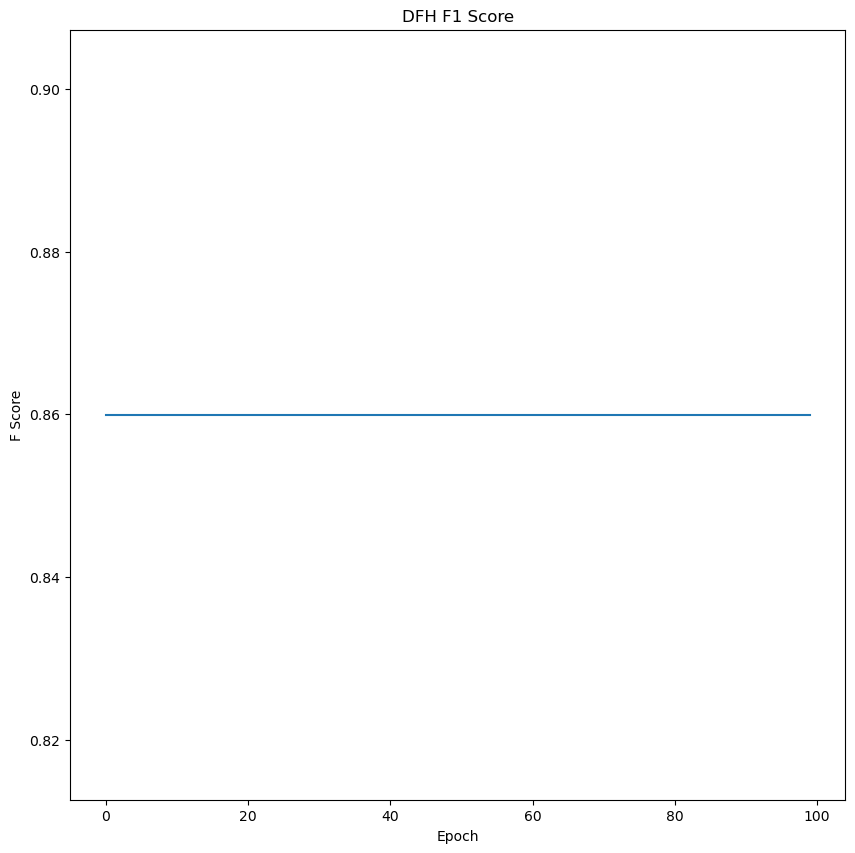

In [65]:
save_figs(dfh_glvq_fscore, experiment, "DFH", learning_rate)

##### 2-step lr = 0.03

In [66]:
learning_rate = 0.03
dfh_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.dual_factor_heuristic, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


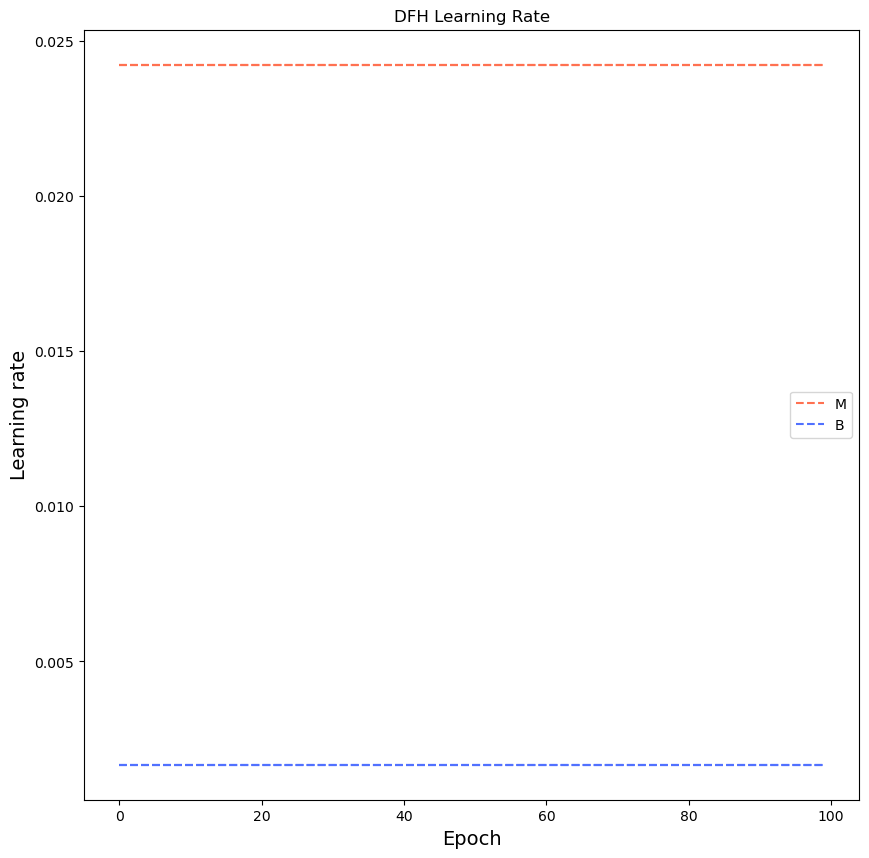

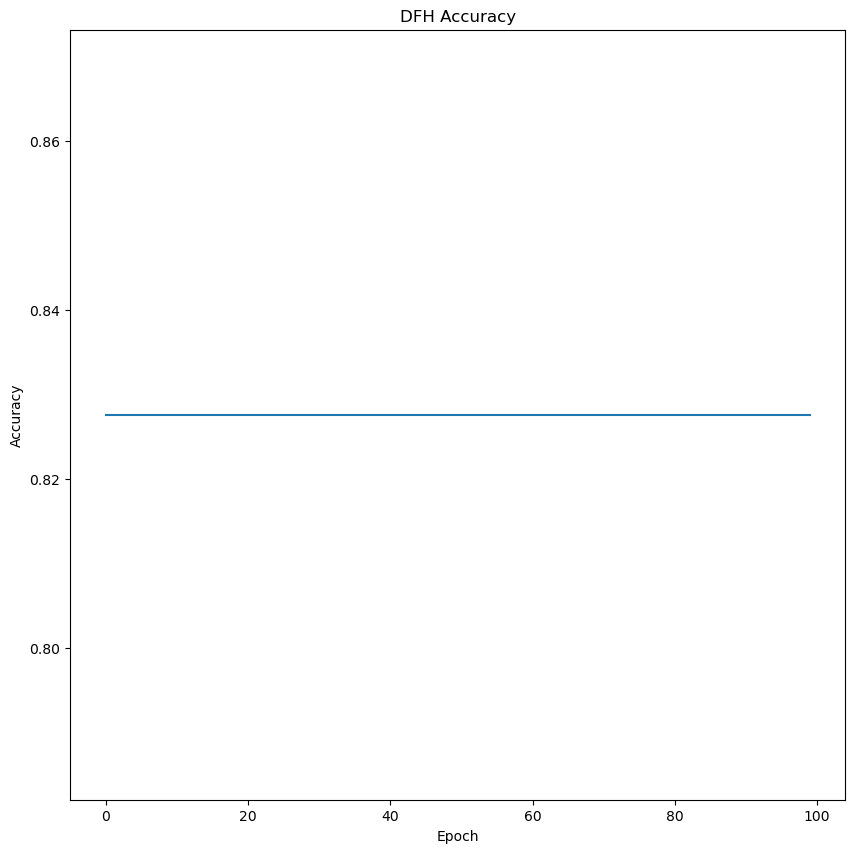

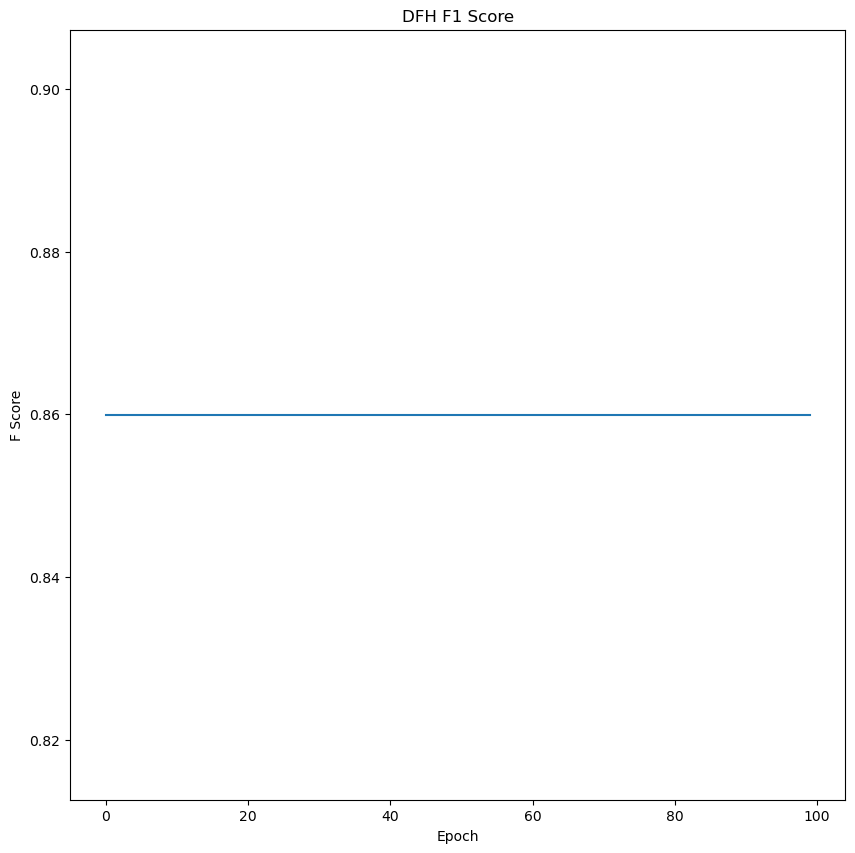

In [67]:
save_figs(dfh_glvq_fscore, experiment, "DFH", learning_rate)

##### 3-step lr = 0.01

In [68]:
learning_rate = 0.01
dfh_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.dual_factor_heuristic, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


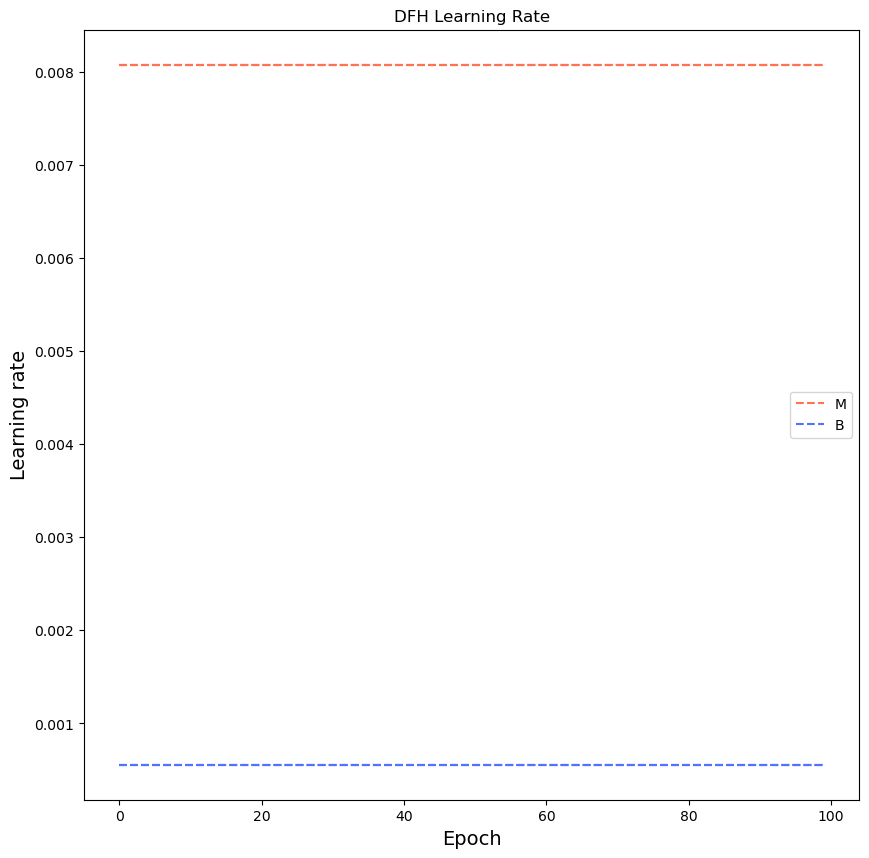

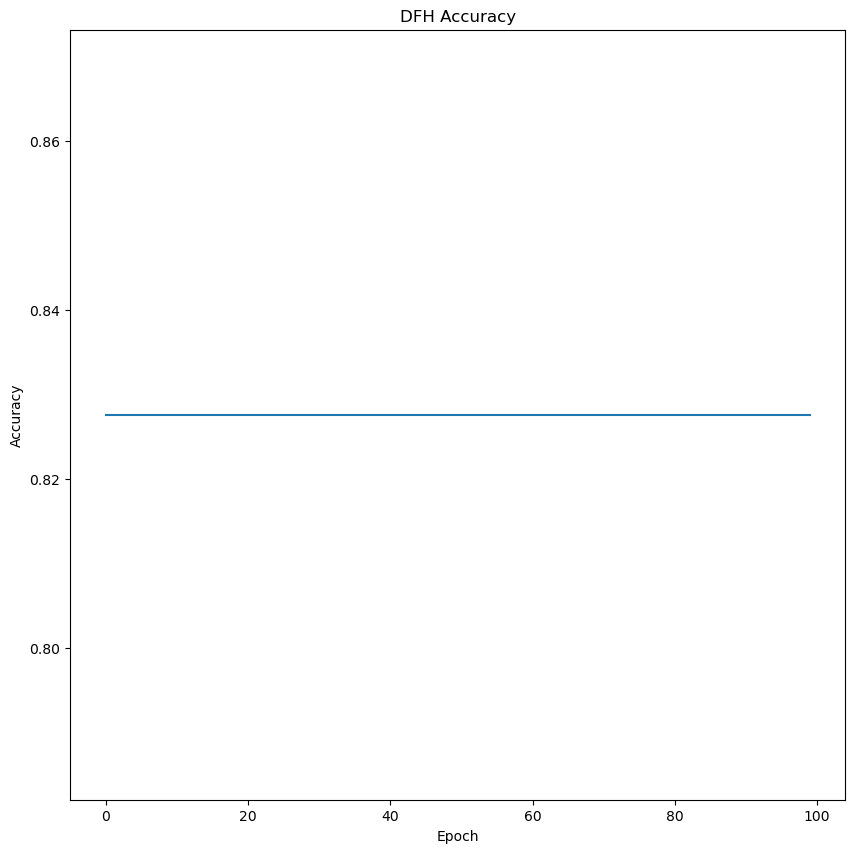

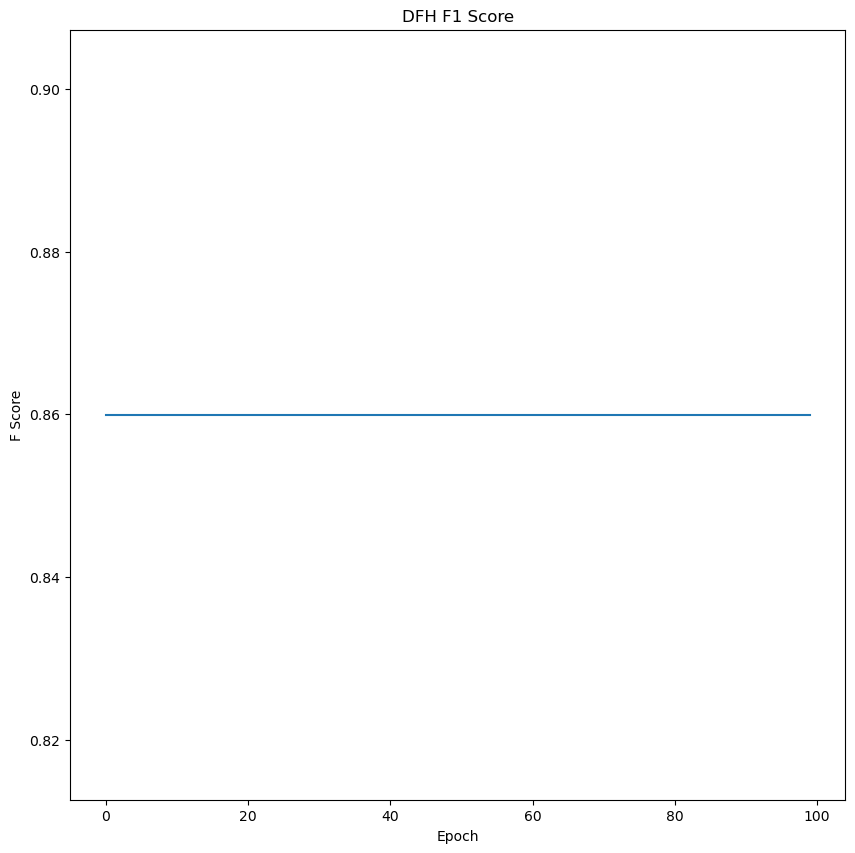

In [69]:
save_figs(dfh_glvq_fscore, experiment, "DFH", learning_rate)

##### MS

##### 1-step lr = 0.1

In [70]:
learning_rate = 0.1
ms_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.middle_symmetry, sample_number=train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %


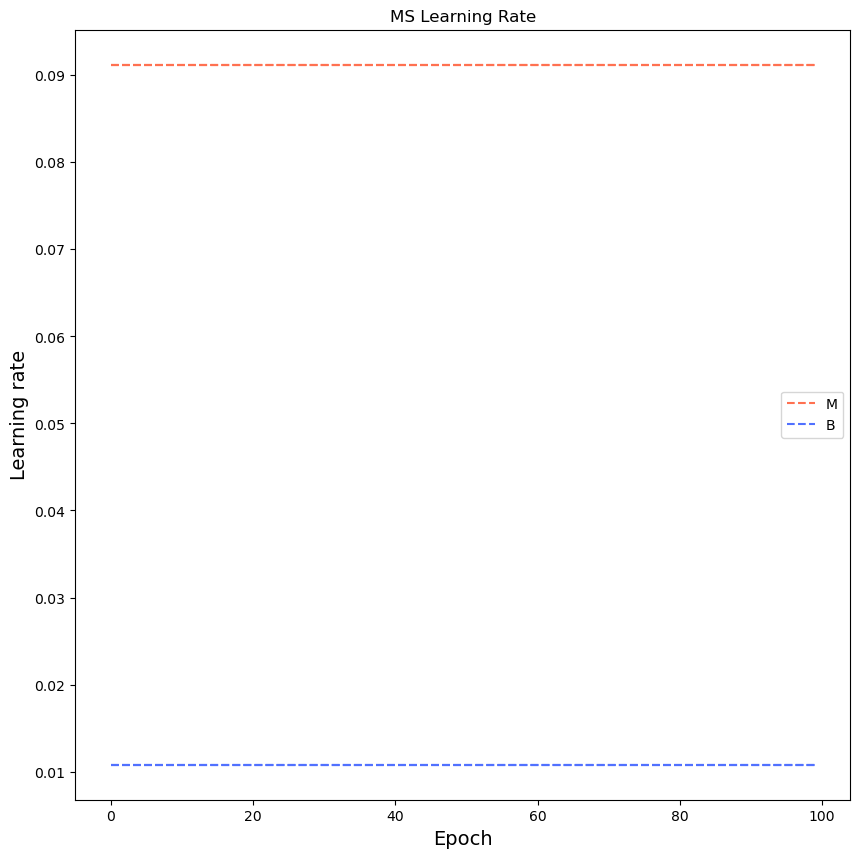

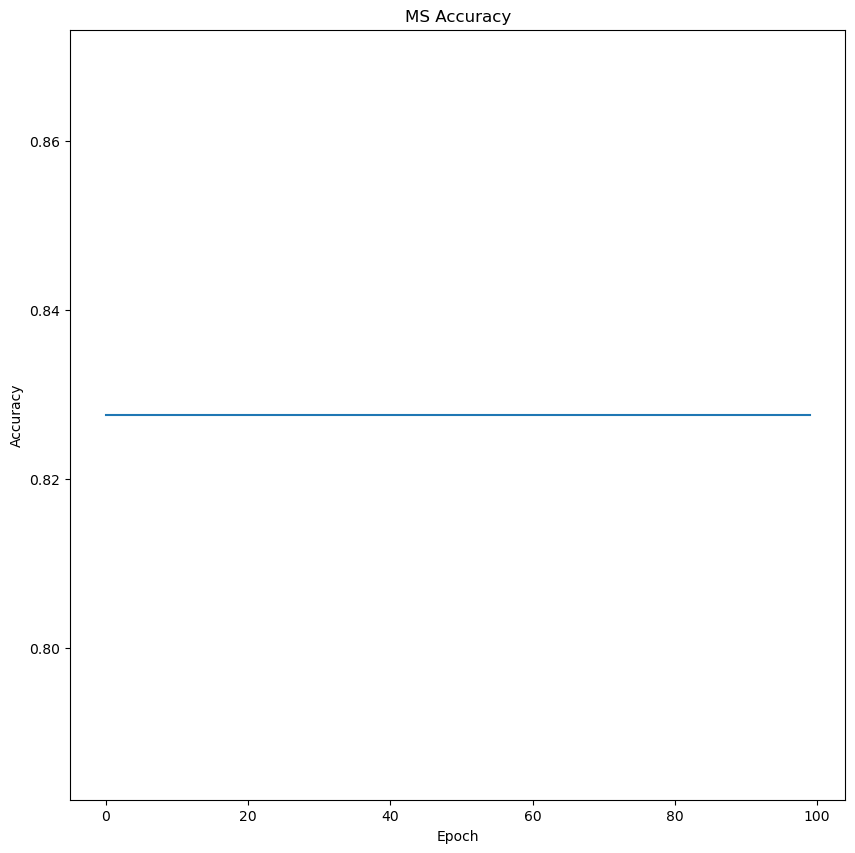

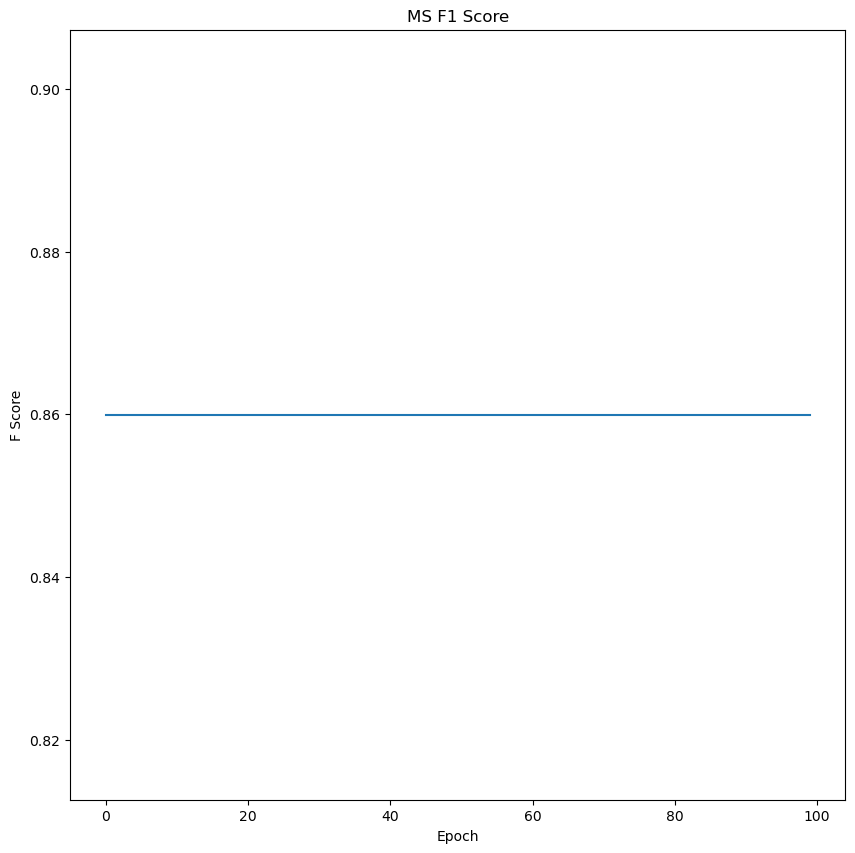

In [71]:
save_figs(ms_glvq_fscore, experiment, "MS", learning_rate)

##### 2-step lr = 0.03

In [72]:
learning_rate = 0.03
ms_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.middle_symmetry, sample_number=train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


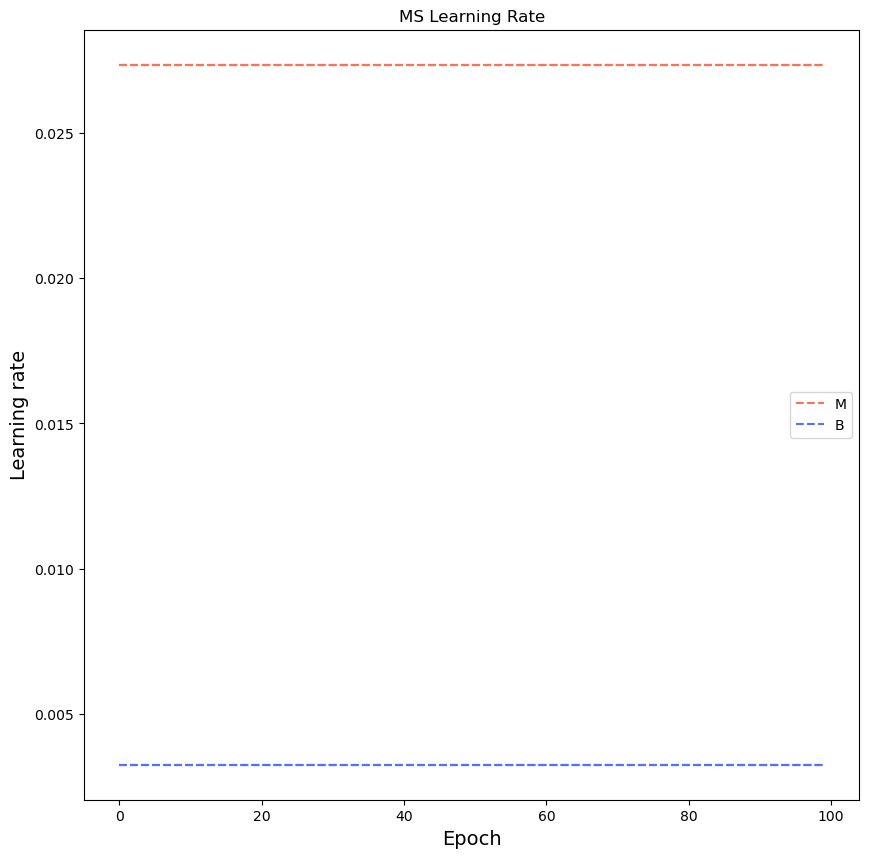

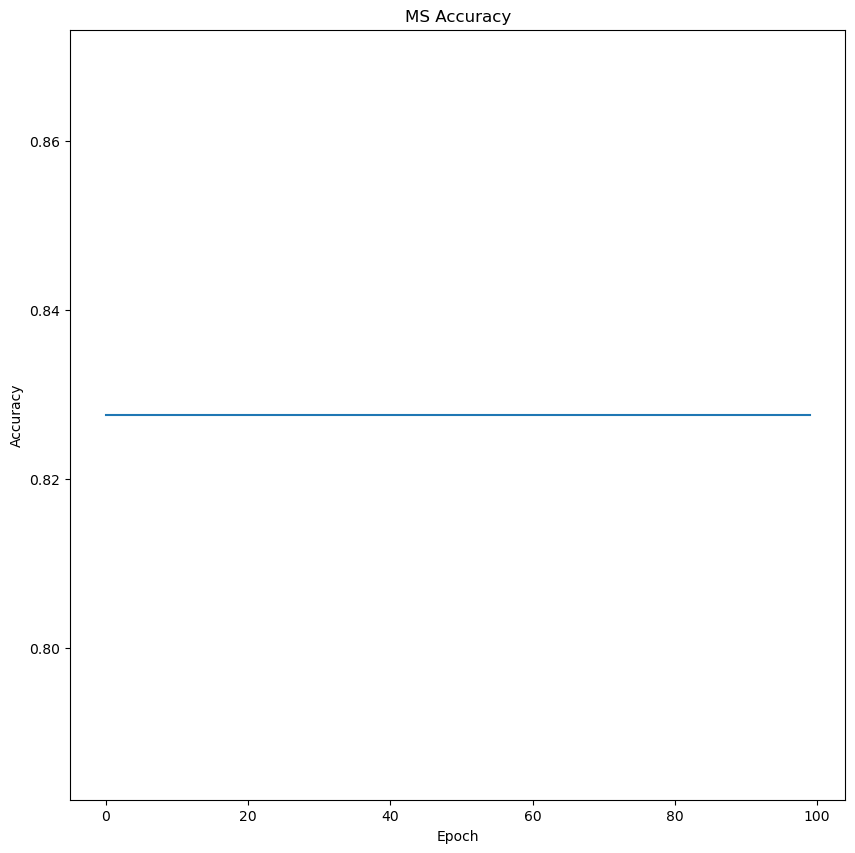

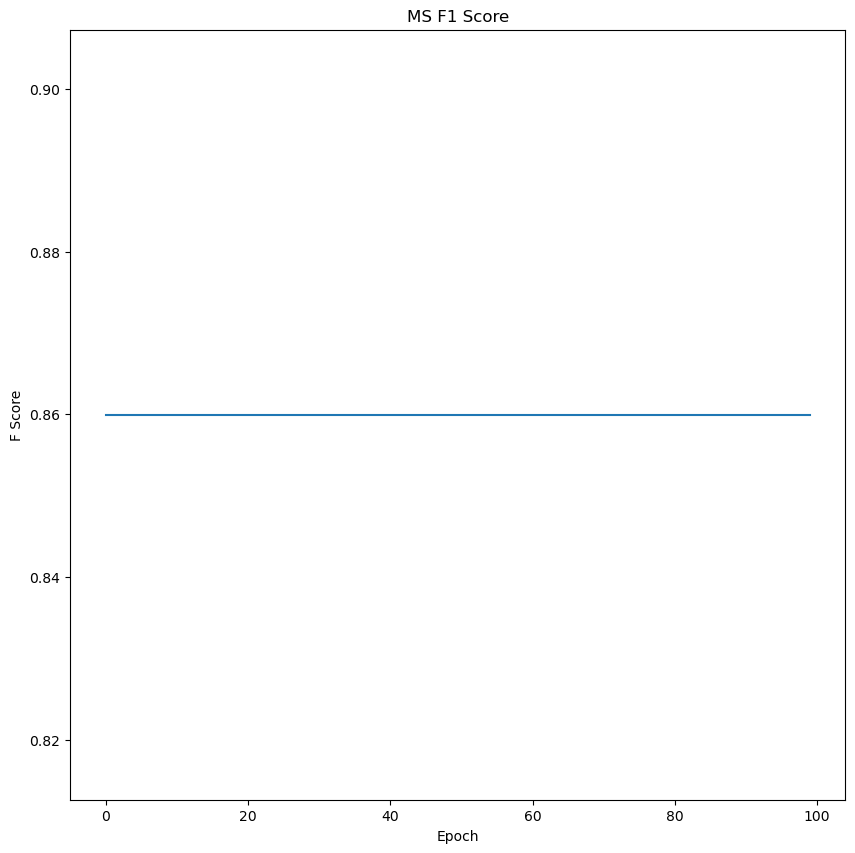

In [73]:
save_figs(ms_glvq_fscore, experiment, "MS", learning_rate)

##### 3-step lr = 0.01

In [74]:
learning_rate = 0.01
ms_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.middle_symmetry, sample_number=train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


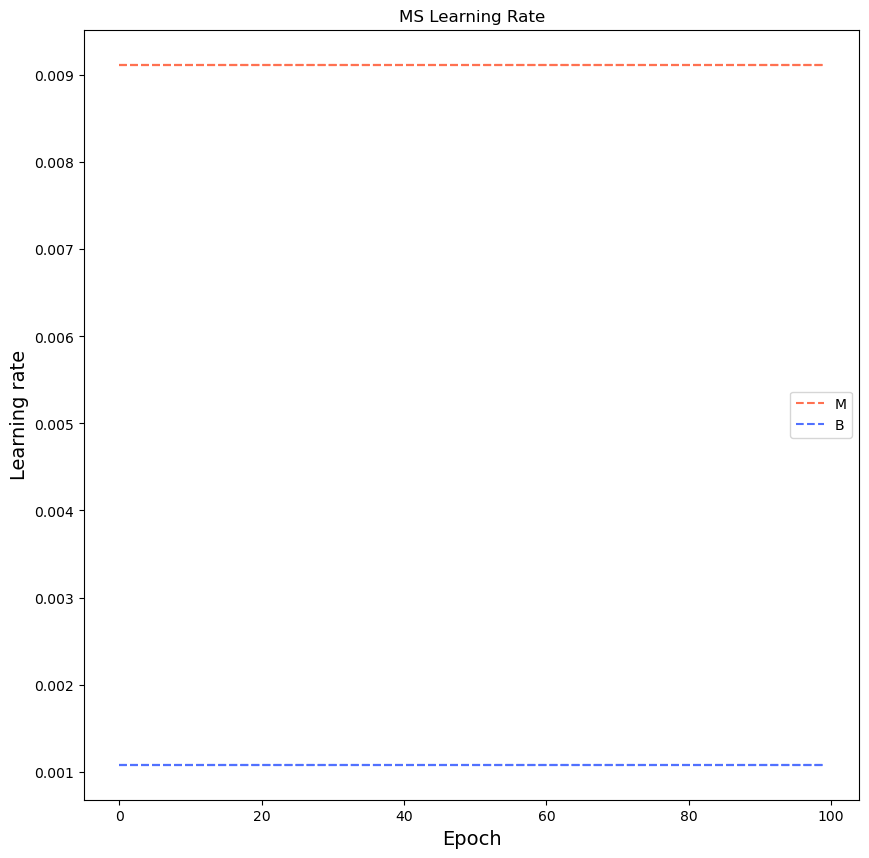

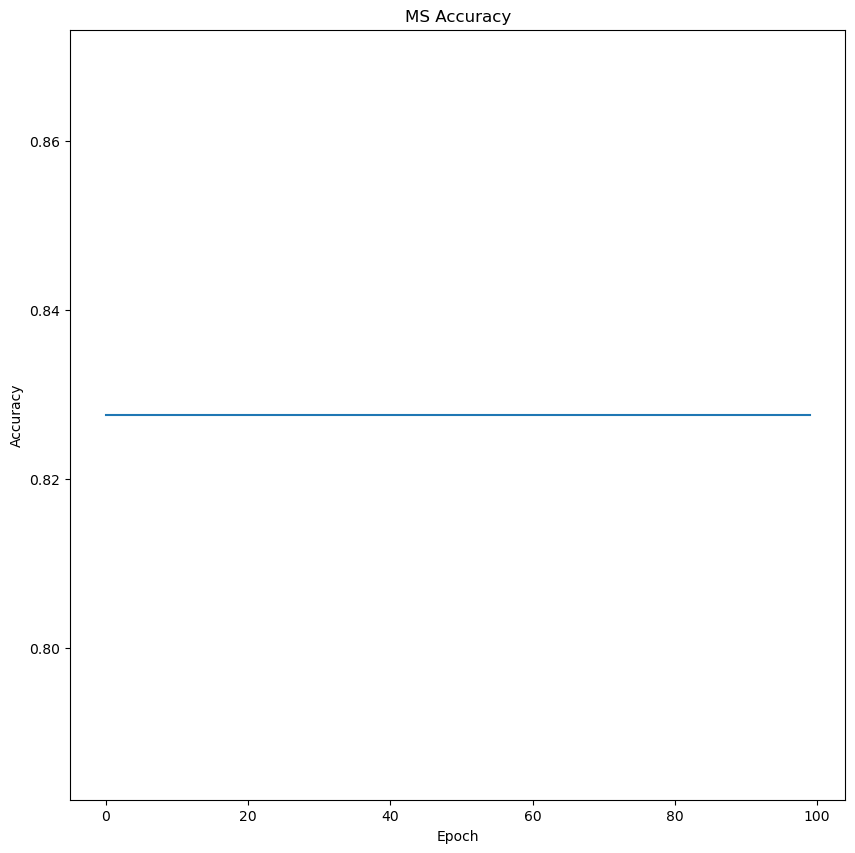

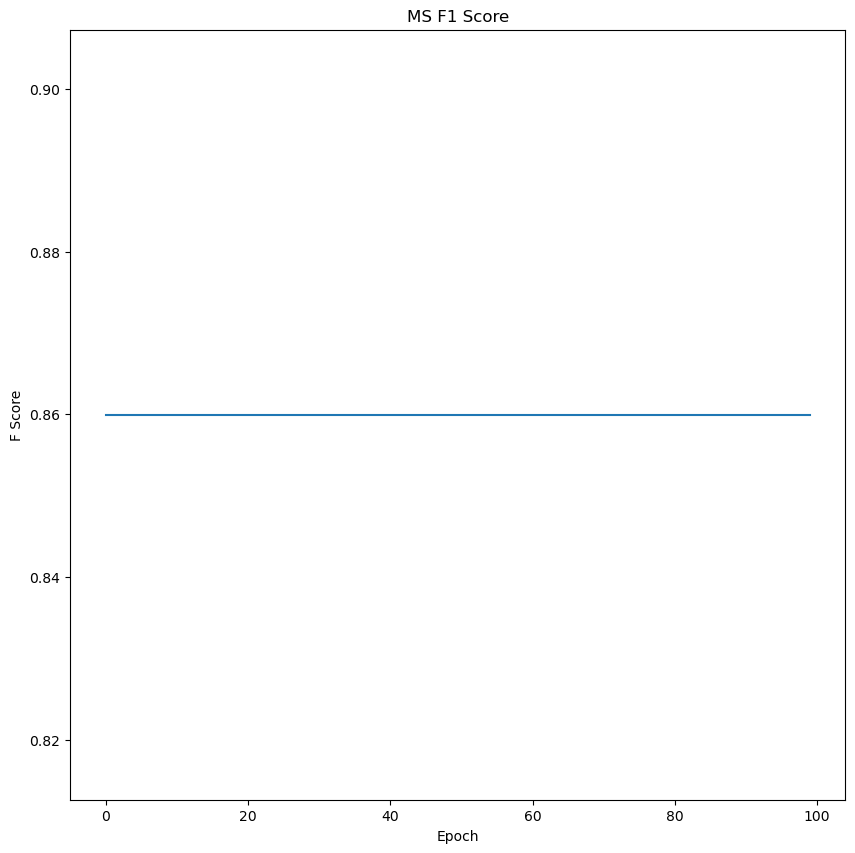

In [75]:
save_figs(ms_glvq_fscore, experiment, "MS", learning_rate)

##### LS

##### 1-step lr = 0.1

In [76]:
learning_rate = 0.1
ls_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry, sample_number= train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %


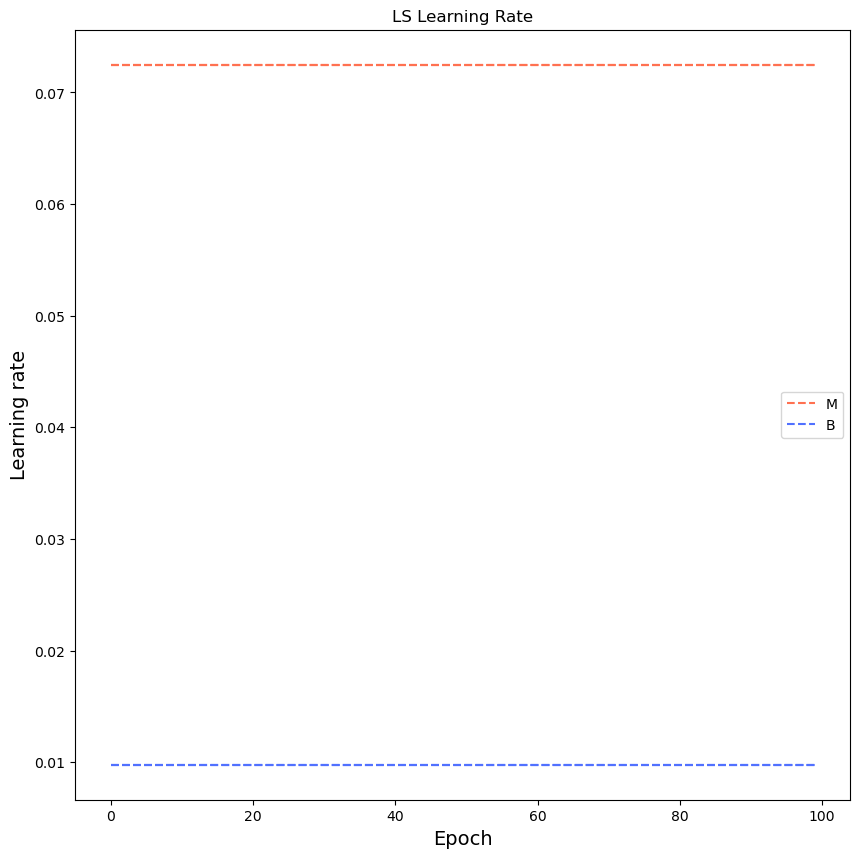

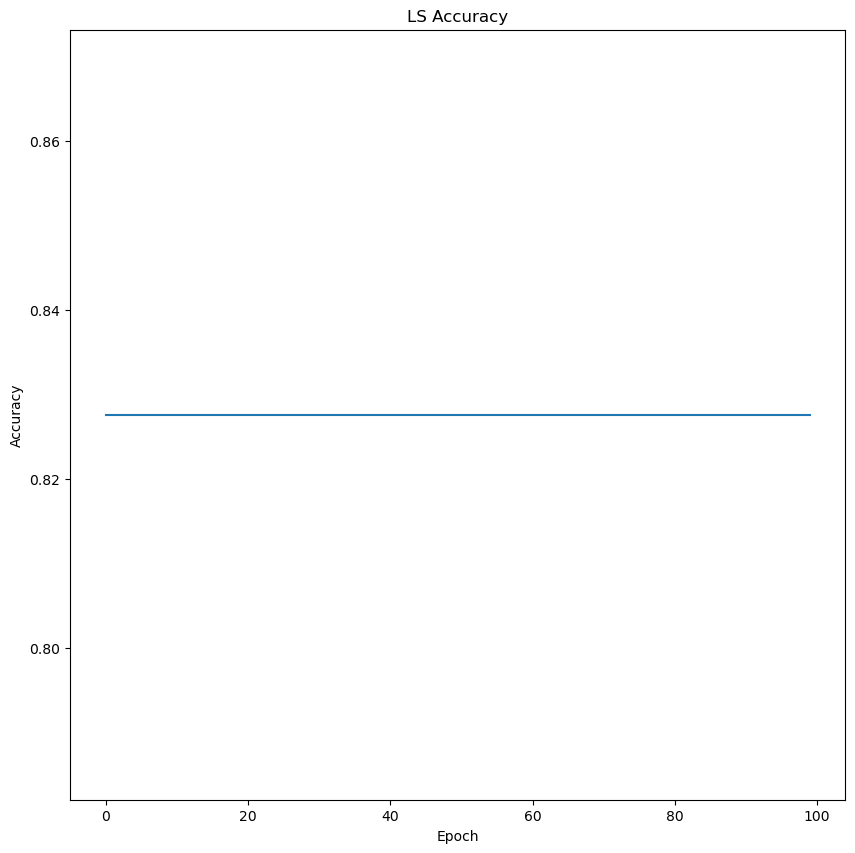

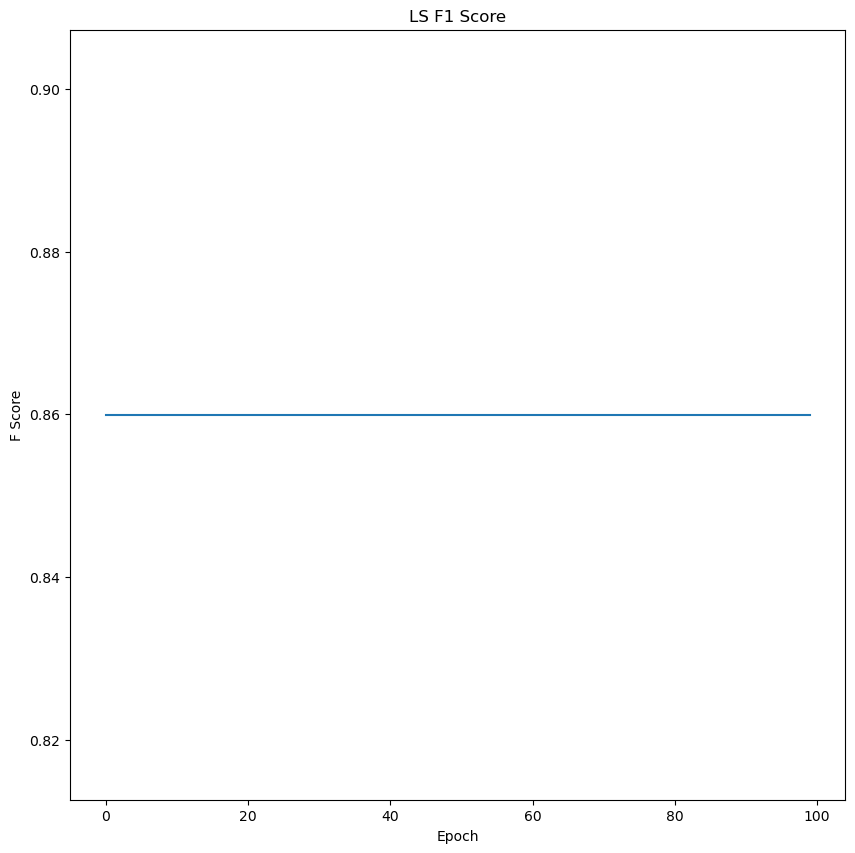

In [77]:
save_figs(ls_glvq_fscore, experiment, "LS", learning_rate)

##### 2-step lr = 0.03

In [78]:
learning_rate = 0.03
ls_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry, sample_number= train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


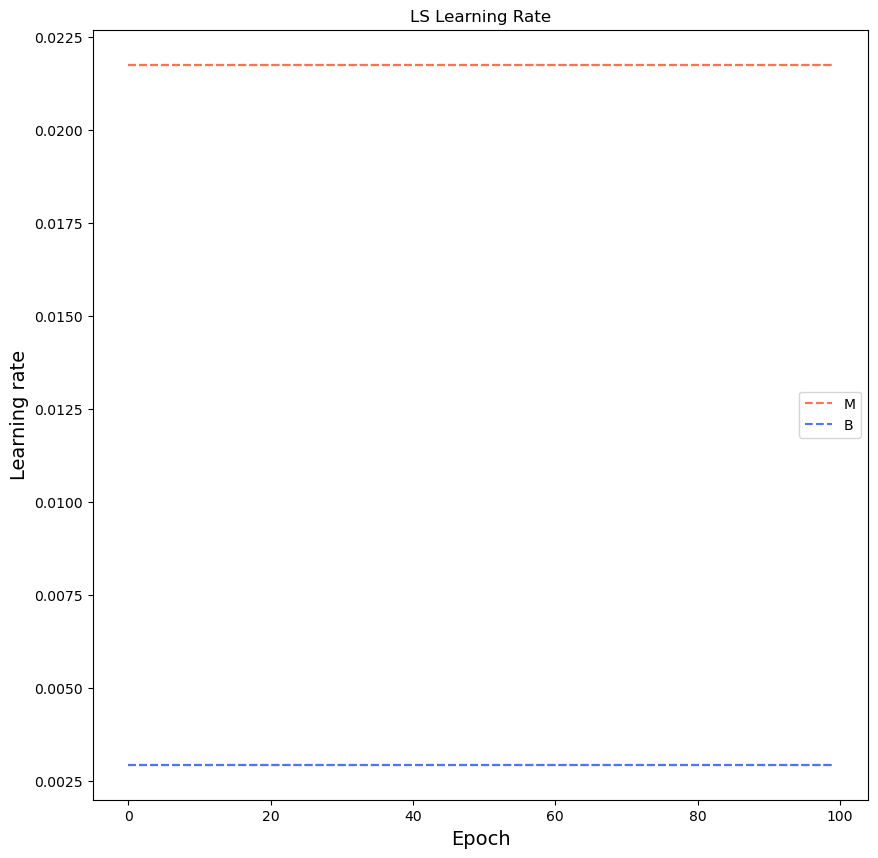

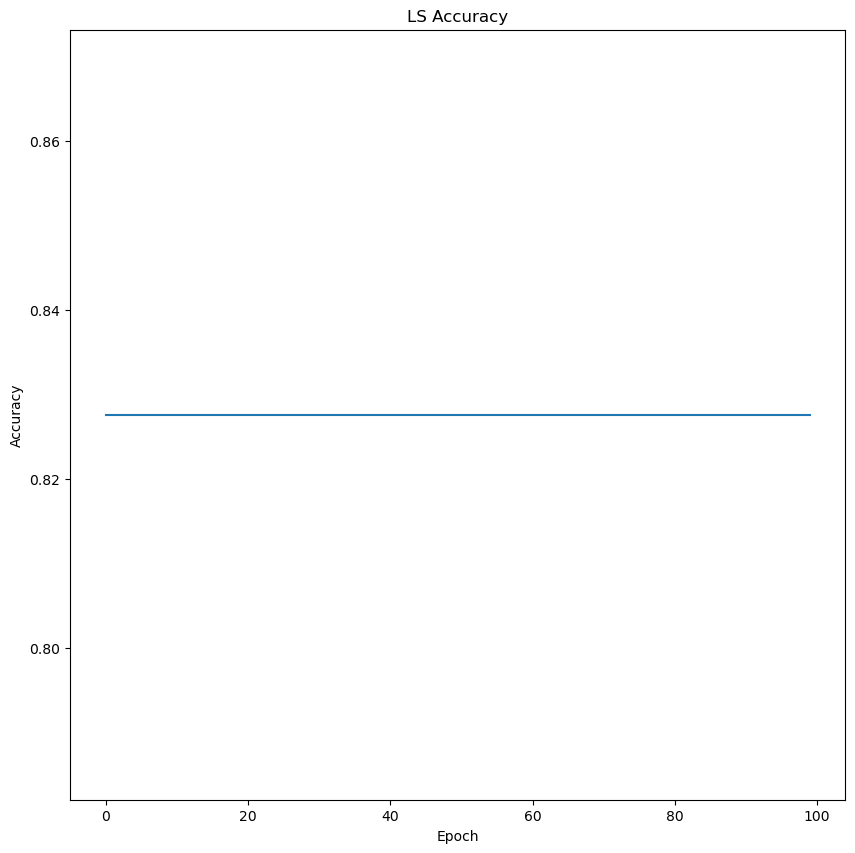

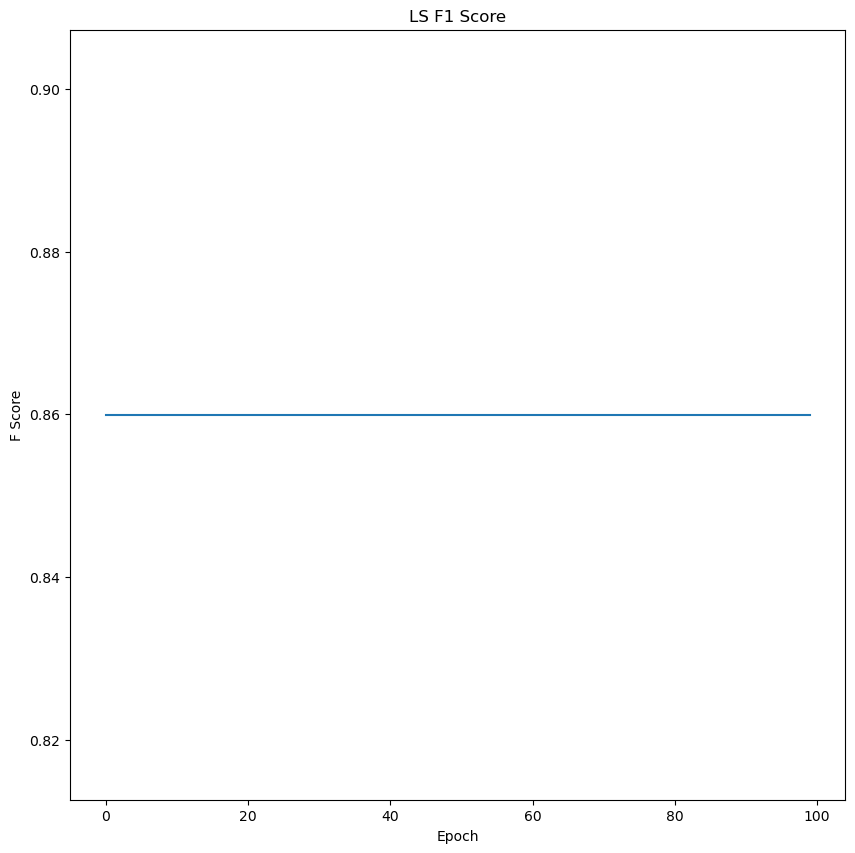

In [79]:
save_figs(ls_glvq_fscore, experiment, "LS", learning_rate)

##### 3-step lr = 0.01

In [80]:
learning_rate = 0.01
ls_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry,sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


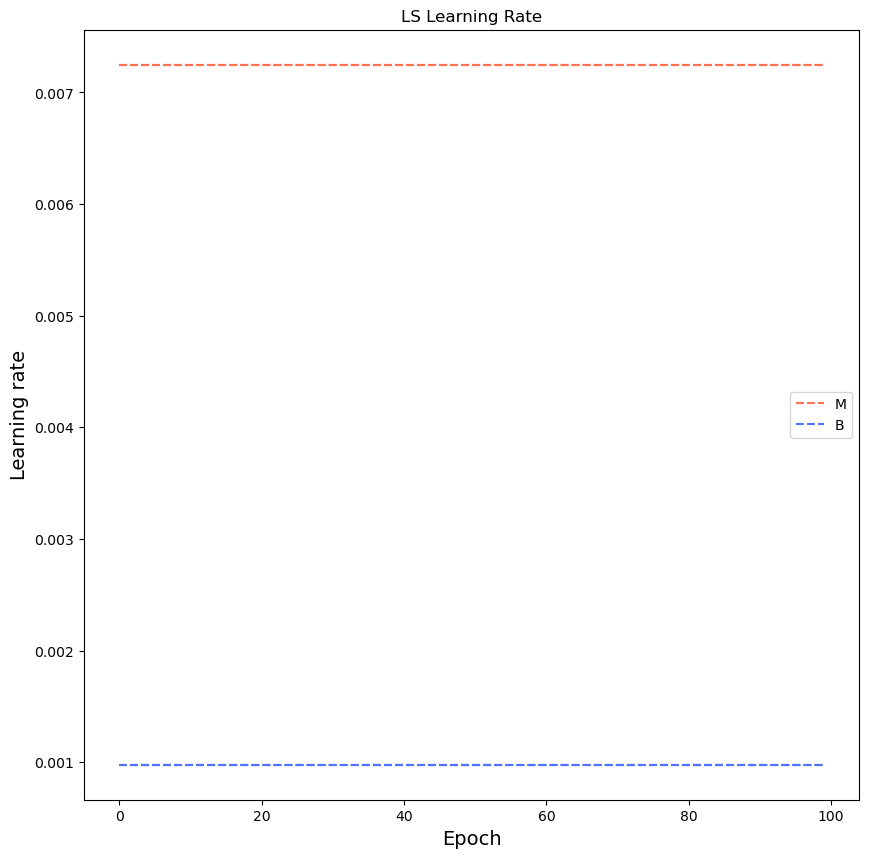

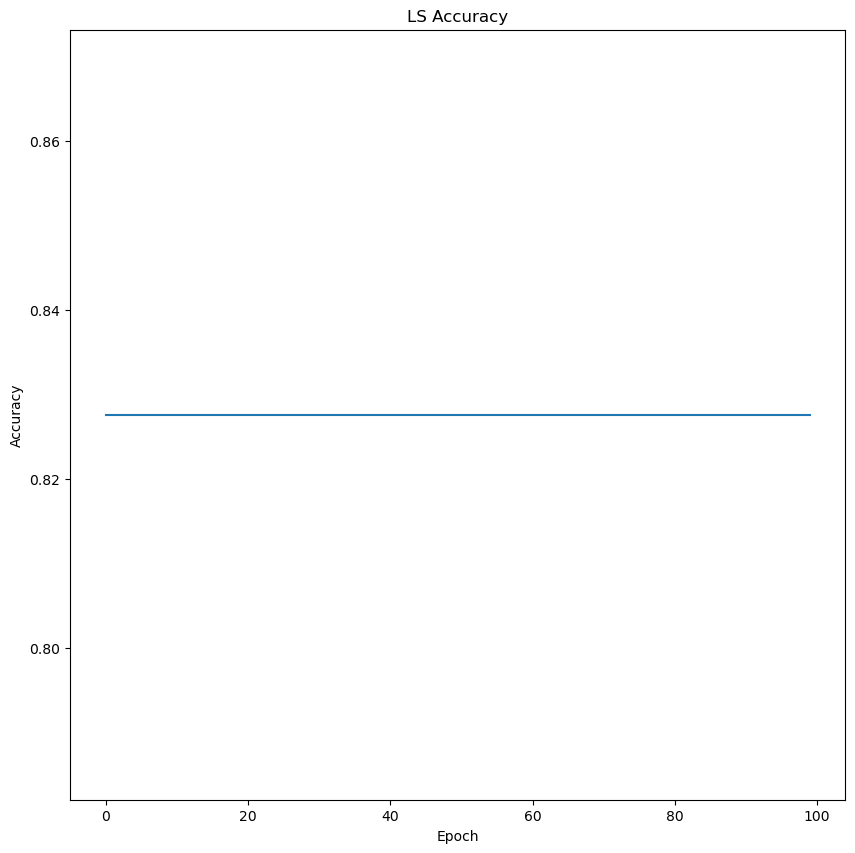

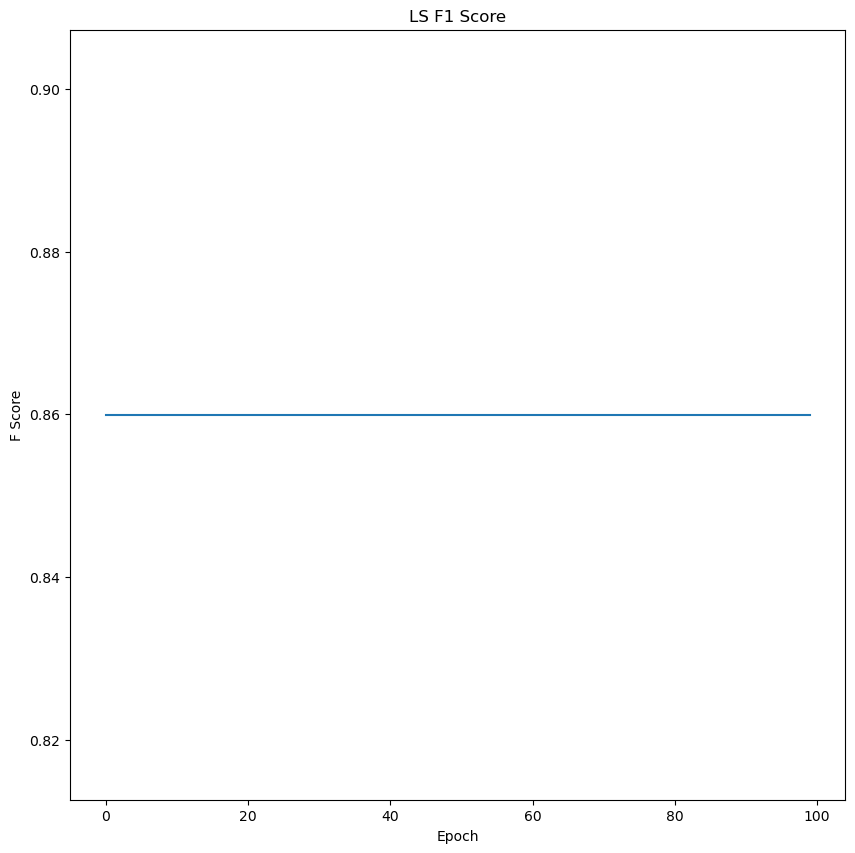

In [81]:
save_figs(ls_glvq_fscore, experiment, "LS", learning_rate)

##### LSR

##### 1-step lr = 0.1

In [82]:
learning_rate = 0.1
lsr_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry_rarity, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3832, Accuracy: 82.76 %, F_1_score: 86.00 %


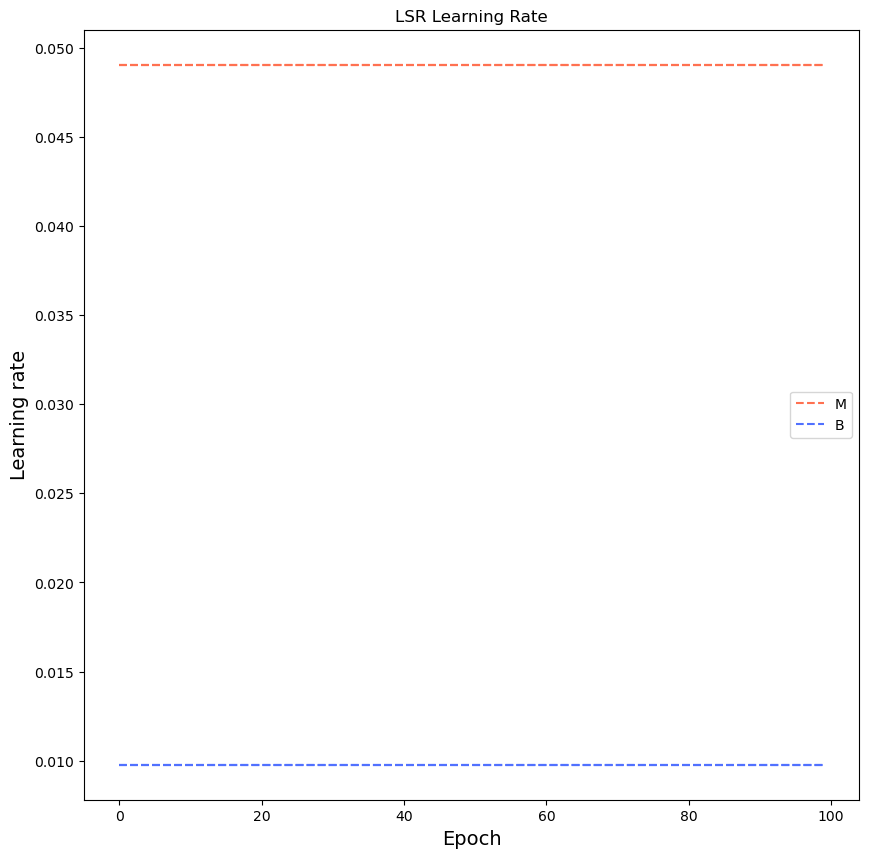

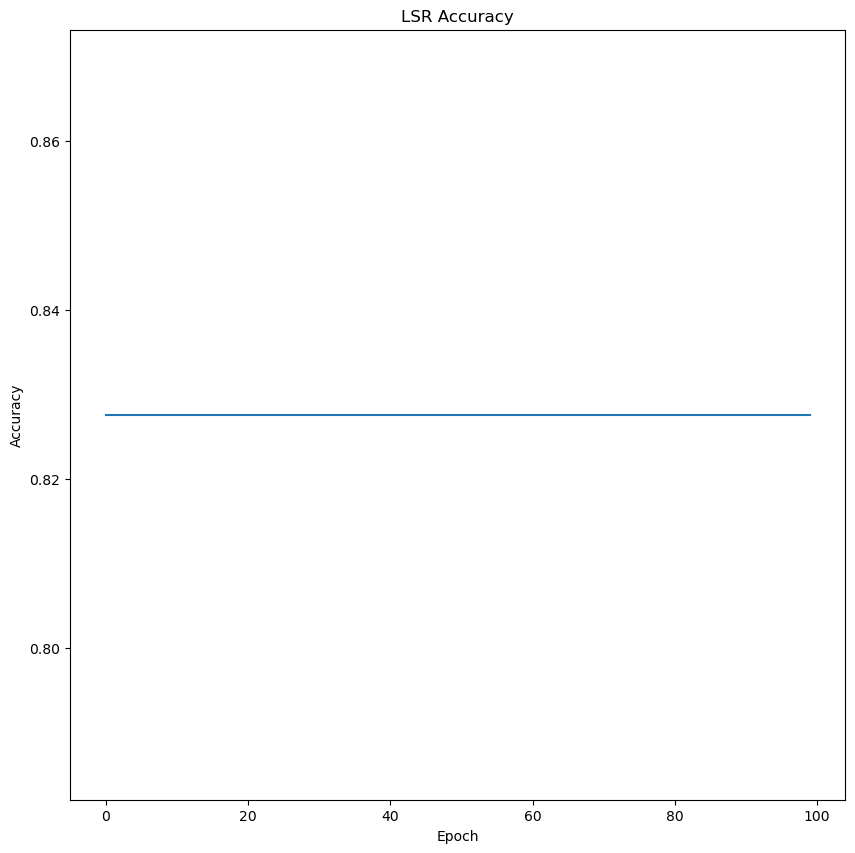

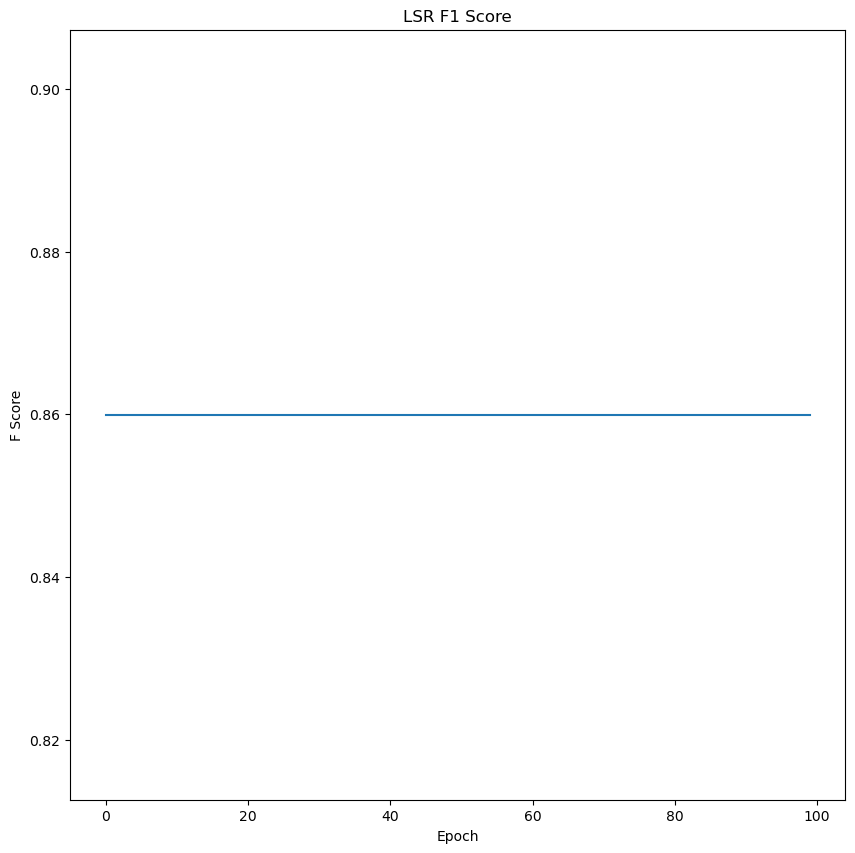

In [83]:
save_figs(lsr_glvq_fscore, experiment, "LSR", learning_rate)

##### 2-step lr = 0.03

In [84]:
learning_rate = 0.03
lsr_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry_rarity,sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


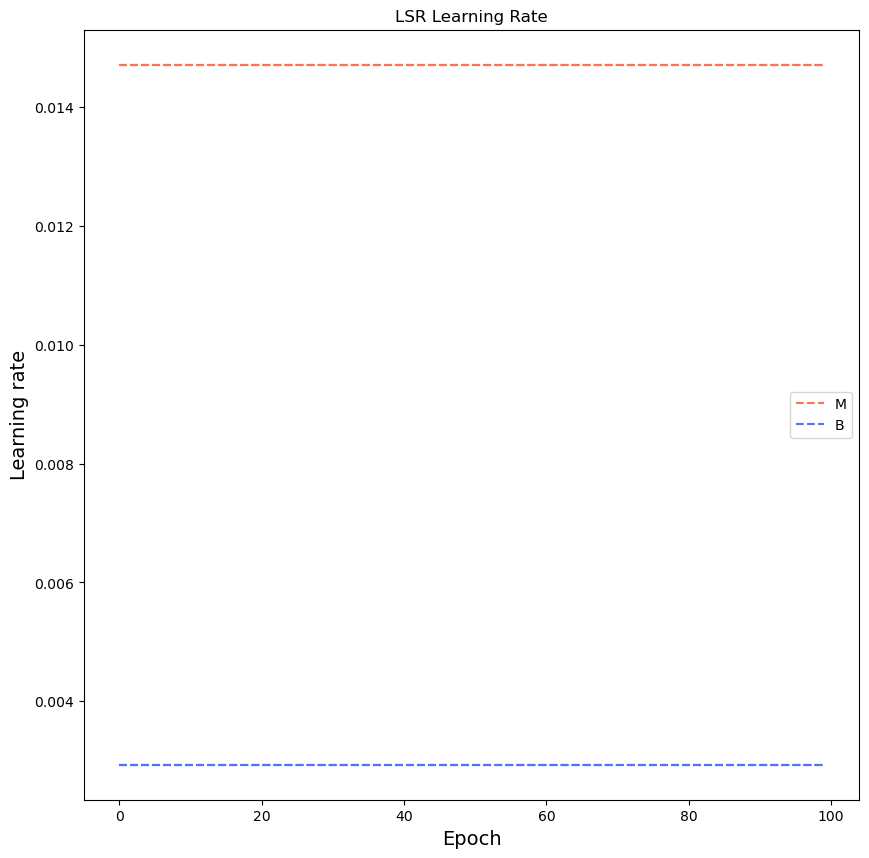

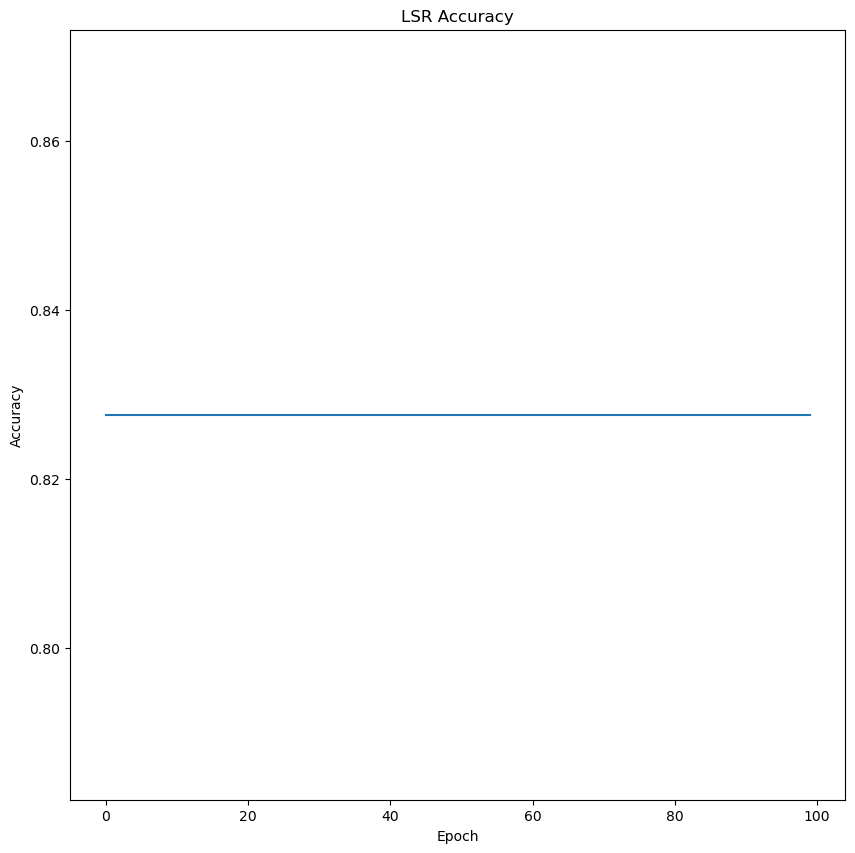

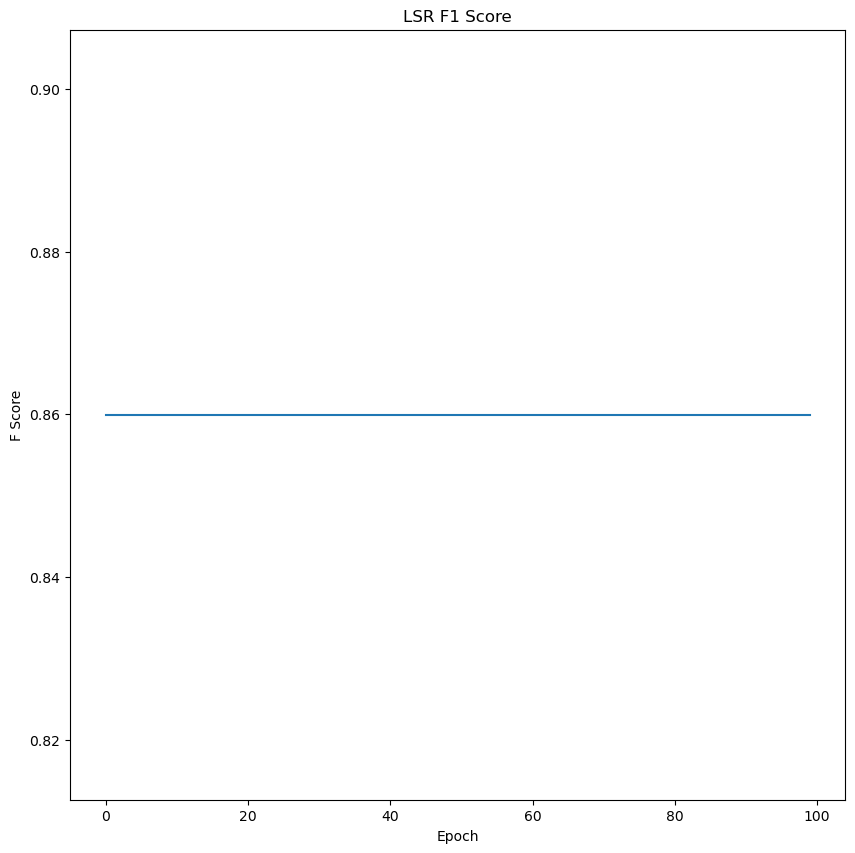

In [85]:
save_figs(lsr_glvq_fscore, experiment, "LSR", learning_rate)

##### 3-step lr = 0.01

In [86]:
learning_rate = 0.01
lsr_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry_rarity, sample_number = train_dist)

Epoch: 1, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 11, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 21, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 31, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 41, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 51, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 61, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 71, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 81, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %
Epoch: 91, Loss: 0.3833, Accuracy: 82.76 %, F_1_score: 86.00 %


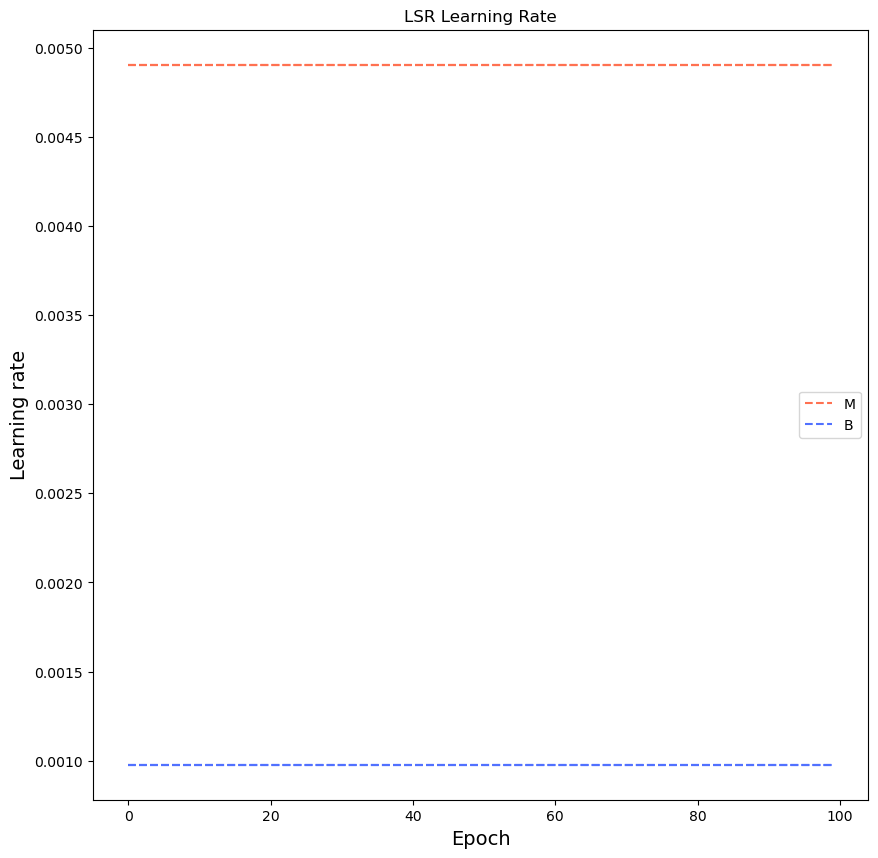

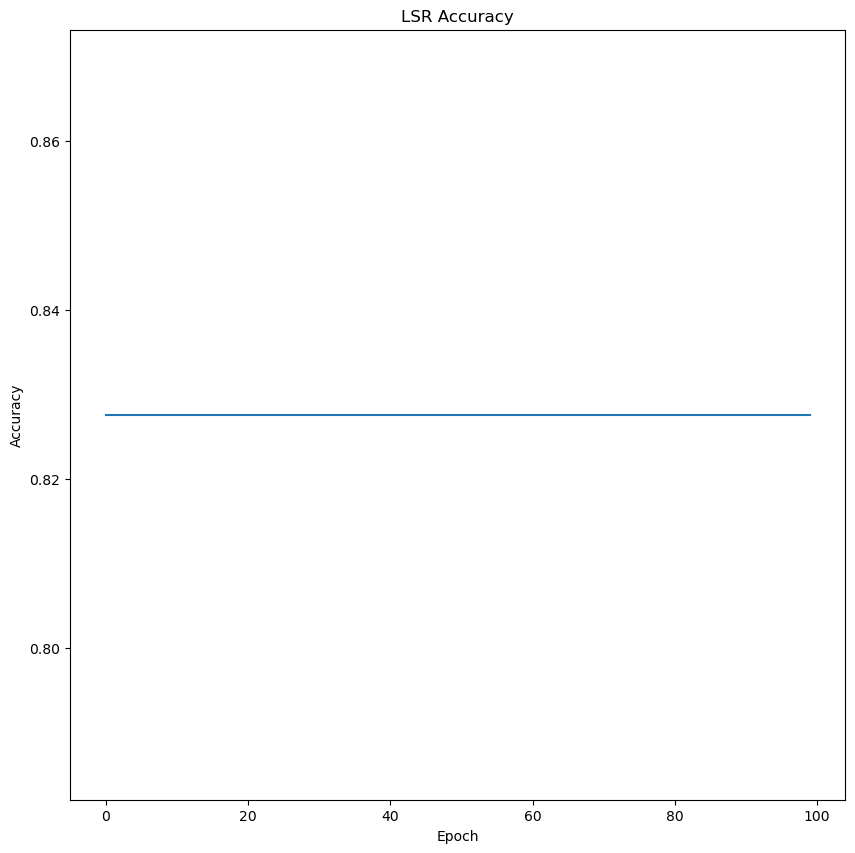

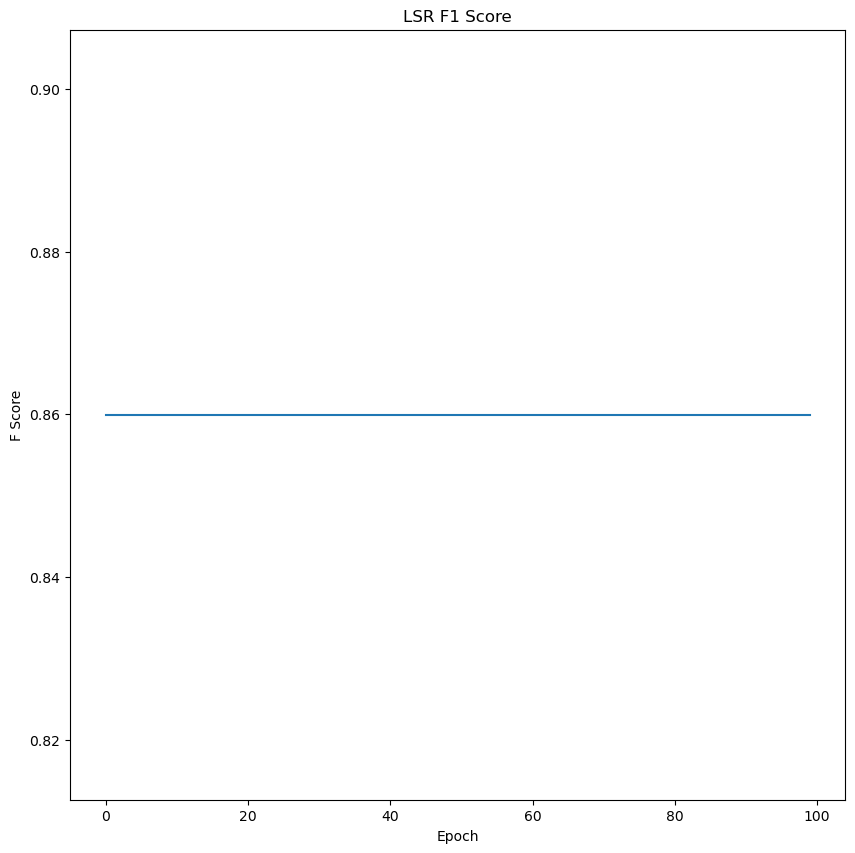

In [87]:
save_figs(lsr_glvq_fscore, experiment, "LSR", learning_rate)